In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import csv
from csv import writer

In [2]:
vidcoordinates = []
vidvalue = []
vidnames=[]
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(4):
    for j in namessubjects:
        for k in range(10):
            if k != 9 and (i != 1 and j != 'Andrei' or i != 2 and j != 'Natalie'):
                    vidvalue.append(i)
                    vidnames.append(f'Armpares {i} - {j} - {k+1}.mp4')
#vidnamess = ['Pares i arm right 3 - 1080 50fps - 1_Trim.mp4', 'Pares i arm right 3 - 1080 50fps - 2_Trim.mp4']
#vidnamess = ['nataliepeka1_1_20.mp4', 'nataliepeka1_4_20.mp4']


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

    
# For webcam input:
for i in vidnames:
    print(i)
    allpoints = []
    allpointsright =[]
    allpointsleft =[]
    cap = cv2.VideoCapture(i)
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
      while cap.isOpened():
        success, image = cap.read()
        if not success:
          print("Ignoring empty camera frame.")
          # If loading a video, use 'break' instead of 'continue'.
          break

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Flip the image horizontally for a selfie-view display.
        image_hight, image_width, _ = image.shape
        x_coordinate_left = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].x * image_width
        y_coordinate_left = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].y * image_hight
        x_coordinate_right = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].x * image_width
        y_coordinate_right = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].y * image_hight
        #cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
          break
        
        #Ny bös
        if y_coordinate_right is not None:
            allpointsright.append(y_coordinate_right/1080)
        if y_coordinate_left is not None:
            allpointsleft.append(y_coordinate_left/1080)
    if min(allpointsright) < min(allpointsleft):
        #vidcoordinates.append(allpointsright)
        print(allpointsright)
        with open('vidcoordinates_pares_arm_mediapipe.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(allpointsright)
            f_object.close()
        print('right')
        #print(allpointsright)
    elif min(allpointsright) > min(allpointsleft):
        #vidcoordinates.append(allpointsleft)
        print(allpointsleft)
        with open('vidcoordinates_pares_arm_mediapipe.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(allpointsleft)
            f_object.close()
        print('left')
        #print(allpointsleft)
    cap.release()

Armpares 0 - Marcus - 1.mp4
Ignoring empty camera frame.
[0.569263219833374, 0.5696207880973816, 0.5693922638893127, 0.5693888664245605, 0.5685850381851196, 0.5683746337890625, 0.5683343410491943, 0.5683238506317139, 0.5683234930038452, 0.5683337450027466, 0.5683531761169434, 0.5684584975242615, 0.5681633353233337, 0.5681570172309875, 0.5681120157241821, 0.5683577060699463, 0.5684900283813477, 0.5685495138168335, 0.5685553550720215, 0.5683326721191406, 0.5677934885025024, 0.5676525831222534, 0.5676788687705994, 0.5678508281707764, 0.5679779648780823, 0.5678819417953491, 0.5676286816596985, 0.5676217675209045, 0.56754070520401, 0.5673190951347351, 0.5672681927680969, 0.5671206116676331, 0.5670632719993591, 0.567041277885437, 0.5669800639152527, 0.5669575929641724, 0.5669968128204346, 0.5668589472770691, 0.5667842030525208, 0.5668423771858215, 0.566881000995636, 0.5665391087532043, 0.5662059187889099, 0.5654676556587219, 0.5650039911270142, 0.5623703598976135, 0.5564711689949036, 0.55341

Ignoring empty camera frame.
[0.5621156692504883, 0.5643273591995239, 0.5650362372398376, 0.5655766725540161, 0.5662624835968018, 0.5653966665267944, 0.5643316507339478, 0.5617306232452393, 0.5605431199073792, 0.5574653744697571, 0.556184709072113, 0.5562272667884827, 0.5563552975654602, 0.5568320751190186, 0.5568988919258118, 0.556916356086731, 0.5558507442474365, 0.5556821227073669, 0.5554062128067017, 0.5553046464920044, 0.5531448125839233, 0.5497725605964661, 0.5464876890182495, 0.5465509295463562, 0.5443709492683411, 0.5427727699279785, 0.5393531322479248, 0.5340019464492798, 0.5311687588691711, 0.5254348516464233, 0.5190805792808533, 0.5088833570480347, 0.5010433793067932, 0.49542683362960815, 0.4873637557029724, 0.48107683658599854, 0.47513964772224426, 0.46942317485809326, 0.45933961868286133, 0.45173370838165283, 0.4424075186252594, 0.4337068200111389, 0.4257943332195282, 0.4150119125843048, 0.4065685272216797, 0.3947158753871918, 0.3854384124279022, 0.37303298711776733, 0.360

Ignoring empty camera frame.
[0.546590268611908, 0.5466116070747375, 0.5466628670692444, 0.5467320680618286, 0.5468522310256958, 0.5468910336494446, 0.5470902323722839, 0.5482872724533081, 0.5486121773719788, 0.5486288666725159, 0.5485839247703552, 0.5485900640487671, 0.549027681350708, 0.5500978231430054, 0.5507321357727051, 0.5511237978935242, 0.551741361618042, 0.5517376065254211, 0.5517988204956055, 0.5518087148666382, 0.5519432425498962, 0.5519548654556274, 0.5515168905258179, 0.551632285118103, 0.5517758131027222, 0.5523978471755981, 0.5526576042175293, 0.5534843802452087, 0.5543046593666077, 0.5549507737159729, 0.5550119280815125, 0.5550293922424316, 0.5550633072853088, 0.5550594329833984, 0.5536329746246338, 0.550406277179718, 0.5418682098388672, 0.5337808728218079, 0.527026891708374, 0.519750714302063, 0.5115538835525513, 0.50780189037323, 0.49938511848449707, 0.49080538749694824, 0.48357635736465454, 0.473666250705719, 0.4645915925502777, 0.45543569326400757, 0.44655254483222

Ignoring empty camera frame.
[0.5517364144325256, 0.5602051615715027, 0.5637584328651428, 0.563935399055481, 0.563884437084198, 0.5642566084861755, 0.5645169019699097, 0.5643033385276794, 0.5645017623901367, 0.5643833875656128, 0.5642991065979004, 0.5642997622489929, 0.5643049478530884, 0.56428062915802, 0.5641654133796692, 0.5641518831253052, 0.5641180276870728, 0.5640926957130432, 0.564031183719635, 0.563946008682251, 0.5639235973358154, 0.5639038681983948, 0.563924252986908, 0.5638880133628845, 0.5638933777809143, 0.5639156699180603, 0.5639389157295227, 0.5640115141868591, 0.5640221238136292, 0.5639801621437073, 0.5640460252761841, 0.5641317963600159, 0.5641327500343323, 0.5642520785331726, 0.5641555786132812, 0.563166618347168, 0.5618219375610352, 0.5609962940216064, 0.558564305305481, 0.5555387735366821, 0.5541921257972717, 0.5490186810493469, 0.5464234352111816, 0.5427175760269165, 0.5414869785308838, 0.5406537652015686, 0.5400829315185547, 0.537960410118103, 0.5377578139305115, 

Ignoring empty camera frame.
[0.5626769661903381, 0.5615178346633911, 0.561454176902771, 0.560905933380127, 0.5608252286911011, 0.5604552030563354, 0.559099555015564, 0.5588623285293579, 0.5588982701301575, 0.5594614744186401, 0.5600121021270752, 0.5603907704353333, 0.5606449842453003, 0.5606488585472107, 0.5606836676597595, 0.5607103109359741, 0.5610606670379639, 0.562853217124939, 0.5628467798233032, 0.5634719133377075, 0.563447892665863, 0.5638928413391113, 0.5637595653533936, 0.5636039972305298, 0.5650694370269775, 0.5651283860206604, 0.5638964176177979, 0.5633479952812195, 0.5620141625404358, 0.5596662163734436, 0.5584137439727783, 0.5574671626091003, 0.555487871170044, 0.555594801902771, 0.5560294389724731, 0.5562846660614014, 0.5561923384666443, 0.5563719868659973, 0.5563177466392517, 0.553363561630249, 0.5517041087150574, 0.5502119660377502, 0.5485263466835022, 0.5456122756004333, 0.5429772734642029, 0.5378770232200623, 0.534251868724823, 0.5318418741226196, 0.5307304859161377,

Ignoring empty camera frame.
[0.5740978121757507, 0.5796840786933899, 0.5794970393180847, 0.5784579515457153, 0.578860878944397, 0.5794929265975952, 0.5824244022369385, 0.5852480530738831, 0.5876152515411377, 0.5886497497558594, 0.5880112648010254, 0.585627019405365, 0.5832682847976685, 0.5825997591018677, 0.5822704434394836, 0.5819107890129089, 0.5813626646995544, 0.5791602730751038, 0.5760310292243958, 0.5704900622367859, 0.5653486847877502, 0.5626235604286194, 0.5609560012817383, 0.5575662851333618, 0.5538485646247864, 0.5479698181152344, 0.5411399602890015, 0.5367317199707031, 0.5351384282112122, 0.5187999606132507, 0.5058065056800842, 0.49404245615005493, 0.48380109667778015, 0.4694076478481293, 0.46126583218574524, 0.4403766691684723, 0.4252897799015045, 0.40970882773399353, 0.38794270157814026, 0.3721638321876526, 0.3572773337364197, 0.3385772705078125, 0.3217383623123169, 0.3074837923049927, 0.2938954532146454, 0.2819221317768097, 0.2712673246860504, 0.2589787542819977, 0.25163

Ignoring empty camera frame.
[0.5680472254753113, 0.574377179145813, 0.5771446824073792, 0.5766698122024536, 0.5763553977012634, 0.576521635055542, 0.5775745511054993, 0.5785343647003174, 0.5791500806808472, 0.579072892665863, 0.5789338946342468, 0.5775485634803772, 0.5747053623199463, 0.5720351338386536, 0.5679655075073242, 0.5613647103309631, 0.5564185380935669, 0.5538976788520813, 0.5500633716583252, 0.5466135144233704, 0.542639434337616, 0.5391709208488464, 0.5370570421218872, 0.5322751402854919, 0.526644229888916, 0.5161746144294739, 0.5056213140487671, 0.4982820749282837, 0.4868943989276886, 0.47665438055992126, 0.4617505967617035, 0.4488225281238556, 0.4342222511768341, 0.41889509558677673, 0.40437641739845276, 0.38673916459083557, 0.3754887878894806, 0.3618907034397125, 0.33972761034965515, 0.31884264945983887, 0.3049923777580261, 0.2926369309425354, 0.2856273949146271, 0.27535682916641235, 0.2635163366794586, 0.2551961839199066, 0.2499125450849533, 0.24297380447387695, 0.23742

Ignoring empty camera frame.
[0.5779375433921814, 0.5783841013908386, 0.5789614915847778, 0.579093873500824, 0.5793367624282837, 0.5806595683097839, 0.5810725092887878, 0.5831888914108276, 0.5844011306762695, 0.5851637125015259, 0.5856680274009705, 0.5861086249351501, 0.5867055058479309, 0.5869013667106628, 0.5872769951820374, 0.5873488783836365, 0.5873339772224426, 0.587333083152771, 0.5871310234069824, 0.5865058898925781, 0.5861057043075562, 0.583320677280426, 0.5812991261482239, 0.5787456035614014, 0.5757472515106201, 0.5706518888473511, 0.5676525235176086, 0.563042402267456, 0.5582437515258789, 0.553902804851532, 0.5492475032806396, 0.5456027388572693, 0.5427029132843018, 0.5383015275001526, 0.5242259502410889, 0.5109351873397827, 0.5036426186561584, 0.489399254322052, 0.4820915460586548, 0.46969741582870483, 0.45898568630218506, 0.4472813606262207, 0.43144670128822327, 0.4161264896392822, 0.40079495310783386, 0.3863773047924042, 0.3739502429962158, 0.35679420828819275, 0.335110396

Ignoring empty camera frame.
[0.5721842050552368, 0.5725119709968567, 0.5752272009849548, 0.5775299072265625, 0.5776448845863342, 0.5777352452278137, 0.5783188343048096, 0.5786448121070862, 0.5791279673576355, 0.5798537135124207, 0.5798236131668091, 0.5788976550102234, 0.5766597390174866, 0.5751200914382935, 0.574294924736023, 0.5715013146400452, 0.5678433179855347, 0.5652236342430115, 0.5619946718215942, 0.5584385991096497, 0.5540242791175842, 0.5489616394042969, 0.5433224439620972, 0.5366317629814148, 0.5301357507705688, 0.5197277069091797, 0.5145741105079651, 0.5025982856750488, 0.49429282546043396, 0.48596853017807007, 0.47445112466812134, 0.45921653509140015, 0.44370824098587036, 0.4292105436325073, 0.4149957001209259, 0.4001167118549347, 0.38346943259239197, 0.37307247519493103, 0.35670238733291626, 0.336145281791687, 0.31943920254707336, 0.3042159676551819, 0.29442787170410156, 0.2828790247440338, 0.2727522552013397, 0.2626623511314392, 0.2549302279949188, 0.24630418419837952, 0

Ignoring empty camera frame.
[0.5433677434921265, 0.5430036783218384, 0.5415924787521362, 0.5395525693893433, 0.5367274284362793, 0.5357475280761719, 0.5350727438926697, 0.5333821177482605, 0.5332310795783997, 0.5340200066566467, 0.5341172814369202, 0.5341987609863281, 0.5357967019081116, 0.5358078479766846, 0.5359678864479065, 0.5354467034339905, 0.5334952473640442, 0.5291516184806824, 0.524202823638916, 0.518458902835846, 0.5120958089828491, 0.5022728443145752, 0.4971957802772522, 0.49129927158355713, 0.48332667350769043, 0.4784010648727417, 0.4679171144962311, 0.45523759722709656, 0.4452608525753021, 0.4306245446205139, 0.4171358346939087, 0.4067404270172119, 0.3945228159427643, 0.3818189203739166, 0.3746437430381775, 0.3622373938560486, 0.35490942001342773, 0.34371018409729004, 0.3330618739128113, 0.31845593452453613, 0.3118017017841339, 0.3041634261608124, 0.298129677772522, 0.29653292894363403, 0.2923700511455536, 0.2844482660293579, 0.2758559286594391, 0.2668798267841339, 0.2587

Ignoring empty camera frame.
[0.2936953008174896, 0.2924289107322693, 0.2841234803199768, 0.27726566791534424, 0.2733594477176666, 0.267363965511322, 0.2607593238353729, 0.2549111545085907, 0.25119027495384216, 0.24437227845191956, 0.2382550835609436, 0.23505431413650513, 0.2288380116224289, 0.22479942440986633, 0.21967220306396484, 0.21475617587566376, 0.21064168214797974, 0.2091168463230133, 0.20771867036819458, 0.20465464890003204, 0.20316389203071594, 0.20286796987056732, 0.20226652920246124, 0.20254336297512054, 0.20286253094673157, 0.20314757525920868, 0.2035205364227295, 0.20372207462787628, 0.20393124222755432, 0.204078808426857, 0.2041957527399063, 0.20424383878707886, 0.20430171489715576, 0.20434829592704773, 0.20440684258937836, 0.20425714552402496, 0.20428410172462463, 0.20431207120418549, 0.2043316662311554, 0.20434673130512238, 0.20437993109226227, 0.20439590513706207, 0.2046593576669693, 0.20508098602294922, 0.20563338696956635, 0.20574478805065155, 0.20543815195560455, 

Ignoring empty camera frame.
[0.5230907201766968, 0.5227475762367249, 0.5212742686271667, 0.5184543132781982, 0.5140730738639832, 0.50884610414505, 0.5048079490661621, 0.5026165246963501, 0.5014228224754333, 0.49771755933761597, 0.49514040350914, 0.49291059374809265, 0.4903026521205902, 0.48741182684898376, 0.4829540252685547, 0.47705864906311035, 0.46972984075546265, 0.45988327264785767, 0.4512203633785248, 0.4426672160625458, 0.4353475868701935, 0.42803314328193665, 0.41986334323883057, 0.41056251525878906, 0.4020663797855377, 0.39349082112312317, 0.38387343287467957, 0.37520632147789, 0.3595123291015625, 0.35022175312042236, 0.3407299816608429, 0.3353367745876312, 0.3248237371444702, 0.3169727325439453, 0.3022104799747467, 0.29314711689949036, 0.2858138680458069, 0.2786652445793152, 0.27227717638015747, 0.2652706503868103, 0.2606852352619171, 0.25735029578208923, 0.25532275438308716, 0.253810852766037, 0.2504780888557434, 0.2469194531440735, 0.2450283169746399, 0.2407318651676178, 0

Ignoring empty camera frame.
[0.5090569853782654, 0.5087910890579224, 0.507846474647522, 0.5067877769470215, 0.5053158402442932, 0.5038618445396423, 0.5038201212882996, 0.5037476420402527, 0.5037279725074768, 0.5037399530410767, 0.5037454962730408, 0.5035953521728516, 0.5032880902290344, 0.49849051237106323, 0.49352404475212097, 0.4917183816432953, 0.48714208602905273, 0.4795609712600708, 0.4748556613922119, 0.46972033381462097, 0.4577176570892334, 0.4467454254627228, 0.43731391429901123, 0.4280717074871063, 0.41726869344711304, 0.4063549041748047, 0.3971272110939026, 0.3871557116508484, 0.37617892026901245, 0.35735371708869934, 0.3467252254486084, 0.3354402184486389, 0.3252403736114502, 0.31207552552223206, 0.29952919483184814, 0.2917432188987732, 0.2823105752468109, 0.2777135372161865, 0.2713087201118469, 0.26447662711143494, 0.25877347588539124, 0.25128161907196045, 0.24696391820907593, 0.24391832947731018, 0.23907004296779633, 0.23628242313861847, 0.2316751331090927, 0.229425758123

Ignoring empty camera frame.
[0.4224545955657959, 0.42225316166877747, 0.4197034239768982, 0.41251471638679504, 0.404114305973053, 0.392559289932251, 0.3777768313884735, 0.36230331659317017, 0.3511006236076355, 0.3409422039985657, 0.33304810523986816, 0.326214075088501, 0.3158179819583893, 0.3026556074619293, 0.2975617051124573, 0.2873341739177704, 0.27821865677833557, 0.2694375813007355, 0.26547256112098694, 0.260331392288208, 0.25575271248817444, 0.251815527677536, 0.2487815022468567, 0.24288073182106018, 0.23880663514137268, 0.23672157526016235, 0.23415261507034302, 0.23087391257286072, 0.22928233444690704, 0.2286335527896881, 0.22620868682861328, 0.22543048858642578, 0.22549068927764893, 0.22508570551872253, 0.22530829906463623, 0.22574229538440704, 0.2260424643754959, 0.22635090351104736, 0.22652186453342438, 0.22639238834381104, 0.22626835107803345, 0.22628231346607208, 0.22632694244384766, 0.22637374699115753, 0.2264133244752884, 0.2264329493045807, 0.2264939844608307, 0.2265897

Ignoring empty camera frame.
[0.2964705526828766, 0.301110178232193, 0.30291488766670227, 0.30487826466560364, 0.31053629517555237, 0.3140568137168884, 0.315674751996994, 0.31674331426620483, 0.3169593811035156, 0.31760773062705994, 0.31788086891174316, 0.3178580105304718, 0.31768473982810974, 0.31764519214630127, 0.31546565890312195, 0.3110615909099579, 0.3088511526584625, 0.3058318793773651, 0.3059546947479248, 0.30535903573036194, 0.3042183816432953, 0.3003576397895813, 0.2976052165031433, 0.2926110625267029, 0.28947141766548157, 0.28811347484588623, 0.2864779829978943, 0.28467094898223877, 0.283008873462677, 0.28013530373573303, 0.279459148645401, 0.27687349915504456, 0.27356380224227905, 0.27153047919273376, 0.27019014954566956, 0.2682085931301117, 0.2664918005466461, 0.2649992108345032, 0.2637084424495697, 0.26281610131263733, 0.2617572844028473, 0.2618395686149597, 0.26190465688705444, 0.2617834806442261, 0.2612873315811157, 0.2601560950279236, 0.25935375690460205, 0.25847408175

Ignoring empty camera frame.
[0.5330060720443726, 0.5303725004196167, 0.5278044939041138, 0.5263959765434265, 0.5253103971481323, 0.524074912071228, 0.5226516723632812, 0.5214328169822693, 0.520037829875946, 0.5186975598335266, 0.5167322158813477, 0.5136585235595703, 0.5109625458717346, 0.5073856711387634, 0.5040607452392578, 0.5011570453643799, 0.4978606700897217, 0.4953337013721466, 0.49292421340942383, 0.4902951419353485, 0.48700809478759766, 0.48338228464126587, 0.47931966185569763, 0.4736842215061188, 0.4669541120529175, 0.4621722102165222, 0.452549546957016, 0.4458386301994324, 0.4302426278591156, 0.4198662042617798, 0.40877455472946167, 0.3979904353618622, 0.39087945222854614, 0.3856130838394165, 0.3790528178215027, 0.36478304862976074, 0.3571302890777588, 0.3500698506832123, 0.34208762645721436, 0.33535024523735046, 0.3248977065086365, 0.31868723034858704, 0.31259456276893616, 0.3042069375514984, 0.30220159888267517, 0.29923731088638306, 0.2970307469367981, 0.2890373170375824, 

Ignoring empty camera frame.
[0.5216378569602966, 0.5203244090080261, 0.5185102224349976, 0.5152901411056519, 0.5113491415977478, 0.5087724328041077, 0.5052337050437927, 0.49961721897125244, 0.4978703260421753, 0.4957790672779083, 0.4924182593822479, 0.48769983649253845, 0.4845033288002014, 0.47986143827438354, 0.4746575355529785, 0.4691014885902405, 0.46231701970100403, 0.456947922706604, 0.4490683674812317, 0.4420897662639618, 0.42996761202812195, 0.4226241409778595, 0.412876158952713, 0.40316352248191833, 0.3947395980358124, 0.387283593416214, 0.37711241841316223, 0.3683989644050598, 0.3574760854244232, 0.34661605954170227, 0.3342709243297577, 0.3249552845954895, 0.31325751543045044, 0.304427832365036, 0.29688188433647156, 0.28941211104393005, 0.28025349974632263, 0.2715801000595093, 0.2630205452442169, 0.2516884207725525, 0.24307234585285187, 0.23325252532958984, 0.22128786146640778, 0.21192677319049835, 0.20472495257854462, 0.19812659919261932, 0.19289836287498474, 0.1900992542505

Ignoring empty camera frame.
[0.5392819046974182, 0.5392884016036987, 0.5390991568565369, 0.5354301929473877, 0.530129075050354, 0.5263432860374451, 0.5245064496994019, 0.5234808921813965, 0.5236778259277344, 0.5238848924636841, 0.5236954689025879, 0.5239159464836121, 0.5240687131881714, 0.5241135954856873, 0.5238934755325317, 0.5235381126403809, 0.5233597159385681, 0.522627592086792, 0.520282506942749, 0.517279326915741, 0.5118914246559143, 0.507064700126648, 0.5012068152427673, 0.4967035949230194, 0.4922701120376587, 0.48538118600845337, 0.4792296290397644, 0.4709504544734955, 0.46337515115737915, 0.4527220129966736, 0.4459931254386902, 0.4363337755203247, 0.42529168725013733, 0.41195914149284363, 0.4010312259197235, 0.39079177379608154, 0.3770264983177185, 0.36377933621406555, 0.35100728273391724, 0.337836891412735, 0.3260398507118225, 0.3161531090736389, 0.3054838180541992, 0.29668426513671875, 0.2901238203048706, 0.2846805453300476, 0.2744060754776001, 0.2647803723812103, 0.257156

Ignoring empty camera frame.
[0.5586481094360352, 0.5592679381370544, 0.5595037341117859, 0.5595180988311768, 0.5595400929450989, 0.5594912171363831, 0.559573769569397, 0.5594757795333862, 0.5594138503074646, 0.5572173595428467, 0.5523373484611511, 0.5464162826538086, 0.5324103236198425, 0.518394410610199, 0.502922534942627, 0.4902649521827698, 0.47882628440856934, 0.4641069769859314, 0.44658297300338745, 0.4257917106151581, 0.4110002815723419, 0.39502212405204773, 0.37740784883499146, 0.36549603939056396, 0.3502187132835388, 0.33095648884773254, 0.3198591470718384, 0.303230345249176, 0.29368355870246887, 0.2907443046569824, 0.2804355025291443, 0.27481013536453247, 0.27224236726760864, 0.2684714198112488, 0.26788946986198425, 0.26884302496910095, 0.2674150764942169, 0.2676773965358734, 0.26732560992240906, 0.26729464530944824, 0.26629701256752014, 0.2669968008995056, 0.2668096721172333, 0.2670874297618866, 0.26724499464035034, 0.2669288218021393, 0.2672480344772339, 0.2674682140350342,

Ignoring empty camera frame.
[0.539521336555481, 0.5347906351089478, 0.5328380465507507, 0.5317426919937134, 0.5309948921203613, 0.5310296416282654, 0.5310037732124329, 0.53104168176651, 0.5310022234916687, 0.5309685468673706, 0.5309852957725525, 0.5310034155845642, 0.5311170816421509, 0.5311465263366699, 0.5311530232429504, 0.5299304127693176, 0.5276835560798645, 0.5252779126167297, 0.520294189453125, 0.5129034519195557, 0.5058240294456482, 0.4918021261692047, 0.48491522669792175, 0.47279268503189087, 0.4612678587436676, 0.4492308795452118, 0.43644848465919495, 0.42114123702049255, 0.40663763880729675, 0.39345112442970276, 0.3750709295272827, 0.35373446345329285, 0.3353681266307831, 0.32480087876319885, 0.3152695596218109, 0.3078901767730713, 0.3069116771221161, 0.29538482427597046, 0.289400190114975, 0.28297561407089233, 0.2784160375595093, 0.26970016956329346, 0.26432573795318604, 0.2581597566604614, 0.25114279985427856, 0.24522797763347626, 0.24126093089580536, 0.2384389489889145, 

Ignoring empty camera frame.
[0.5333676338195801, 0.5315578579902649, 0.5293063521385193, 0.5254520177841187, 0.5230234265327454, 0.5221424698829651, 0.5224977135658264, 0.5230646729469299, 0.5235048532485962, 0.5241333842277527, 0.5242856740951538, 0.5244120359420776, 0.5240134596824646, 0.5228761434555054, 0.5219390392303467, 0.5191546082496643, 0.5120506286621094, 0.5043987035751343, 0.49027398228645325, 0.47372207045555115, 0.45791712403297424, 0.43961620330810547, 0.42539212107658386, 0.40906351804733276, 0.3872135877609253, 0.36870694160461426, 0.3446879982948303, 0.3316185474395752, 0.31859734654426575, 0.30681586265563965, 0.2913387715816498, 0.2820175588130951, 0.2725588381290436, 0.26765409111976624, 0.2606653571128845, 0.25192001461982727, 0.2436167150735855, 0.23874534666538239, 0.2335583120584488, 0.22621312737464905, 0.21839159727096558, 0.21711774170398712, 0.21613873541355133, 0.21633949875831604, 0.21529971063137054, 0.21558822691440582, 0.21597877144813538, 0.21593762

Ignoring empty camera frame.
[0.5323736667633057, 0.5304515957832336, 0.5281835198402405, 0.5261492133140564, 0.5237634181976318, 0.5179573893547058, 0.5088805556297302, 0.5004056096076965, 0.49281373620033264, 0.48758336901664734, 0.47692960500717163, 0.4585373103618622, 0.4435194432735443, 0.42869359254837036, 0.4100355803966522, 0.3933081030845642, 0.3833133578300476, 0.3745274543762207, 0.36126354336738586, 0.35194748640060425, 0.34219133853912354, 0.3308914005756378, 0.3187505602836609, 0.31233397126197815, 0.30569788813591003, 0.2973003685474396, 0.2884442210197449, 0.28095677495002747, 0.27416443824768066, 0.2688928246498108, 0.26520654559135437, 0.26075848937034607, 0.2583017647266388, 0.25374293327331543, 0.25156551599502563, 0.24882598221302032, 0.24725016951560974, 0.24699735641479492, 0.24679531157016754, 0.2461411952972412, 0.24572618305683136, 0.24542419612407684, 0.24484165012836456, 0.2445671409368515, 0.24433240294456482, 0.2439071089029312, 0.2435542345046997, 0.24360

Ignoring empty camera frame.
[0.5377311706542969, 0.5382399559020996, 0.5382362008094788, 0.5384462475776672, 0.5384434461593628, 0.538457453250885, 0.5384423136711121, 0.5382773876190186, 0.5382416844367981, 0.5382512807846069, 0.5383350253105164, 0.5384059548377991, 0.5384286642074585, 0.5384496450424194, 0.5383647084236145, 0.5371379852294922, 0.5359598398208618, 0.5309451818466187, 0.5250979065895081, 0.5182954668998718, 0.510157585144043, 0.5049982070922852, 0.49227645993232727, 0.4799223840236664, 0.4621824026107788, 0.4472920298576355, 0.4357258975505829, 0.419409841299057, 0.4057326912879944, 0.39193910360336304, 0.3717719614505768, 0.36111095547676086, 0.3493386209011078, 0.33860525488853455, 0.33014026284217834, 0.3238936960697174, 0.31613689661026, 0.310106486082077, 0.303189218044281, 0.29691004753112793, 0.28799328207969666, 0.2819523811340332, 0.2762199640274048, 0.27064356207847595, 0.2659289538860321, 0.2625643014907837, 0.259795218706131, 0.2576199769973755, 0.25659757

Ignoring empty camera frame.
[0.5371995568275452, 0.5371611714363098, 0.5372031927108765, 0.5374736189842224, 0.5376254916191101, 0.5378730297088623, 0.5380226969718933, 0.5381268262863159, 0.5383733510971069, 0.5385405421257019, 0.5389484763145447, 0.5394725799560547, 0.5396895408630371, 0.5397374629974365, 0.5397413372993469, 0.5396490693092346, 0.5393625497817993, 0.5381951928138733, 0.5351539850234985, 0.5309430360794067, 0.5261069536209106, 0.5211392045021057, 0.5140771865844727, 0.504363477230072, 0.4903009533882141, 0.47546347975730896, 0.46285688877105713, 0.4456053078174591, 0.4299634099006653, 0.4113317131996155, 0.3990122973918915, 0.3808007836341858, 0.3591676354408264, 0.3415219485759735, 0.3266720175743103, 0.31678327918052673, 0.3137083053588867, 0.30972611904144287, 0.3053821623325348, 0.2978699207305908, 0.2904984951019287, 0.2830910086631775, 0.2763342261314392, 0.27038875222206116, 0.26646238565444946, 0.2608639895915985, 0.25519445538520813, 0.25242385268211365, 0.2

Ignoring empty camera frame.
[0.5447447299957275, 0.5452316999435425, 0.5457242727279663, 0.5457338094711304, 0.5454362630844116, 0.5425364375114441, 0.5358025431632996, 0.5145504474639893, 0.4986095726490021, 0.48521751165390015, 0.46714603900909424, 0.4494764804840088, 0.426188588142395, 0.4051947295665741, 0.38472846150398254, 0.36542221903800964, 0.3436495363712311, 0.32636943459510803, 0.30565017461776733, 0.2871883511543274, 0.27448219060897827, 0.2648734748363495, 0.2616671323776245, 0.26080411672592163, 0.25628170371055603, 0.25314581394195557, 0.2546791136264801, 0.25632959604263306, 0.25646623969078064, 0.2570911943912506, 0.25770363211631775, 0.259201318025589, 0.2607979476451874, 0.26160645484924316, 0.2619127631187439, 0.26258042454719543, 0.2639257609844208, 0.2645955979824066, 0.265751451253891, 0.2664676308631897, 0.2666091024875641, 0.26669272780418396, 0.26688799262046814, 0.2670138478279114, 0.2671196162700653, 0.2672051191329956, 0.26726365089416504, 0.2673080861568

Ignoring empty camera frame.
[0.5472715497016907, 0.5496578216552734, 0.5503827333450317, 0.5516824126243591, 0.5516244769096375, 0.5515331029891968, 0.5514867901802063, 0.5514482855796814, 0.5506273508071899, 0.5473518967628479, 0.541576087474823, 0.527311384677887, 0.5081560611724854, 0.4972211420536041, 0.4866376519203186, 0.471778005361557, 0.45454204082489014, 0.43834561109542847, 0.4155619442462921, 0.3926163613796234, 0.3751268982887268, 0.3593074679374695, 0.339739590883255, 0.317484050989151, 0.301166832447052, 0.2918878197669983, 0.28657734394073486, 0.28244897723197937, 0.28514596819877625, 0.2803913950920105, 0.2776578366756439, 0.2763957977294922, 0.2759738564491272, 0.2725607454776764, 0.2703373432159424, 0.26913005113601685, 0.26869091391563416, 0.26728537678718567, 0.2669204771518707, 0.2670895755290985, 0.2678705155849457, 0.2678111493587494, 0.26688918471336365, 0.26684868335723877, 0.2661917209625244, 0.2659345865249634, 0.2657323479652405, 0.2649265229701996, 0.2640

Ignoring empty camera frame.
[0.5450767278671265, 0.5463536977767944, 0.5481696724891663, 0.5482113361358643, 0.5481612682342529, 0.5475667119026184, 0.5449546575546265, 0.5404558181762695, 0.5352510213851929, 0.5243894457817078, 0.5104804039001465, 0.5003969073295593, 0.48883289098739624, 0.47606799006462097, 0.46252161264419556, 0.4498949348926544, 0.42784613370895386, 0.40772566199302673, 0.39564716815948486, 0.3767171800136566, 0.364371657371521, 0.3478153347969055, 0.3272063434123993, 0.31562432646751404, 0.3035249710083008, 0.2917371690273285, 0.28246569633483887, 0.27707359194755554, 0.2709159851074219, 0.2655956447124481, 0.2630811631679535, 0.2613770365715027, 0.2595347762107849, 0.2580219805240631, 0.25844821333885193, 0.2569369673728943, 0.25490105152130127, 0.2540873885154724, 0.2539711892604828, 0.2539263367652893, 0.25442394614219666, 0.25484219193458557, 0.25552672147750854, 0.2560129761695862, 0.2563454508781433, 0.2564515471458435, 0.256691575050354, 0.2569112479686737

Ignoring empty camera frame.
[0.5428959131240845, 0.542332649230957, 0.5415977239608765, 0.541378915309906, 0.5408572554588318, 0.5407273769378662, 0.5407403707504272, 0.5407333970069885, 0.54075026512146, 0.5409594774246216, 0.5412706732749939, 0.5414465069770813, 0.5418670177459717, 0.5420539975166321, 0.5421541333198547, 0.5421573519706726, 0.5421614050865173, 0.5424121618270874, 0.542591392993927, 0.543279230594635, 0.5437707901000977, 0.5440025925636292, 0.5440816283226013, 0.5441504716873169, 0.5441838502883911, 0.5442296266555786, 0.5442957282066345, 0.5442891716957092, 0.5441956520080566, 0.5441845655441284, 0.5441628694534302, 0.544157862663269, 0.5423282980918884, 0.5413991212844849, 0.5370872020721436, 0.53288733959198, 0.5286030173301697, 0.5222716927528381, 0.512926459312439, 0.5085156559944153, 0.49783727526664734, 0.48317989706993103, 0.4718775153160095, 0.46295011043548584, 0.4552607536315918, 0.4418400526046753, 0.42470693588256836, 0.4116381108760834, 0.39433863759040

Ignoring empty camera frame.
[0.5458577871322632, 0.5456100702285767, 0.5454383492469788, 0.544999897480011, 0.5448111295700073, 0.5446609854698181, 0.5441698431968689, 0.5435916185379028, 0.5432981252670288, 0.5430690050125122, 0.5425969362258911, 0.5425557494163513, 0.542272686958313, 0.5408930778503418, 0.5385099649429321, 0.5323936343193054, 0.5229777693748474, 0.5118815898895264, 0.5056464672088623, 0.49330490827560425, 0.4754532277584076, 0.4612550437450409, 0.45124348998069763, 0.438096821308136, 0.42352330684661865, 0.40479689836502075, 0.3895988166332245, 0.3691423535346985, 0.34960052371025085, 0.33757805824279785, 0.32337844371795654, 0.3078362047672272, 0.29646438360214233, 0.2793777883052826, 0.26636478304862976, 0.25601133704185486, 0.24356327950954437, 0.23573695123195648, 0.21947187185287476, 0.21005354821681976, 0.1994294971227646, 0.1902339607477188, 0.18621619045734406, 0.17764849960803986, 0.1734364777803421, 0.17094291746616364, 0.17002297937870026, 0.1693029403686

Ignoring empty camera frame.
[0.5405843257904053, 0.5378257632255554, 0.5365984439849854, 0.5358337163925171, 0.5353376865386963, 0.5348904132843018, 0.5341575741767883, 0.5332566499710083, 0.5323829650878906, 0.5316410064697266, 0.5299076437950134, 0.5256366729736328, 0.5192650556564331, 0.512054979801178, 0.5030081868171692, 0.49281078577041626, 0.47496750950813293, 0.4605313837528229, 0.4454162120819092, 0.4355650544166565, 0.41437608003616333, 0.39513489603996277, 0.3703266680240631, 0.35877254605293274, 0.3441506028175354, 0.32529106736183167, 0.3137871325016022, 0.29896992444992065, 0.2792845070362091, 0.26666831970214844, 0.2531009912490845, 0.24338534474372864, 0.22806455194950104, 0.21602798998355865, 0.2036103457212448, 0.19332049787044525, 0.18476137518882751, 0.17831094563007355, 0.17526106536388397, 0.1701750010251999, 0.1664642095565796, 0.16362875699996948, 0.1615464985370636, 0.159999817609787, 0.15888303518295288, 0.1580265611410141, 0.15649907290935516, 0.156295090913

Ignoring empty camera frame.
[0.5242938995361328, 0.5227395296096802, 0.5175493955612183, 0.5120598673820496, 0.49898868799209595, 0.48243317008018494, 0.467096209526062, 0.4512667953968048, 0.44062674045562744, 0.42333629727363586, 0.4023899435997009, 0.37726891040802, 0.3598101735115051, 0.3429221212863922, 0.3248540163040161, 0.30844593048095703, 0.29601365327835083, 0.2821168899536133, 0.26258111000061035, 0.25299760699272156, 0.24163202941417694, 0.2224532663822174, 0.20649310946464539, 0.19205743074417114, 0.1778915524482727, 0.16955997049808502, 0.16055524349212646, 0.15290114283561707, 0.14786535501480103, 0.1441079080104828, 0.13965164124965668, 0.13372661173343658, 0.1279074251651764, 0.12193471938371658, 0.1207536906003952, 0.11758700758218765, 0.1167973130941391, 0.11470089107751846, 0.11425399035215378, 0.1141526997089386, 0.11555206775665283, 0.117284394800663, 0.11745259910821915, 0.12143458425998688, 0.1276155710220337, 0.13273367285728455, 0.13587012887001038, 0.140076

Ignoring empty camera frame.
[0.5403455495834351, 0.5399984121322632, 0.5393747091293335, 0.5385115742683411, 0.536988377571106, 0.5349389314651489, 0.5331830978393555, 0.5316126942634583, 0.530287504196167, 0.5286750793457031, 0.5252255797386169, 0.5205779671669006, 0.5142589211463928, 0.5025652647018433, 0.49253782629966736, 0.4817632734775543, 0.47006717324256897, 0.45755937695503235, 0.4455563724040985, 0.4317561089992523, 0.4196924865245819, 0.399951308965683, 0.38017019629478455, 0.358950138092041, 0.34791702032089233, 0.33063197135925293, 0.3175806701183319, 0.30409085750579834, 0.29109594225883484, 0.2713475227355957, 0.25565823912620544, 0.2397880256175995, 0.22409144043922424, 0.20953495800495148, 0.19792205095291138, 0.1885557323694229, 0.17927274107933044, 0.1700417548418045, 0.16511832177639008, 0.16071458160877228, 0.15593422949314117, 0.1535131335258484, 0.15175113081932068, 0.15119269490242004, 0.14993497729301453, 0.14917993545532227, 0.14875434339046478, 0.14831627905

Ignoring empty camera frame.
[0.5482461452484131, 0.5481321811676025, 0.5479373931884766, 0.5477455258369446, 0.547551155090332, 0.5472936034202576, 0.5470470190048218, 0.5467295050621033, 0.5465840101242065, 0.5462757349014282, 0.5458030700683594, 0.5451409816741943, 0.5439928770065308, 0.5422978401184082, 0.5359867811203003, 0.5266619920730591, 0.5182701945304871, 0.5020554661750793, 0.48365122079849243, 0.46322324872016907, 0.4470594823360443, 0.42213213443756104, 0.39966481924057007, 0.3751189708709717, 0.35768499970436096, 0.33422353863716125, 0.30852368474006653, 0.2816908359527588, 0.2625042200088501, 0.245841845870018, 0.23014064133167267, 0.21086850762367249, 0.19671835005283356, 0.1854918748140335, 0.18450242280960083, 0.17634305357933044, 0.16271091997623444, 0.1535181850194931, 0.1417631357908249, 0.13383488357067108, 0.12924887239933014, 0.12275879830121994, 0.12090177088975906, 0.11946870386600494, 0.12001190334558487, 0.12374633550643921, 0.12808574736118317, 0.130533158

Ignoring empty camera frame.
[0.553242564201355, 0.5527253150939941, 0.5522837042808533, 0.5516875982284546, 0.5509442687034607, 0.5505478382110596, 0.5503257513046265, 0.5501631498336792, 0.5501560568809509, 0.5502166152000427, 0.5502153635025024, 0.5502151250839233, 0.5502146482467651, 0.5499577522277832, 0.5483834743499756, 0.5439038872718811, 0.539498507976532, 0.5376530885696411, 0.5358999371528625, 0.534317672252655, 0.5333013534545898, 0.5296646952629089, 0.528046190738678, 0.526519238948822, 0.5237067341804504, 0.518013060092926, 0.5152626037597656, 0.5124030709266663, 0.5115625858306885, 0.5046152472496033, 0.49295473098754883, 0.48238688707351685, 0.48008620738983154, 0.4667007029056549, 0.4573090076446533, 0.4473203718662262, 0.4312768578529358, 0.41655808687210083, 0.3974912762641907, 0.38466453552246094, 0.36905524134635925, 0.3564935028553009, 0.34330642223358154, 0.3247227668762207, 0.31028151512145996, 0.2986796200275421, 0.2860141694545746, 0.27312248945236206, 0.25202

Ignoring empty camera frame.
[0.5448273420333862, 0.5448130369186401, 0.5452805161476135, 0.5464990735054016, 0.5471398234367371, 0.5476277470588684, 0.5478929877281189, 0.548358142375946, 0.5500072836875916, 0.5509510636329651, 0.5511937737464905, 0.5514786839485168, 0.5514699816703796, 0.5497404932975769, 0.542693555355072, 0.5364069938659668, 0.5254694819450378, 0.5129938125610352, 0.5050403475761414, 0.49453967809677124, 0.4812551438808441, 0.4704744219779968, 0.45543235540390015, 0.43971171975135803, 0.42610692977905273, 0.413907527923584, 0.40207427740097046, 0.3861885070800781, 0.3678983449935913, 0.3566877841949463, 0.3425707519054413, 0.3314012885093689, 0.32112249732017517, 0.3072774410247803, 0.2921121120452881, 0.27457374334335327, 0.2618468105792999, 0.25289082527160645, 0.24326030910015106, 0.22997112572193146, 0.22259336709976196, 0.20828582346439362, 0.1967778205871582, 0.1835031509399414, 0.17446942627429962, 0.16907580196857452, 0.16225892305374146, 0.1557712554931640

Ignoring empty camera frame.
[0.5507432222366333, 0.5505073666572571, 0.5503585934638977, 0.5501714944839478, 0.5498918294906616, 0.5497890710830688, 0.5497075915336609, 0.5496368408203125, 0.5496296882629395, 0.5495171546936035, 0.5494896769523621, 0.5494996309280396, 0.549494206905365, 0.5493531227111816, 0.549247145652771, 0.5490773320198059, 0.5488686561584473, 0.5485583543777466, 0.5484585762023926, 0.5483787655830383, 0.5483656525611877, 0.548322319984436, 0.5483077764511108, 0.5482932329177856, 0.5483096837997437, 0.548302948474884, 0.5482816696166992, 0.5484135746955872, 0.5487349629402161, 0.5495321750640869, 0.5506216883659363, 0.5510042905807495, 0.5511248707771301, 0.5510225892066956, 0.5498351454734802, 0.5426880717277527, 0.5334134101867676, 0.527813732624054, 0.5161103010177612, 0.503576397895813, 0.4964248239994049, 0.4845595061779022, 0.4740001857280731, 0.45783549547195435, 0.44213688373565674, 0.42359450459480286, 0.4079729914665222, 0.3888416886329651, 0.37106302380

Ignoring empty camera frame.
[0.5340762138366699, 0.5357522368431091, 0.536889910697937, 0.5375576019287109, 0.5380302667617798, 0.5383004546165466, 0.5384261608123779, 0.5384351015090942, 0.5383608937263489, 0.5367478728294373, 0.5326540470123291, 0.5292685627937317, 0.5221317410469055, 0.5128964185714722, 0.49970391392707825, 0.48870357871055603, 0.4678114950656891, 0.4534093141555786, 0.43083062767982483, 0.40423059463500977, 0.3898124098777771, 0.3665163815021515, 0.3435794711112976, 0.3225390315055847, 0.3046179711818695, 0.2887308895587921, 0.2764052152633667, 0.2657623589038849, 0.253402978181839, 0.23093026876449585, 0.22092238068580627, 0.2094932496547699, 0.19968655705451965, 0.18802717328071594, 0.1819888800382614, 0.1750471442937851, 0.1690317839384079, 0.16239778697490692, 0.1575877070426941, 0.15564149618148804, 0.15498632192611694, 0.1495145857334137, 0.15138357877731323, 0.14943578839302063, 0.1511135697364807, 0.15043383836746216, 0.15187469124794006, 0.151945307850837

Ignoring empty camera frame.
[0.5099903345108032, 0.5088978409767151, 0.507026731967926, 0.5065429210662842, 0.5065732598304749, 0.5067859888076782, 0.5071597695350647, 0.507318377494812, 0.5073396563529968, 0.5073580741882324, 0.5071671009063721, 0.5071776509284973, 0.5072288513183594, 0.5072795748710632, 0.5073574185371399, 0.5074455738067627, 0.5075189471244812, 0.5075148344039917, 0.5075449347496033, 0.507599949836731, 0.5076201558113098, 0.50762939453125, 0.5076632499694824, 0.5073705315589905, 0.5070605874061584, 0.5061001777648926, 0.5045468807220459, 0.5000226497650146, 0.49622464179992676, 0.49178963899612427, 0.4871762990951538, 0.48163503408432007, 0.4732752740383148, 0.46600496768951416, 0.4540901482105255, 0.4433633089065552, 0.4345170259475708, 0.4271557331085205, 0.41558119654655457, 0.4052518606185913, 0.3935098946094513, 0.37965700030326843, 0.36587515473365784, 0.3446321487426758, 0.32720232009887695, 0.3140321373939514, 0.29557618498802185, 0.28633472323417664, 0.272

Ignoring empty camera frame.
[0.5117533802986145, 0.5121810436248779, 0.5123327374458313, 0.5128977298736572, 0.513576865196228, 0.5140884518623352, 0.5141510963439941, 0.5141605138778687, 0.5142967104911804, 0.5143703818321228, 0.5143727660179138, 0.5144442915916443, 0.514455258846283, 0.514494776725769, 0.5145655274391174, 0.5147743225097656, 0.5147709250450134, 0.5148196220397949, 0.5151188373565674, 0.5151392817497253, 0.5151430368423462, 0.5150294899940491, 0.51462721824646, 0.5145236253738403, 0.5144069194793701, 0.5144037008285522, 0.5144324898719788, 0.5144387483596802, 0.5142167210578918, 0.5138301253318787, 0.5124428868293762, 0.5111552476882935, 0.5108748078346252, 0.5083122849464417, 0.5041080117225647, 0.49740782380104065, 0.48870301246643066, 0.48022398352622986, 0.46887728571891785, 0.4516010582447052, 0.43702560663223267, 0.4194747507572174, 0.4076491594314575, 0.39187508821487427, 0.3804332911968231, 0.3662108778953552, 0.3456733226776123, 0.328102171421051, 0.30753493

Ignoring empty camera frame.
[0.512365460395813, 0.5122931003570557, 0.5122111439704895, 0.5119438767433167, 0.5115021467208862, 0.5114742517471313, 0.5115390419960022, 0.5115984082221985, 0.51177579164505, 0.511871874332428, 0.5121163725852966, 0.5122081637382507, 0.5122233629226685, 0.5122426748275757, 0.5122466683387756, 0.5122647285461426, 0.5123002529144287, 0.5123313665390015, 0.5123242139816284, 0.5123373866081238, 0.5123351216316223, 0.5123372673988342, 0.5122063159942627, 0.5118964910507202, 0.510618269443512, 0.5091690421104431, 0.5085013508796692, 0.5072634816169739, 0.503360390663147, 0.5000211000442505, 0.49542754888534546, 0.48955073952674866, 0.47911539673805237, 0.46991267800331116, 0.4607624113559723, 0.4477475583553314, 0.43387433886528015, 0.4199068248271942, 0.4059503972530365, 0.38838255405426025, 0.3751235902309418, 0.36131685972213745, 0.34104233980178833, 0.32602760195732117, 0.3066362738609314, 0.2924063503742218, 0.2825563848018646, 0.26679039001464844, 0.2489

Ignoring empty camera frame.
[0.5310887694358826, 0.5253536701202393, 0.5246975421905518, 0.5248996615409851, 0.524684727191925, 0.524292528629303, 0.5242031812667847, 0.5242660045623779, 0.52431720495224, 0.5243495106697083, 0.5244304537773132, 0.5252208113670349, 0.5253345370292664, 0.5256324410438538, 0.5261090993881226, 0.5267085433006287, 0.5269517302513123, 0.5271100997924805, 0.5271199941635132, 0.5271621942520142, 0.5271415710449219, 0.5271244645118713, 0.5266530513763428, 0.5253058075904846, 0.5249313116073608, 0.5244868397712708, 0.5221840143203735, 0.5190661549568176, 0.5155568718910217, 0.5118629932403564, 0.5032666325569153, 0.49490299820899963, 0.47944560647010803, 0.4654969573020935, 0.4493449032306671, 0.43464136123657227, 0.4149702787399292, 0.3934250473976135, 0.3747699558734894, 0.3504124581813812, 0.3291107714176178, 0.3092745244503021, 0.2925247251987457, 0.27156761288642883, 0.24989987909793854, 0.2349006086587906, 0.21148177981376648, 0.19404412806034088, 0.17749

Ignoring empty camera frame.
[0.5182639956474304, 0.5172572731971741, 0.5172237157821655, 0.5173185467720032, 0.51808100938797, 0.5181988477706909, 0.5182376503944397, 0.5182432532310486, 0.518247663974762, 0.5182313919067383, 0.5181411504745483, 0.518054187297821, 0.5178852677345276, 0.5178652405738831, 0.5177299380302429, 0.5174489617347717, 0.5173953771591187, 0.5174478888511658, 0.5175530910491943, 0.518047034740448, 0.5181093215942383, 0.5181788802146912, 0.5181814432144165, 0.5177140235900879, 0.5157445669174194, 0.5138823986053467, 0.5084419250488281, 0.5022762417793274, 0.4944775104522705, 0.4869772493839264, 0.4746938645839691, 0.4646449685096741, 0.4480355978012085, 0.43567782640457153, 0.42222845554351807, 0.4104976952075958, 0.39826005697250366, 0.3882266879081726, 0.37606021761894226, 0.36180374026298523, 0.34171366691589355, 0.32873156666755676, 0.31610339879989624, 0.3044845759868622, 0.29091349244117737, 0.2831159830093384, 0.2688823640346527, 0.2571304738521576, 0.2459

Ignoring empty camera frame.
[0.5011557340621948, 0.5018866658210754, 0.5022931694984436, 0.5026986598968506, 0.5030168294906616, 0.5031247735023499, 0.5031099319458008, 0.5030867457389832, 0.5030611753463745, 0.5030504465103149, 0.5025967955589294, 0.5017949342727661, 0.5004819631576538, 0.4976082146167755, 0.4934484362602234, 0.4898505210876465, 0.48189494013786316, 0.4741699695587158, 0.46716880798339844, 0.45711538195610046, 0.4444390833377838, 0.4287627935409546, 0.4118938148021698, 0.3971170485019684, 0.3820885121822357, 0.3650647699832916, 0.3482167720794678, 0.3327411711215973, 0.31806641817092896, 0.3033630847930908, 0.2897475063800812, 0.2794472277164459, 0.2627773880958557, 0.24565432965755463, 0.2381497472524643, 0.22835060954093933, 0.22411245107650757, 0.2146403193473816, 0.20683611929416656, 0.20226916670799255, 0.1991468220949173, 0.19330567121505737, 0.19027049839496613, 0.18790742754936218, 0.18726040422916412, 0.1863446831703186, 0.18418417870998383, 0.18257546424865

Ignoring empty camera frame.
[0.5353032350540161, 0.536730170249939, 0.5377236604690552, 0.538491427898407, 0.5387899875640869, 0.5388655066490173, 0.538952112197876, 0.538891077041626, 0.5388045310974121, 0.538314700126648, 0.5355596542358398, 0.5334441065788269, 0.5287779569625854, 0.5253759622573853, 0.5198462009429932, 0.5137141346931458, 0.5066125988960266, 0.5016016960144043, 0.49329760670661926, 0.48432034254074097, 0.4752712547779083, 0.4617631137371063, 0.45079001784324646, 0.4290102422237396, 0.40666133165359497, 0.3935285210609436, 0.37563520669937134, 0.3568016290664673, 0.3374101519584656, 0.31646570563316345, 0.2992488443851471, 0.2830256223678589, 0.2701753079891205, 0.2570384740829468, 0.2393953949213028, 0.22813093662261963, 0.21695667505264282, 0.2047606259584427, 0.19292689859867096, 0.18748360872268677, 0.18284964561462402, 0.17348210513591766, 0.16914378106594086, 0.1614372283220291, 0.16018490493297577, 0.15630751848220825, 0.15446963906288147, 0.15347307920455933

Ignoring empty camera frame.
[0.5237630605697632, 0.5238152742385864, 0.5246681571006775, 0.5254772901535034, 0.5254727005958557, 0.5252097845077515, 0.5248182415962219, 0.5235653519630432, 0.522274911403656, 0.5198661684989929, 0.5170217752456665, 0.5130096673965454, 0.5067113041877747, 0.49946001172065735, 0.49598512053489685, 0.4920928478240967, 0.4873916208744049, 0.48281437158584595, 0.473112553358078, 0.46307870745658875, 0.4517468512058258, 0.43614694476127625, 0.41368889808654785, 0.39896854758262634, 0.3866659998893738, 0.37291088700294495, 0.3577262759208679, 0.33458083868026733, 0.3189479410648346, 0.3039877712726593, 0.2867659330368042, 0.26838210225105286, 0.25046607851982117, 0.2376754730939865, 0.22683951258659363, 0.21044780313968658, 0.19712185859680176, 0.19166764616966248, 0.18289165198802948, 0.1742667406797409, 0.1659262478351593, 0.15730585157871246, 0.15175601840019226, 0.1488359570503235, 0.14388534426689148, 0.13870549201965332, 0.13593989610671997, 0.130959495

Ignoring empty camera frame.
[0.5267969369888306, 0.5268556475639343, 0.5268096327781677, 0.5268035531044006, 0.5267846584320068, 0.5268101096153259, 0.5268262028694153, 0.5268208980560303, 0.5267896056175232, 0.5267714858055115, 0.5266847014427185, 0.5265492796897888, 0.5265349745750427, 0.5264180302619934, 0.5263991951942444, 0.5264007449150085, 0.5257880687713623, 0.5256526470184326, 0.5240323543548584, 0.5227363705635071, 0.5162250995635986, 0.5030142664909363, 0.4937116205692291, 0.4822680950164795, 0.47179555892944336, 0.4632256031036377, 0.45280125737190247, 0.4393814206123352, 0.4198205769062042, 0.3995819389820099, 0.38713982701301575, 0.3768690824508667, 0.3584694266319275, 0.34471988677978516, 0.32988324761390686, 0.3125157654285431, 0.304752916097641, 0.2965700924396515, 0.2905237376689911, 0.2826767861843109, 0.27255281805992126, 0.2654340863227844, 0.26036474108695984, 0.2507680654525757, 0.24123691022396088, 0.23225122690200806, 0.2214626520872116, 0.21531757712364197, 0

Ignoring empty camera frame.
[0.5305367112159729, 0.5300174951553345, 0.5295443534851074, 0.5294554829597473, 0.5293612480163574, 0.5291831493377686, 0.529022753238678, 0.5287322402000427, 0.5277919769287109, 0.5263051390647888, 0.5225657820701599, 0.518467128276825, 0.5124711394309998, 0.5051001310348511, 0.49831780791282654, 0.48962098360061646, 0.47559741139411926, 0.4614228904247284, 0.4492863118648529, 0.43826475739479065, 0.4278344213962555, 0.4129786193370819, 0.4021033048629761, 0.3837125599384308, 0.3647010326385498, 0.33928748965263367, 0.3228974938392639, 0.3062695562839508, 0.29343006014823914, 0.2805675268173218, 0.26936426758766174, 0.25919660925865173, 0.24606812000274658, 0.23919709026813507, 0.22790029644966125, 0.21344389021396637, 0.20303981006145477, 0.19234588742256165, 0.17781394720077515, 0.17066894471645355, 0.16122253239154816, 0.1529010683298111, 0.14103031158447266, 0.13305474817752838, 0.1269690990447998, 0.11986410617828369, 0.11854461580514908, 0.113940171

Ignoring empty camera frame.
[0.5315569043159485, 0.532306969165802, 0.532501220703125, 0.5324853658676147, 0.5318452715873718, 0.5285753011703491, 0.5220683217048645, 0.5147972106933594, 0.5068767666816711, 0.4947514235973358, 0.4823126792907715, 0.4725179374217987, 0.4653111696243286, 0.4570181369781494, 0.4435168206691742, 0.43248406052589417, 0.4160197675228119, 0.40170028805732727, 0.38949018716812134, 0.3754388391971588, 0.3570593297481537, 0.33369705080986023, 0.31871962547302246, 0.30848392844200134, 0.29720842838287354, 0.2860618531703949, 0.2725166380405426, 0.26101845502853394, 0.25217539072036743, 0.2429368495941162, 0.2339600920677185, 0.22551940381526947, 0.21855583786964417, 0.20748263597488403, 0.1997254639863968, 0.19506238400936127, 0.18822792172431946, 0.18186013400554657, 0.1751331239938736, 0.1688241958618164, 0.16394799947738647, 0.16117894649505615, 0.1572393774986267, 0.1515713930130005, 0.14985395967960358, 0.14722350239753723, 0.1437993198633194, 0.13982872664

Ignoring empty camera frame.
[0.5289992094039917, 0.5265958309173584, 0.5245653390884399, 0.5216245651245117, 0.5181816220283508, 0.51328444480896, 0.5104512572288513, 0.5019174218177795, 0.49287301301956177, 0.47857293486595154, 0.47004956007003784, 0.4577084183692932, 0.44059672951698303, 0.430055171251297, 0.41331326961517334, 0.3989599347114563, 0.3807592988014221, 0.3658914268016815, 0.34821897745132446, 0.32835185527801514, 0.31371742486953735, 0.3013036549091339, 0.2883106470108032, 0.275515615940094, 0.265394926071167, 0.2511734664440155, 0.2403935194015503, 0.2293667048215866, 0.2203359156847, 0.20605766773223877, 0.19606231153011322, 0.18841329216957092, 0.17902252078056335, 0.16796711087226868, 0.15904946625232697, 0.15333311259746552, 0.14671114087104797, 0.1404050886631012, 0.13134294748306274, 0.12397884577512741, 0.11714126169681549, 0.11178979277610779, 0.10726958513259888, 0.10251627117395401, 0.09859532862901688, 0.09481000900268555, 0.09704937040805817, 0.09495347738

Ignoring empty camera frame.
[0.5324538946151733, 0.5332487225532532, 0.5333656668663025, 0.5334503650665283, 0.5334310531616211, 0.5305410623550415, 0.5225314497947693, 0.5146093964576721, 0.5014602541923523, 0.4900851845741272, 0.478414922952652, 0.4688554108142853, 0.45866554975509644, 0.4471474289894104, 0.43163806200027466, 0.41580086946487427, 0.4037640690803528, 0.39174285531044006, 0.37637943029403687, 0.3648292124271393, 0.3488946855068207, 0.33001700043678284, 0.31374919414520264, 0.3002971112728119, 0.2932112216949463, 0.2823052704334259, 0.27027708292007446, 0.26208770275115967, 0.25330695509910583, 0.2452547699213028, 0.2373063862323761, 0.2308381050825119, 0.22132404148578644, 0.21401889622211456, 0.2034604847431183, 0.1951996237039566, 0.18629248440265656, 0.17910254001617432, 0.17266207933425903, 0.16596579551696777, 0.15636231005191803, 0.1537555754184723, 0.14873863756656647, 0.14246675372123718, 0.13551804423332214, 0.12673303484916687, 0.12446438521146774, 0.1224641

Ignoring empty camera frame.
[0.5212859511375427, 0.52098548412323, 0.5208436250686646, 0.5206469893455505, 0.520344614982605, 0.520322859287262, 0.5203911066055298, 0.5205039978027344, 0.5208768248558044, 0.5208417177200317, 0.5207853317260742, 0.5207138061523438, 0.5207116007804871, 0.520984411239624, 0.5213395357131958, 0.5214967131614685, 0.5215534567832947, 0.5215560793876648, 0.5215535163879395, 0.5221371650695801, 0.5224041938781738, 0.5223950743675232, 0.5222541689872742, 0.5217699408531189, 0.520568311214447, 0.5183700919151306, 0.5131104588508606, 0.5047886967658997, 0.4966215491294861, 0.48875319957733154, 0.4808245599269867, 0.47229087352752686, 0.46526002883911133, 0.45473408699035645, 0.44129738211631775, 0.42887917160987854, 0.4153164327144623, 0.3987102508544922, 0.38103556632995605, 0.3646005094051361, 0.3436671793460846, 0.3219481408596039, 0.31189319491386414, 0.2981896996498108, 0.28512638807296753, 0.2709552049636841, 0.26157012581825256, 0.2518419027328491, 0.2397

Ignoring empty camera frame.
[0.5122804045677185, 0.5122981667518616, 0.5122911930084229, 0.512348473072052, 0.5127969980239868, 0.5132752060890198, 0.5139451622962952, 0.5143717527389526, 0.5148580074310303, 0.514927089214325, 0.5149731040000916, 0.5149716138839722, 0.5148547291755676, 0.5120280385017395, 0.509526789188385, 0.505089521408081, 0.4973981976509094, 0.4864186644554138, 0.47937819361686707, 0.4669398367404938, 0.45010578632354736, 0.43717673420906067, 0.426131933927536, 0.40904635190963745, 0.3911968767642975, 0.3829774260520935, 0.3647681772708893, 0.34811705350875854, 0.33477017283439636, 0.3250710070133209, 0.31413012742996216, 0.3043029010295868, 0.2953168451786041, 0.28353530168533325, 0.2720738649368286, 0.263442724943161, 0.251676082611084, 0.2423996776342392, 0.23106899857521057, 0.22173194587230682, 0.21368102729320526, 0.2080882489681244, 0.1988018900156021, 0.1908871829509735, 0.184596449136734, 0.1771095097064972, 0.17121759057044983, 0.16798098385334015, 0.164

Ignoring empty camera frame.
[0.5210481882095337, 0.5214715003967285, 0.5218622088432312, 0.5220463275909424, 0.522153377532959, 0.522216260433197, 0.522209644317627, 0.5222364664077759, 0.522348165512085, 0.5225162506103516, 0.5225693583488464, 0.5226950645446777, 0.5228554606437683, 0.5228741765022278, 0.5228695273399353, 0.5221351981163025, 0.5193097591400146, 0.5116752982139587, 0.49863868951797485, 0.4879308044910431, 0.4752015769481659, 0.46247217059135437, 0.4427151679992676, 0.42729800939559937, 0.4020726978778839, 0.3870539367198944, 0.3696668744087219, 0.34922072291374207, 0.3283331096172333, 0.3132426142692566, 0.2995245158672333, 0.29142218828201294, 0.2840481698513031, 0.26896849274635315, 0.25560879707336426, 0.24716047942638397, 0.23162229359149933, 0.22538314759731293, 0.21685780584812164, 0.20894001424312592, 0.19935621321201324, 0.19413401186466217, 0.18781256675720215, 0.1812426745891571, 0.17514406144618988, 0.1673024296760559, 0.1600712388753891, 0.1581586450338363

Ignoring empty camera frame.
[0.5200986266136169, 0.5196499228477478, 0.5192817449569702, 0.5177107453346252, 0.5160549879074097, 0.5094339847564697, 0.5002657771110535, 0.4923815131187439, 0.48339277505874634, 0.477950781583786, 0.4714040160179138, 0.46523627638816833, 0.4542887508869171, 0.44252631068229675, 0.43046072125434875, 0.41453972458839417, 0.40035051107406616, 0.3880237936973572, 0.38016030192375183, 0.36970752477645874, 0.3604626953601837, 0.349477618932724, 0.33936917781829834, 0.3274447023868561, 0.32236576080322266, 0.3140256106853485, 0.30822816491127014, 0.2993774712085724, 0.29215678572654724, 0.2879173457622528, 0.2849156856536865, 0.27617785334587097, 0.26984530687332153, 0.26553547382354736, 0.2619815170764923, 0.25635284185409546, 0.24801746010780334, 0.24018247425556183, 0.2342352420091629, 0.22745703160762787, 0.22214597463607788, 0.21883785724639893, 0.2156299650669098, 0.21184253692626953, 0.20741164684295654, 0.20341219007968903, 0.19665542244911194, 0.19115

Ignoring empty camera frame.
[0.5628781914710999, 0.5613515973091125, 0.5608066320419312, 0.5608072876930237, 0.5608095526695251, 0.5624819993972778, 0.563524603843689, 0.56365567445755, 0.5637317299842834, 0.5637288093566895, 0.5637364983558655, 0.5635378360748291, 0.5632752776145935, 0.5630691647529602, 0.5630978345870972, 0.5631845593452454, 0.5631723999977112, 0.5631753206253052, 0.5631231665611267, 0.5629746317863464, 0.5629858374595642, 0.564235270023346, 0.5649943351745605, 0.568284273147583, 0.5701550245285034, 0.5691697001457214, 0.5629336833953857, 0.5584968328475952, 0.5559655427932739, 0.5509809255599976, 0.5426283478736877, 0.5374600887298584, 0.5294111967086792, 0.5210761427879333, 0.5100364685058594, 0.49812349677085876, 0.4878396987915039, 0.4784124791622162, 0.4676721692085266, 0.453797847032547, 0.44371145963668823, 0.4329681992530823, 0.4173559546470642, 0.4048232436180115, 0.3882977068424225, 0.3669254779815674, 0.3509271442890167, 0.3364085555076599, 0.320907741785

Ignoring empty camera frame.
[0.5695189833641052, 0.5638149976730347, 0.5616945028305054, 0.5617091059684753, 0.5617576241493225, 0.5580529570579529, 0.5560282468795776, 0.5547836422920227, 0.5409661531448364, 0.5399835109710693, 0.5315446853637695, 0.5263230800628662, 0.5095885396003723, 0.49347907304763794, 0.48117804527282715, 0.4705828130245209, 0.45429208874702454, 0.43892019987106323, 0.41987594962120056, 0.40439581871032715, 0.38064637780189514, 0.358885794878006, 0.34519141912460327, 0.3258776068687439, 0.30916085839271545, 0.2948637306690216, 0.2764708995819092, 0.2620587944984436, 0.24787688255310059, 0.23769482970237732, 0.21827976405620575, 0.20038717985153198, 0.18657399713993073, 0.17310555279254913, 0.15687526762485504, 0.1439642310142517, 0.13576705753803253, 0.12346382439136505, 0.1124311089515686, 0.10344459116458893, 0.09534407407045364, 0.08890225738286972, 0.07777813076972961, 0.0692577138543129, 0.0648452416062355, 0.06014510244131088, 0.05438631772994995, 0.05024

Ignoring empty camera frame.
[0.5481958985328674, 0.5482349991798401, 0.5480250716209412, 0.5479843020439148, 0.5476788878440857, 0.5470587015151978, 0.5468132495880127, 0.5464751720428467, 0.5460919141769409, 0.5460755825042725, 0.5460636615753174, 0.5461008548736572, 0.5459818840026855, 0.5459858775138855, 0.5466651916503906, 0.5474191904067993, 0.5486336946487427, 0.5487998723983765, 0.5487313866615295, 0.5491824746131897, 0.5512178540229797, 0.5511001348495483, 0.5510514378547668, 0.5499055981636047, 0.5494047999382019, 0.5495051145553589, 0.5494968891143799, 0.5496315360069275, 0.5470194220542908, 0.5435531735420227, 0.5373828411102295, 0.5258246660232544, 0.5177072882652283, 0.5076298713684082, 0.49805116653442383, 0.48720741271972656, 0.4764547348022461, 0.4677608907222748, 0.4597095847129822, 0.44405514001846313, 0.43884479999542236, 0.4279019832611084, 0.41621509194374084, 0.40392494201660156, 0.38590148091316223, 0.37071722745895386, 0.35129812359809875, 0.3354959785938263, 0

Ignoring empty camera frame.
[0.5728238821029663, 0.5725874304771423, 0.5724462270736694, 0.572404146194458, 0.5725792646408081, 0.5727699398994446, 0.5728307366371155, 0.572777509689331, 0.5726912617683411, 0.5721675157546997, 0.5710095763206482, 0.5697075128555298, 0.5688409805297852, 0.567401647567749, 0.5669612884521484, 0.5668291449546814, 0.5648547410964966, 0.5620875358581543, 0.5587888956069946, 0.5561443567276001, 0.5550556778907776, 0.55143803358078, 0.5431531071662903, 0.5450571179389954, 0.5419759154319763, 0.5383838415145874, 0.5251432657241821, 0.5147274136543274, 0.5055543184280396, 0.49353235960006714, 0.4796235263347626, 0.4684717655181885, 0.45558956265449524, 0.44775474071502686, 0.4373334050178528, 0.42233237624168396, 0.4085365831851959, 0.39532098174095154, 0.3767684996128082, 0.35958340764045715, 0.34857505559921265, 0.33765387535095215, 0.3259216547012329, 0.3145464360713959, 0.30628442764282227, 0.29521676898002625, 0.28371039032936096, 0.2752644419670105, 0.26

Ignoring empty camera frame.
[0.5849077105522156, 0.5852610468864441, 0.5853917002677917, 0.5855848789215088, 0.5855968594551086, 0.5867865085601807, 0.5876294374465942, 0.5877178311347961, 0.5878580212593079, 0.587649941444397, 0.5872737169265747, 0.5869832634925842, 0.586938738822937, 0.5869243741035461, 0.5869200825691223, 0.5869190692901611, 0.5869163274765015, 0.5867523550987244, 0.5864726305007935, 0.5860649347305298, 0.5858305096626282, 0.5851899981498718, 0.5824026465415955, 0.5775311589241028, 0.571905255317688, 0.566728413105011, 0.5599814057350159, 0.5524923205375671, 0.5464188456535339, 0.5381980538368225, 0.5282344818115234, 0.5180702209472656, 0.508444607257843, 0.49769327044487, 0.483256995677948, 0.47428831458091736, 0.46684032678604126, 0.4561300277709961, 0.4462966024875641, 0.43037813901901245, 0.42212754487991333, 0.4106810986995697, 0.3978058993816376, 0.3823782801628113, 0.36170387268066406, 0.34422042965888977, 0.3314751088619232, 0.3135775625705719, 0.3005945980

Ignoring empty camera frame.
[0.5814704298973083, 0.5802775621414185, 0.575654923915863, 0.5703287720680237, 0.5664870142936707, 0.5630850195884705, 0.5592202544212341, 0.5556755065917969, 0.5502909421920776, 0.5440486073493958, 0.5358661413192749, 0.5295901894569397, 0.5152363777160645, 0.5033333897590637, 0.4919349253177643, 0.47684624791145325, 0.45958375930786133, 0.43539971113204956, 0.4166385233402252, 0.3931800425052643, 0.3739919066429138, 0.3484269976615906, 0.33060222864151, 0.3093574047088623, 0.2925332486629486, 0.2793438732624054, 0.2663058936595917, 0.2514670193195343, 0.23123395442962646, 0.22566229104995728, 0.21219660341739655, 0.19363825023174286, 0.18218572437763214, 0.1620905101299286, 0.15067102015018463, 0.15155917406082153, 0.13926264643669128, 0.12893907725811005, 0.11281437426805496, 0.11494667083024979, 0.11224532872438431, 0.09993260353803635, 0.09182994812726974, 0.08300971984863281, 0.0779351070523262, 0.07707781344652176, 0.07685909420251846, 0.08036693185

Ignoring empty camera frame.
[0.5756621956825256, 0.576866865158081, 0.577369213104248, 0.5773870944976807, 0.5773447155952454, 0.5771143436431885, 0.5750734210014343, 0.5742671489715576, 0.5724285840988159, 0.5693539381027222, 0.566291332244873, 0.5643888115882874, 0.5600970983505249, 0.5554450750350952, 0.5491194725036621, 0.5451533198356628, 0.5386782884597778, 0.5273758172988892, 0.5240123867988586, 0.5130669474601746, 0.5061601400375366, 0.4964699149131775, 0.4837518632411957, 0.46923747658729553, 0.4535803496837616, 0.4369657635688782, 0.41914498805999756, 0.39907148480415344, 0.3797818720340729, 0.35731232166290283, 0.3334352970123291, 0.31063130497932434, 0.291515052318573, 0.27327775955200195, 0.2577890455722809, 0.2409023940563202, 0.22767773270606995, 0.21556790173053741, 0.19730833172798157, 0.1847703754901886, 0.16702347993850708, 0.16259831190109253, 0.15797476470470428, 0.1425289511680603, 0.12834426760673523, 0.12190533429384232, 0.11075882613658905, 0.0946933925151825,

Ignoring empty camera frame.
[0.5932931303977966, 0.5945775508880615, 0.5966446399688721, 0.5984171628952026, 0.6001763939857483, 0.6016933917999268, 0.6015325784683228, 0.6004414558410645, 0.5988335013389587, 0.5945655703544617, 0.5879479050636292, 0.5788418054580688, 0.5720373392105103, 0.5603054761886597, 0.5540934801101685, 0.5429123640060425, 0.5362098813056946, 0.5179294347763062, 0.4992801249027252, 0.4847344160079956, 0.46774473786354065, 0.45410338044166565, 0.44096246361732483, 0.4245721399784088, 0.4045594036579132, 0.38301441073417664, 0.3675442934036255, 0.35280096530914307, 0.3346817195415497, 0.31655943393707275, 0.2937689423561096, 0.2758190333843231, 0.2610970437526703, 0.2448665201663971, 0.23064225912094116, 0.21830329298973083, 0.20665176212787628, 0.20410187542438507, 0.18707942962646484, 0.18179073929786682, 0.1683870404958725, 0.16041181981563568, 0.14818480610847473, 0.1450224667787552, 0.13713128864765167, 0.1329861283302307, 0.12033972889184952, 0.117415308952

Ignoring empty camera frame.
[0.5773171186447144, 0.5791744589805603, 0.5803182721138, 0.5813421607017517, 0.583384096622467, 0.5841431021690369, 0.5840766429901123, 0.5830994844436646, 0.5797146558761597, 0.5763962268829346, 0.5698259472846985, 0.5672813057899475, 0.562800407409668, 0.5570533871650696, 0.5487698912620544, 0.5362837910652161, 0.5269693732261658, 0.5197394490242004, 0.5040971040725708, 0.48986080288887024, 0.4770420789718628, 0.4647802710533142, 0.45651310682296753, 0.44471558928489685, 0.4296862483024597, 0.4190211892127991, 0.40618470311164856, 0.39119142293930054, 0.3767085671424866, 0.362173855304718, 0.3450889587402344, 0.32949692010879517, 0.31363797187805176, 0.29575788974761963, 0.2802121639251709, 0.2694845497608185, 0.2620547115802765, 0.2571241855621338, 0.24654671549797058, 0.231434166431427, 0.22224067151546478, 0.21147534251213074, 0.20512551069259644, 0.1918787658214569, 0.1842033416032791, 0.1744193583726883, 0.16035886108875275, 0.14983496069908142, 0.1

Ignoring empty camera frame.
[0.5470232963562012, 0.5512209534645081, 0.5543375611305237, 0.555200457572937, 0.5555541515350342, 0.556054949760437, 0.5558895468711853, 0.5554520487785339, 0.5553512573242188, 0.5549234747886658, 0.5539109110832214, 0.5531455874443054, 0.5519582033157349, 0.551010012626648, 0.5506595373153687, 0.5501285195350647, 0.5500266551971436, 0.5490042567253113, 0.5482073426246643, 0.5472308993339539, 0.5470772385597229, 0.5467880964279175, 0.5462883114814758, 0.5460526943206787, 0.5459487438201904, 0.5458847880363464, 0.545734167098999, 0.5456751585006714, 0.5454931259155273, 0.5453308820724487, 0.5451774597167969, 0.545141339302063, 0.5450615286827087, 0.545021653175354, 0.5449584126472473, 0.5448465943336487, 0.5444464087486267, 0.5426316857337952, 0.5394031405448914, 0.536742091178894, 0.5347886681556702, 0.5324558019638062, 0.5300130844116211, 0.5265806317329407, 0.5218636393547058, 0.5189513564109802, 0.5153945088386536, 0.5073473453521729, 0.502586603164672

Ignoring empty camera frame.
[0.15597718954086304, 0.15583756566047668, 0.15318217873573303, 0.14779308438301086, 0.14099687337875366, 0.13582544028759003, 0.13312117755413055, 0.1292160302400589, 0.1251152902841568, 0.12149009853601456, 0.11684815585613251, 0.11524853110313416, 0.11518022418022156, 0.1149202212691307, 0.11581344157457352, 0.11656076461076736, 0.11663144081830978, 0.11873435974121094, 0.12029153108596802, 0.12395729124546051, 0.12728486955165863, 0.1319398730993271, 0.13592417538166046, 0.13867506384849548, 0.14140713214874268, 0.1435748040676117, 0.14535093307495117, 0.14618587493896484, 0.14708711206912994, 0.14802877604961395, 0.14919444918632507, 0.14981834590435028, 0.15145616233348846, 0.15277567505836487, 0.15480972826480865, 0.15716113150119781, 0.15914759039878845, 0.16093455255031586, 0.16282108426094055, 0.16333845257759094, 0.1633894294500351, 0.16356907784938812, 0.16383212804794312, 0.1639658510684967, 0.16401605308055878, 0.16427133977413177, 0.165905445

Ignoring empty camera frame.
[0.5236426591873169, 0.5235370993614197, 0.5226554274559021, 0.5192447900772095, 0.5168635845184326, 0.5129889845848083, 0.5097889304161072, 0.5074698328971863, 0.5074156522750854, 0.5074188709259033, 0.5077444911003113, 0.5083785653114319, 0.5130422711372375, 0.5212435722351074, 0.526553750038147, 0.5333592295646667, 0.5372442603111267, 0.5408416390419006, 0.5430251955986023, 0.5488693714141846, 0.5527257323265076, 0.5539501309394836, 0.5542433261871338, 0.5563107132911682, 0.5576485991477966, 0.5586402416229248, 0.5600724816322327, 0.5610434412956238, 0.560517430305481, 0.5612518191337585, 0.560842752456665, 0.5605001449584961, 0.5595139861106873, 0.5566766858100891, 0.5515064001083374, 0.5442635416984558, 0.5370731353759766, 0.527699887752533, 0.5192530155181885, 0.5131285786628723, 0.5046272277832031, 0.4916248023509979, 0.4809287190437317, 0.46437108516693115, 0.45085006952285767, 0.4381658136844635, 0.4273946285247803, 0.4149596393108368, 0.4031113088

Ignoring empty camera frame.
[0.529163122177124, 0.5235024094581604, 0.5166195034980774, 0.511224091053009, 0.5081623196601868, 0.506504476070404, 0.5052354335784912, 0.5052866339683533, 0.5062117576599121, 0.5082652568817139, 0.5134941339492798, 0.5269094109535217, 0.5385925769805908, 0.546855092048645, 0.5558724999427795, 0.5618749856948853, 0.5667351484298706, 0.5699435472488403, 0.5731203556060791, 0.575873851776123, 0.5758942365646362, 0.5781816840171814, 0.5814266204833984, 0.5836786031723022, 0.5867175459861755, 0.5868809223175049, 0.5883750915527344, 0.5881282687187195, 0.5878283977508545, 0.5878938436508179, 0.5877082347869873, 0.5874911546707153, 0.5877167582511902, 0.5882092118263245, 0.588833212852478, 0.5887079238891602, 0.5886107087135315, 0.5880275964736938, 0.5876473784446716, 0.5862813591957092, 0.5848230123519897, 0.5837703347206116, 0.5806861519813538, 0.5806285738945007, 0.5752937197685242, 0.5740866661071777, 0.5668839812278748, 0.5578387379646301, 0.54934269189834

Ignoring empty camera frame.
[0.5241004824638367, 0.5247269868850708, 0.5252513885498047, 0.5259777903556824, 0.5266140103340149, 0.5276276469230652, 0.5306734442710876, 0.5389207005500793, 0.5448112487792969, 0.5477083325386047, 0.5509003400802612, 0.5520278215408325, 0.5517489910125732, 0.5567158460617065, 0.5586017370223999, 0.5597686171531677, 0.5586513876914978, 0.5580721497535706, 0.5583534240722656, 0.5586585998535156, 0.5585000514984131, 0.5582967400550842, 0.5582283735275269, 0.5578791499137878, 0.5533373951911926, 0.5466389656066895, 0.5389453172683716, 0.5298976898193359, 0.523057758808136, 0.5143769979476929, 0.5049070715904236, 0.49413982033729553, 0.4821256995201111, 0.4693801999092102, 0.4562913477420807, 0.4416949152946472, 0.4313512444496155, 0.41949981451034546, 0.40677234530448914, 0.394636869430542, 0.38053590059280396, 0.366618812084198, 0.35432592034339905, 0.3449557423591614, 0.33527395129203796, 0.3255282938480377, 0.315267413854599, 0.2996004521846771, 0.289984

Ignoring empty camera frame.
[0.5147671103477478, 0.5206829905509949, 0.5275644063949585, 0.5342772603034973, 0.5377470254898071, 0.5378085970878601, 0.5366250276565552, 0.5356917977333069, 0.5350692272186279, 0.5346534848213196, 0.5343534350395203, 0.5341522097587585, 0.5340102314949036, 0.5338588953018188, 0.5337613224983215, 0.5337333083152771, 0.5328649282455444, 0.5314587354660034, 0.5301135182380676, 0.529327929019928, 0.5284081101417542, 0.5247671604156494, 0.5218458771705627, 0.5206814408302307, 0.5206304788589478, 0.5207685828208923, 0.5234411954879761, 0.5268847346305847, 0.5295830368995667, 0.5340213775634766, 0.5398634076118469, 0.540259838104248, 0.5439349412918091, 0.5456948280334473, 0.5459123253822327, 0.548264741897583, 0.5508625507354736, 0.5517315864562988, 0.5519093871116638, 0.553500235080719, 0.5543509125709534, 0.5570805668830872, 0.5592176914215088, 0.5612362027168274, 0.5623958110809326, 0.5630337595939636, 0.5638411045074463, 0.5635168552398682, 0.563977539539

Ignoring empty camera frame.
[0.542442798614502, 0.542282223701477, 0.5412665605545044, 0.5380043387413025, 0.5355424880981445, 0.53410804271698, 0.5319243669509888, 0.5288262963294983, 0.527131974697113, 0.526253879070282, 0.5235722661018372, 0.5215163230895996, 0.5191226601600647, 0.5169066190719604, 0.5142861008644104, 0.5138587951660156, 0.5143907070159912, 0.5148462653160095, 0.5158450603485107, 0.517098069190979, 0.5207018852233887, 0.5222198367118835, 0.5253058075904846, 0.5278992652893066, 0.5304139852523804, 0.5322192907333374, 0.5333479046821594, 0.5330728888511658, 0.5301233530044556, 0.5246819853782654, 0.5192650556564331, 0.5125676989555359, 0.5072508454322815, 0.5021025538444519, 0.4890216290950775, 0.47565585374832153, 0.46564343571662903, 0.4534388780593872, 0.4439502954483032, 0.43393149971961975, 0.42154788970947266, 0.4151019752025604, 0.4031241834163666, 0.393785685300827, 0.3754262924194336, 0.36207836866378784, 0.3493911921977997, 0.3362339437007904, 0.32193237543

Ignoring empty camera frame.
[0.5363132357597351, 0.5385264158248901, 0.5393884181976318, 0.5401957035064697, 0.5406937003135681, 0.5409647226333618, 0.5409414768218994, 0.5407088398933411, 0.5397654175758362, 0.536886990070343, 0.5327976942062378, 0.5294848084449768, 0.5274360775947571, 0.5270867347717285, 0.5273708701133728, 0.5282207727432251, 0.5309152007102966, 0.5347679853439331, 0.5387457609176636, 0.5416464805603027, 0.5429037809371948, 0.5430598855018616, 0.5430160164833069, 0.541456937789917, 0.5391085743904114, 0.5352441668510437, 0.5284141898155212, 0.523210346698761, 0.5178191661834717, 0.5106021165847778, 0.5024503469467163, 0.49158212542533875, 0.4822850525379181, 0.4699922800064087, 0.45898839831352234, 0.44550541043281555, 0.43226858973503113, 0.41686728596687317, 0.40163177251815796, 0.38802728056907654, 0.3752208948135376, 0.3608104884624481, 0.34982916712760925, 0.33984073996543884, 0.3319090008735657, 0.31856319308280945, 0.30459994077682495, 0.29288557171821594, 0

Ignoring empty camera frame.
[0.5359033942222595, 0.5366867780685425, 0.5373228788375854, 0.537684440612793, 0.5380927324295044, 0.538081169128418, 0.538063108921051, 0.5380374193191528, 0.5380337834358215, 0.5379930734634399, 0.5380411148071289, 0.5381551384925842, 0.5382044911384583, 0.5383777022361755, 0.5384390354156494, 0.5385478734970093, 0.5386183857917786, 0.538818359375, 0.5388096570968628, 0.5385963916778564, 0.5383203625679016, 0.5382056832313538, 0.5382030606269836, 0.5380856394767761, 0.537921130657196, 0.5386779308319092, 0.5390028953552246, 0.5391054153442383, 0.5389408469200134, 0.5387052297592163, 0.5377861857414246, 0.5365380644798279, 0.5324417948722839, 0.5253291726112366, 0.523150622844696, 0.5202773809432983, 0.5145092606544495, 0.5094239115715027, 0.5052514672279358, 0.5021343231201172, 0.49610352516174316, 0.4899725914001465, 0.48696988821029663, 0.4794985055923462, 0.4727831482887268, 0.46270260214805603, 0.453939288854599, 0.439656138420105, 0.4238235056400299

Ignoring empty camera frame.
[0.5858544111251831, 0.5838209390640259, 0.5783544182777405, 0.5722487568855286, 0.5664613842964172, 0.5568204522132874, 0.5456345081329346, 0.5328640341758728, 0.5166158080101013, 0.499557763338089, 0.4838235378265381, 0.46586015820503235, 0.4370172619819641, 0.41765111684799194, 0.4012121558189392, 0.3836113512516022, 0.3608620762825012, 0.34043174982070923, 0.3188602328300476, 0.30116844177246094, 0.28712210059165955, 0.27749112248420715, 0.2661239802837372, 0.26342666149139404, 0.25343313813209534, 0.2373795360326767, 0.22620701789855957, 0.2107153981924057, 0.19929322600364685, 0.19324171543121338, 0.18916888535022736, 0.18708428740501404, 0.18000714480876923, 0.17752841114997864, 0.1751161366701126, 0.1733105480670929, 0.17210091650485992, 0.1738271266222, 0.17469726502895355, 0.17388999462127686, 0.1739126741886139, 0.17417031526565552, 0.1743919998407364, 0.17503315210342407, 0.17542006075382233, 0.1762477159500122, 0.17636720836162567, 0.1774726659

Ignoring empty camera frame.
[0.5495178699493408, 0.5468922257423401, 0.5458157062530518, 0.5456221103668213, 0.5458704233169556, 0.5458950400352478, 0.5459147095680237, 0.5458508133888245, 0.5458059906959534, 0.545627236366272, 0.5451273322105408, 0.5442979335784912, 0.541756808757782, 0.5367498993873596, 0.5326647758483887, 0.5287328958511353, 0.5238430500030518, 0.5176831483840942, 0.5110877752304077, 0.5003734827041626, 0.4906350076198578, 0.4814876914024353, 0.46853986382484436, 0.45856937766075134, 0.44780227541923523, 0.4381801187992096, 0.4246826171875, 0.4122195243835449, 0.3970184624195099, 0.37832504510879517, 0.3634018898010254, 0.34888914227485657, 0.33573654294013977, 0.32520681619644165, 0.313919335603714, 0.29962974786758423, 0.2973671555519104, 0.29227182269096375, 0.2881518006324768, 0.28153032064437866, 0.27745380997657776, 0.2715137302875519, 0.2701270878314972, 0.2664247155189514, 0.26242393255233765, 0.259407103061676, 0.2556035816669464, 0.2522994875907898, 0.250

Ignoring empty camera frame.
[0.5072007179260254, 0.5086598992347717, 0.5162440538406372, 0.5238539576530457, 0.529617190361023, 0.5353376865386963, 0.5410574078559875, 0.5446019768714905, 0.5475902557373047, 0.5474225878715515, 0.5451719164848328, 0.5437427163124084, 0.542980968952179, 0.5425796508789062, 0.5446978211402893, 0.54673832654953, 0.5488739609718323, 0.5500522255897522, 0.5501611828804016, 0.5498157739639282, 0.5495856404304504, 0.5484944581985474, 0.5468283295631409, 0.5429896116256714, 0.5412366986274719, 0.5390561819076538, 0.5371686220169067, 0.535390317440033, 0.5340128540992737, 0.5325810313224792, 0.5298489332199097, 0.5270891785621643, 0.5232547521591187, 0.5156859755516052, 0.5079301595687866, 0.49766185879707336, 0.4880799353122711, 0.477023720741272, 0.460429310798645, 0.4463839530944824, 0.43095412850379944, 0.41673198342323303, 0.39800477027893066, 0.37309011816978455, 0.35268300771713257, 0.33882030844688416, 0.3271033763885498, 0.3116600811481476, 0.30201923

Ignoring empty camera frame.
[0.5532007217407227, 0.5544306039810181, 0.5559327602386475, 0.5569705367088318, 0.5572596192359924, 0.5571404695510864, 0.5566474795341492, 0.5558708906173706, 0.5548524856567383, 0.554750919342041, 0.5549528002738953, 0.5554593801498413, 0.5560724139213562, 0.5564032196998596, 0.5567229390144348, 0.5570130944252014, 0.5570229291915894, 0.5570224523544312, 0.5570341348648071, 0.556953489780426, 0.556504487991333, 0.5562326908111572, 0.5552645921707153, 0.5530841946601868, 0.5502058267593384, 0.5444207191467285, 0.5412771105766296, 0.535541296005249, 0.530369222164154, 0.5236178636550903, 0.5176051259040833, 0.5098684430122375, 0.5024400353431702, 0.49175646901130676, 0.4817323386669159, 0.4662153422832489, 0.44847598671913147, 0.43038833141326904, 0.41805166006088257, 0.3992549777030945, 0.372700959444046, 0.3562958538532257, 0.33803632855415344, 0.3226122558116913, 0.3086707890033722, 0.2965504825115204, 0.28638574481010437, 0.2798920273780823, 0.27218240

Ignoring empty camera frame.
[0.5643433332443237, 0.5647846460342407, 0.5642967820167542, 0.5634584426879883, 0.5631327033042908, 0.5626582503318787, 0.5626226663589478, 0.5629117488861084, 0.5631953477859497, 0.5632386803627014, 0.563294529914856, 0.5632912516593933, 0.5632128715515137, 0.5631707906723022, 0.563031017780304, 0.5628917217254639, 0.5627817511558533, 0.5628322958946228, 0.5629822611808777, 0.5629821419715881, 0.5628488659858704, 0.5617412328720093, 0.5593888759613037, 0.5516394376754761, 0.5446391105651855, 0.536055326461792, 0.5307761430740356, 0.5225606560707092, 0.5154184699058533, 0.5049780607223511, 0.4928155541419983, 0.48125553131103516, 0.4606350362300873, 0.4441644251346588, 0.42623937129974365, 0.41331934928894043, 0.3967446982860565, 0.37095141410827637, 0.3490484952926636, 0.33479833602905273, 0.3259689509868622, 0.30887097120285034, 0.2987871468067169, 0.2876306474208832, 0.2784782946109772, 0.27119502425193787, 0.2607645094394684, 0.25460463762283325, 0.246

Ignoring empty camera frame.
[0.5661799907684326, 0.5661853551864624, 0.5657480359077454, 0.5655665993690491, 0.564922571182251, 0.5644099116325378, 0.5643166303634644, 0.564301073551178, 0.5640667080879211, 0.563797116279602, 0.5636637210845947, 0.5607848167419434, 0.5530932545661926, 0.5488501191139221, 0.5442889928817749, 0.537424623966217, 0.5318284034729004, 0.5224605202674866, 0.5080689787864685, 0.4947510361671448, 0.48262882232666016, 0.4620993435382843, 0.44386252760887146, 0.42779627442359924, 0.413939893245697, 0.38600218296051025, 0.3666956424713135, 0.34845995903015137, 0.3304969370365143, 0.3087804317474365, 0.2921265661716461, 0.2769114077091217, 0.2643161714076996, 0.25139257311820984, 0.24223989248275757, 0.23161491751670837, 0.22104935348033905, 0.21651630103588104, 0.21070343255996704, 0.20821747183799744, 0.2088518589735031, 0.20503577589988708, 0.20486128330230713, 0.20526820421218872, 0.20743659138679504, 0.20765280723571777, 0.20897448062896729, 0.209737077355384

Ignoring empty camera frame.
[0.5689414143562317, 0.5691832900047302, 0.5692362785339355, 0.5693312287330627, 0.5695255994796753, 0.5695423483848572, 0.5693121552467346, 0.569078803062439, 0.5689224004745483, 0.5687395334243774, 0.5679235458374023, 0.5667754411697388, 0.5656765699386597, 0.5640791058540344, 0.560861349105835, 0.5553057193756104, 0.5507294535636902, 0.5434979200363159, 0.5328443050384521, 0.5149747133255005, 0.5036547183990479, 0.4889798164367676, 0.4714319407939911, 0.45412856340408325, 0.4333544969558716, 0.41361650824546814, 0.394865483045578, 0.37770962715148926, 0.36448216438293457, 0.34317153692245483, 0.32466599345207214, 0.31255802512168884, 0.3013423979282379, 0.2906129062175751, 0.2810361087322235, 0.27559879422187805, 0.2730464041233063, 0.26952457427978516, 0.2608506679534912, 0.25210559368133545, 0.24323396384716034, 0.2373953014612198, 0.23178653419017792, 0.22051455080509186, 0.2167886197566986, 0.21530327200889587, 0.2129756361246109, 0.21079681813716888

Ignoring empty camera frame.
[0.5715016722679138, 0.5715047121047974, 0.5717402696609497, 0.5717393159866333, 0.5712875723838806, 0.5711168646812439, 0.570962131023407, 0.5708723664283752, 0.5708939433097839, 0.5709136128425598, 0.5709145665168762, 0.5709190368652344, 0.5708915591239929, 0.5705600380897522, 0.5703897476196289, 0.5703530311584473, 0.5696889758110046, 0.5676355957984924, 0.5635331869125366, 0.5558663606643677, 0.5449178814888, 0.5319381356239319, 0.5151390433311462, 0.5015212297439575, 0.48763298988342285, 0.4686490595340729, 0.44590288400650024, 0.4248145520687103, 0.4066501259803772, 0.38974082469940186, 0.3678169250488281, 0.34149810671806335, 0.31873807311058044, 0.2974632680416107, 0.28559568524360657, 0.2811497151851654, 0.27605339884757996, 0.2673715054988861, 0.2543604373931885, 0.24017277359962463, 0.2342553287744522, 0.2295868694782257, 0.21742834150791168, 0.20956763625144958, 0.20509207248687744, 0.1915270835161209, 0.18928736448287964, 0.19001491367816925, 0

Ignoring empty camera frame.
[0.5724822878837585, 0.5725002288818359, 0.5721432566642761, 0.5716336369514465, 0.571672797203064, 0.5718413591384888, 0.5719614028930664, 0.5722283124923706, 0.5722513794898987, 0.5718901753425598, 0.5716370344161987, 0.5703964233398438, 0.5691071152687073, 0.5667368769645691, 0.5618711113929749, 0.5570342540740967, 0.5514233708381653, 0.5474303960800171, 0.5408011078834534, 0.5313141345977783, 0.5213254690170288, 0.5112333297729492, 0.5023648738861084, 0.49585825204849243, 0.4850004315376282, 0.47801509499549866, 0.4635167419910431, 0.4518534541130066, 0.4400060772895813, 0.4255559742450714, 0.40623411536216736, 0.3929924964904785, 0.37014326453208923, 0.3554776608943939, 0.3334566354751587, 0.3174557089805603, 0.29368412494659424, 0.27759578824043274, 0.2690448760986328, 0.2588910460472107, 0.25278642773628235, 0.2478591352701187, 0.23934823274612427, 0.22737382352352142, 0.2174348384141922, 0.21624992787837982, 0.20447058975696564, 0.19836623966693878,

Ignoring empty camera frame.
[0.538409411907196, 0.5379517674446106, 0.5379513502120972, 0.5379865765571594, 0.5377051830291748, 0.5370303392410278, 0.5367598533630371, 0.5359736084938049, 0.5352869033813477, 0.5328957438468933, 0.52943354845047, 0.5263235569000244, 0.522955060005188, 0.5164347887039185, 0.5103012919425964, 0.4990527033805847, 0.49093717336654663, 0.4820975959300995, 0.46713948249816895, 0.45060285925865173, 0.43374669551849365, 0.41959699988365173, 0.40589138865470886, 0.3913583755493164, 0.37783777713775635, 0.35843056440353394, 0.34422767162323, 0.33102327585220337, 0.316902220249176, 0.30164647102355957, 0.289210706949234, 0.2771349251270294, 0.26259085536003113, 0.25096866488456726, 0.24094173312187195, 0.23216889798641205, 0.2275829166173935, 0.22061023116111755, 0.21621225774288177, 0.21330389380455017, 0.21073120832443237, 0.20715509355068207, 0.20492516458034515, 0.20439627766609192, 0.2047242522239685, 0.2051246166229248, 0.20495964586734772, 0.20524956285953

Ignoring empty camera frame.
[0.5361882448196411, 0.5354866981506348, 0.5351877808570862, 0.5348246693611145, 0.5345871448516846, 0.5343426465988159, 0.5343088507652283, 0.5343044996261597, 0.5343223214149475, 0.5343128442764282, 0.5339905023574829, 0.5336444973945618, 0.5323293805122375, 0.5318556427955627, 0.5315282344818115, 0.5312961339950562, 0.5301178097724915, 0.5273603796958923, 0.5237693190574646, 0.5192217230796814, 0.5124149918556213, 0.5053007006645203, 0.4935908615589142, 0.48356717824935913, 0.47213467955589294, 0.46265169978141785, 0.454230397939682, 0.4393186569213867, 0.42401716113090515, 0.40285274386405945, 0.38664382696151733, 0.369050532579422, 0.34851378202438354, 0.32624927163124084, 0.30475887656211853, 0.2890702784061432, 0.2766629755496979, 0.26617932319641113, 0.24938970804214478, 0.22744975984096527, 0.21184569597244263, 0.1997595727443695, 0.1914275884628296, 0.1850074827671051, 0.17811115086078644, 0.17377229034900665, 0.16870063543319702, 0.16477568447589

Ignoring empty camera frame.
[0.5402708649635315, 0.5397293567657471, 0.5396455526351929, 0.5396073460578918, 0.539736270904541, 0.5397919416427612, 0.5401132702827454, 0.5411572456359863, 0.541982114315033, 0.5434198379516602, 0.5451439619064331, 0.5467737913131714, 0.5472581386566162, 0.548091471195221, 0.5486913323402405, 0.5487225651741028, 0.5483435988426208, 0.5459743738174438, 0.5389940142631531, 0.5308356881141663, 0.5212913751602173, 0.5098141431808472, 0.4940291941165924, 0.48233529925346375, 0.46829116344451904, 0.45369258522987366, 0.4385717511177063, 0.4210788607597351, 0.4011484682559967, 0.3782297670841217, 0.36417004466056824, 0.3516886532306671, 0.33649200201034546, 0.32529789209365845, 0.31265026330947876, 0.2966022789478302, 0.28299474716186523, 0.2733636498451233, 0.2612632215023041, 0.25062718987464905, 0.24316056072711945, 0.22956763207912445, 0.22446149587631226, 0.21918298304080963, 0.21298731863498688, 0.20888885855674744, 0.20382225513458252, 0.199348345398902

Ignoring empty camera frame.
[0.5397638082504272, 0.5385906100273132, 0.537830114364624, 0.5373611450195312, 0.537232518196106, 0.5371795296669006, 0.5371832251548767, 0.5371861457824707, 0.5380274653434753, 0.5383354425430298, 0.5392609238624573, 0.5388821959495544, 0.535552442073822, 0.5305476188659668, 0.5266870856285095, 0.5200809240341187, 0.5134012699127197, 0.5047160983085632, 0.49598756432533264, 0.488773375749588, 0.4802352786064148, 0.4649893641471863, 0.45234790444374084, 0.4438619017601013, 0.43397098779678345, 0.4227234423160553, 0.4091656506061554, 0.39997541904449463, 0.3888161778450012, 0.37356090545654297, 0.36115849018096924, 0.35043641924858093, 0.34016895294189453, 0.3286408483982086, 0.31770405173301697, 0.3064573109149933, 0.29094162583351135, 0.27782484889030457, 0.2679091691970825, 0.256945937871933, 0.24564985930919647, 0.23191678524017334, 0.22469736635684967, 0.21860149502754211, 0.21022260189056396, 0.20600704848766327, 0.19946111738681793, 0.195901796221733

Ignoring empty camera frame.
[0.543111264705658, 0.5423646569252014, 0.5422446131706238, 0.5415844917297363, 0.5406512022018433, 0.5373698472976685, 0.53428053855896, 0.522935152053833, 0.5111111402511597, 0.5021045207977295, 0.4851549565792084, 0.4688565135002136, 0.45038098096847534, 0.4353088438510895, 0.4182913601398468, 0.3978472650051117, 0.3721613585948944, 0.3527956008911133, 0.33964043855667114, 0.3234805166721344, 0.3088171184062958, 0.29095250368118286, 0.2812148928642273, 0.2687652111053467, 0.25735747814178467, 0.24061177670955658, 0.2316068708896637, 0.22599802911281586, 0.21955138444900513, 0.21298398077487946, 0.21006545424461365, 0.2085433155298233, 0.20824964344501495, 0.20841482281684875, 0.20527523756027222, 0.20352976024150848, 0.20261643826961517, 0.20299220085144043, 0.200719952583313, 0.20071612298488617, 0.20095416903495789, 0.2002069056034088, 0.20080269873142242, 0.2010727822780609, 0.2002108097076416, 0.19998577237129211, 0.1995077133178711, 0.19939149916172

Ignoring empty camera frame.
[0.5475666522979736, 0.5477224588394165, 0.5477990508079529, 0.5505611896514893, 0.5517619848251343, 0.5532658696174622, 0.5537804365158081, 0.5537234544754028, 0.5537445545196533, 0.5537616014480591, 0.553738534450531, 0.5534094572067261, 0.5530492067337036, 0.5527151226997375, 0.5516820549964905, 0.5505781173706055, 0.5478788614273071, 0.5430675148963928, 0.5350516438484192, 0.5240392088890076, 0.5127547979354858, 0.5024726390838623, 0.4865126311779022, 0.47383832931518555, 0.4591328501701355, 0.44767501950263977, 0.436691015958786, 0.41548019647598267, 0.39901822805404663, 0.3795357048511505, 0.36244115233421326, 0.3490525782108307, 0.33643677830696106, 0.32453688979148865, 0.30805516242980957, 0.2941177785396576, 0.283829003572464, 0.27233177423477173, 0.26036229729652405, 0.24351617693901062, 0.2312377691268921, 0.21704567968845367, 0.2149185985326767, 0.20603924989700317, 0.20377814769744873, 0.1997668743133545, 0.19558168947696686, 0.1949426978826522

Ignoring empty camera frame.
[0.4320867657661438, 0.4297284483909607, 0.4187951683998108, 0.40302908420562744, 0.39125266671180725, 0.37814632058143616, 0.3664238154888153, 0.35624098777770996, 0.3449243903160095, 0.33712059259414673, 0.3276078402996063, 0.3193531632423401, 0.3080061972141266, 0.29758420586586, 0.2825119197368622, 0.27237871289253235, 0.26058438420295715, 0.24651150405406952, 0.23491497337818146, 0.221700981259346, 0.2144327610731125, 0.20819775760173798, 0.20327506959438324, 0.1962183713912964, 0.18974192440509796, 0.1843208521604538, 0.1839454621076584, 0.18188579380512238, 0.1801496148109436, 0.17909063398838043, 0.1782839000225067, 0.17800110578536987, 0.17826293408870697, 0.1787586361169815, 0.1790514886379242, 0.17900694906711578, 0.17927180230617523, 0.17967838048934937, 0.1798887997865677, 0.18011675775051117, 0.18025125563144684, 0.18071608245372772, 0.18094979226589203, 0.1814149171113968, 0.1816868633031845, 0.18200142681598663, 0.18212369084358215, 0.182249

Ignoring empty camera frame.
[0.3925440311431885, 0.3814642131328583, 0.36829009652137756, 0.350970596075058, 0.33580541610717773, 0.3166908323764801, 0.2980252206325531, 0.28444069623947144, 0.2721124291419983, 0.2581530809402466, 0.24952328205108643, 0.23666341602802277, 0.2242356389760971, 0.21157298982143402, 0.2057722806930542, 0.19786785542964935, 0.19210830330848694, 0.18670040369033813, 0.17981353402137756, 0.1732296496629715, 0.16811202466487885, 0.1641118973493576, 0.1629687249660492, 0.16304390132427216, 0.16252127289772034, 0.1623218059539795, 0.1620248556137085, 0.16249476373195648, 0.16361212730407715, 0.16426660120487213, 0.16454413533210754, 0.1650531142950058, 0.16541141271591187, 0.16563060879707336, 0.16574843227863312, 0.1665119230747223, 0.16675826907157898, 0.16720499098300934, 0.1673216074705124, 0.16855169832706451, 0.17085914313793182, 0.17388816177845, 0.17490220069885254, 0.1761263608932495, 0.17743724584579468, 0.17849133908748627, 0.17918311059474945, 0.180

Ignoring empty camera frame.
[0.5463793873786926, 0.5463947057723999, 0.5465230941772461, 0.5468553304672241, 0.5469515323638916, 0.5471407771110535, 0.5471474528312683, 0.54714035987854, 0.5471223592758179, 0.5470396280288696, 0.5470086932182312, 0.5469960570335388, 0.5470278263092041, 0.5473044514656067, 0.5478197932243347, 0.5484598875045776, 0.5489519834518433, 0.5492338538169861, 0.5499268174171448, 0.5508766174316406, 0.5519022941589355, 0.5528876185417175, 0.5539007186889648, 0.5551363825798035, 0.5555926561355591, 0.5555651783943176, 0.5554272532463074, 0.5539723038673401, 0.5505910515785217, 0.544773519039154, 0.5413439273834229, 0.5356401205062866, 0.5319893956184387, 0.5291695594787598, 0.5258737206459045, 0.5210902690887451, 0.5115158557891846, 0.5043695569038391, 0.4921504855155945, 0.4797658920288086, 0.4647495448589325, 0.4529539942741394, 0.4234066903591156, 0.40498289465904236, 0.39143604040145874, 0.3768346905708313, 0.35827040672302246, 0.3405289053916931, 0.32056564

Ignoring empty camera frame.
[0.5416668653488159, 0.541779637336731, 0.541778028011322, 0.5417750477790833, 0.5414819717407227, 0.5394452810287476, 0.5365899205207825, 0.5330024361610413, 0.5253580212593079, 0.5137350559234619, 0.5024300813674927, 0.4879676103591919, 0.46607303619384766, 0.4522675573825836, 0.43050554394721985, 0.40875810384750366, 0.3911941349506378, 0.3721691071987152, 0.3497215807437897, 0.33104217052459717, 0.30895012617111206, 0.2913670539855957, 0.27461764216423035, 0.25418761372566223, 0.2326543629169464, 0.22208690643310547, 0.2036042958498001, 0.18896719813346863, 0.17611271142959595, 0.1645919382572174, 0.15566055476665497, 0.14455217123031616, 0.1326504796743393, 0.1260380893945694, 0.1178448349237442, 0.11397132277488708, 0.10978662967681885, 0.10512551665306091, 0.09986214339733124, 0.09501796215772629, 0.09147947281599045, 0.09206540882587433, 0.09310223162174225, 0.09223608672618866, 0.09130091965198517, 0.08850721269845963, 0.08704220503568649, 0.086408

Ignoring empty camera frame.
[0.5222459435462952, 0.5212500095367432, 0.5207329988479614, 0.5207799077033997, 0.5208699107170105, 0.5211114287376404, 0.52195143699646, 0.5221527218818665, 0.5221554040908813, 0.5219274163246155, 0.5219355821609497, 0.5219932198524475, 0.522161066532135, 0.522208034992218, 0.5223355889320374, 0.5225807428359985, 0.522636353969574, 0.5226426124572754, 0.522647500038147, 0.5226534605026245, 0.5226935148239136, 0.5227314829826355, 0.5227550864219666, 0.5227583646774292, 0.522693395614624, 0.522426962852478, 0.5204229354858398, 0.5160156488418579, 0.5127763152122498, 0.5074219107627869, 0.49500879645347595, 0.48760268092155457, 0.47418850660324097, 0.45463085174560547, 0.43968361616134644, 0.4238213300704956, 0.41419726610183716, 0.40196493268013, 0.3839986026287079, 0.3693782687187195, 0.35006946325302124, 0.33593109250068665, 0.32243356108665466, 0.3104642629623413, 0.2999894320964813, 0.2899322509765625, 0.27893733978271484, 0.2699958086013794, 0.25992819

Ignoring empty camera frame.
[0.5214220285415649, 0.5207559466362, 0.5193265676498413, 0.5181056261062622, 0.5148638486862183, 0.5108525156974792, 0.5037043690681458, 0.49436673521995544, 0.4842073321342468, 0.467949241399765, 0.4494931399822235, 0.428154855966568, 0.409818559885025, 0.38720470666885376, 0.3586297631263733, 0.33563318848609924, 0.30844151973724365, 0.28348347544670105, 0.2570053040981293, 0.23272472620010376, 0.20888979732990265, 0.1910371482372284, 0.18263572454452515, 0.1630999892950058, 0.14599348604679108, 0.125338613986969, 0.10669943690299988, 0.09739389270544052, 0.09037699550390244, 0.08659539371728897, 0.08542066067457199, 0.08697692304849625, 0.0924668163061142, 0.09669403731822968, 0.10248185694217682, 0.10522796213626862, 0.10903455317020416, 0.1149522215127945, 0.11981934309005737, 0.12531191110610962, 0.1280275285243988, 0.13058583438396454, 0.13228580355644226, 0.13367977738380432, 0.13489873707294464, 0.13595649600028992, 0.1362282931804657, 0.135970950

Ignoring empty camera frame.
[0.5302024483680725, 0.5279508829116821, 0.5255783796310425, 0.524832010269165, 0.5229843258857727, 0.5204666256904602, 0.5173144340515137, 0.5126868486404419, 0.5050045251846313, 0.4988945424556732, 0.4829851984977722, 0.46965929865837097, 0.45197823643684387, 0.4363521337509155, 0.42097994685173035, 0.40786197781562805, 0.38871756196022034, 0.37488359212875366, 0.3577878475189209, 0.3355405628681183, 0.31409987807273865, 0.2947072982788086, 0.26983121037483215, 0.25002026557922363, 0.23659665882587433, 0.2171887457370758, 0.19684061408042908, 0.1768304407596588, 0.16258008778095245, 0.15338346362113953, 0.13974739611148834, 0.13077954947948456, 0.12410630285739899, 0.11706177890300751, 0.11617010831832886, 0.11506140977144241, 0.11379766464233398, 0.11228708177804947, 0.11217660456895828, 0.11157067120075226, 0.11202381551265717, 0.11134416610002518, 0.11082243174314499, 0.11206187307834625, 0.11333546787500381, 0.113929882645607, 0.11407939344644547, 0.1

Ignoring empty camera frame.
[0.5298200845718384, 0.526907205581665, 0.5225564241409302, 0.5166544318199158, 0.5078886151313782, 0.49811407923698425, 0.4850364923477173, 0.46782273054122925, 0.45093950629234314, 0.4285162091255188, 0.41208615899086, 0.38924142718315125, 0.3711804151535034, 0.34333667159080505, 0.3219805955886841, 0.30040308833122253, 0.2847106456756592, 0.2594904899597168, 0.24004288017749786, 0.2224087417125702, 0.2065659761428833, 0.1947546899318695, 0.17542944848537445, 0.16259534657001495, 0.15481045842170715, 0.14642144739627838, 0.14144958555698395, 0.1352597028017044, 0.12802381813526154, 0.12275266647338867, 0.11987128108739853, 0.1170801892876625, 0.11550815403461456, 0.11237441003322601, 0.1102227196097374, 0.11000269651412964, 0.10982193052768707, 0.1099238470196724, 0.109468474984169, 0.1094573438167572, 0.10974723100662231, 0.10895638912916183, 0.10943445563316345, 0.10975267738103867, 0.10986144840717316, 0.10999245941638947, 0.10988905280828476, 0.110004

Ignoring empty camera frame.
[0.5425893664360046, 0.5417557954788208, 0.5404093861579895, 0.5397119522094727, 0.5391103625297546, 0.5385481119155884, 0.5348801016807556, 0.5320957899093628, 0.5284755229949951, 0.5200050473213196, 0.5137229561805725, 0.5069363117218018, 0.49389779567718506, 0.4783957004547119, 0.4586569368839264, 0.44186723232269287, 0.4256438612937927, 0.4066731631755829, 0.3894273340702057, 0.3751468360424042, 0.3587421774864197, 0.33892080187797546, 0.31803396344184875, 0.2987120747566223, 0.2843658924102783, 0.26563143730163574, 0.2517436742782593, 0.240667924284935, 0.22678115963935852, 0.21618591248989105, 0.20485040545463562, 0.19529928267002106, 0.19059520959854126, 0.18129923939704895, 0.1759735643863678, 0.16972146928310394, 0.1655718982219696, 0.1609523594379425, 0.15415963530540466, 0.14986862242221832, 0.1458473950624466, 0.1410582959651947, 0.13589328527450562, 0.128996804356575, 0.12366696447134018, 0.11741648614406586, 0.11612378805875778, 0.112136624753

Ignoring empty camera frame.
[0.4899073839187622, 0.48953789472579956, 0.489498108625412, 0.48950743675231934, 0.4895632565021515, 0.48968246579170227, 0.4910581707954407, 0.4923882484436035, 0.4943712055683136, 0.49617382884025574, 0.4972350001335144, 0.49764567613601685, 0.4977409541606903, 0.49777752161026, 0.49705082178115845, 0.49236494302749634, 0.48707497119903564, 0.47758615016937256, 0.4651516377925873, 0.45293188095092773, 0.4402785897254944, 0.42857980728149414, 0.4182637929916382, 0.4088662564754486, 0.3961524963378906, 0.3841981291770935, 0.3660784661769867, 0.35376104712486267, 0.3429308533668518, 0.3258604407310486, 0.31419074535369873, 0.29749107360839844, 0.28648579120635986, 0.2748359143733978, 0.2621300220489502, 0.24745455384254456, 0.23566411435604095, 0.2203713357448578, 0.2054869383573532, 0.19413858652114868, 0.18733401596546173, 0.1747628003358841, 0.16376972198486328, 0.15661071240901947, 0.14425745606422424, 0.13066235184669495, 0.1232195794582367, 0.11480940

Ignoring empty camera frame.
[0.5374974012374878, 0.5365033745765686, 0.5314165949821472, 0.5213057398796082, 0.5056700110435486, 0.48879474401474, 0.46859604120254517, 0.45090940594673157, 0.43051043152809143, 0.4102858901023865, 0.3886431157588959, 0.3684215843677521, 0.3441529870033264, 0.3235507309436798, 0.3062286972999573, 0.28323128819465637, 0.27207809686660767, 0.2550443112850189, 0.23775403201580048, 0.21829421818256378, 0.20438534021377563, 0.1908574402332306, 0.18602854013442993, 0.17180511355400085, 0.1643562763929367, 0.15504871308803558, 0.14375513792037964, 0.1369955688714981, 0.13172312080860138, 0.12633559107780457, 0.12383650243282318, 0.12102940678596497, 0.11620230972766876, 0.11241968721151352, 0.10929640382528305, 0.10811572521924973, 0.10654457658529282, 0.1057015135884285, 0.10502371191978455, 0.10265138745307922, 0.10195576399564743, 0.10135401040315628, 0.10103392601013184, 0.10036171227693558, 0.10049625486135483, 0.10037098079919815, 0.10009007900953293, 0.

Ignoring empty camera frame.
[0.5176002383232117, 0.5161927342414856, 0.5112097859382629, 0.5008106231689453, 0.4878324270248413, 0.47166314721107483, 0.44996318221092224, 0.426553338766098, 0.40693041682243347, 0.38727131485939026, 0.35842108726501465, 0.33204880356788635, 0.3104155957698822, 0.2870999574661255, 0.2662368714809418, 0.2467639446258545, 0.22401684522628784, 0.2033565491437912, 0.18898265063762665, 0.17830319702625275, 0.16251768171787262, 0.14581847190856934, 0.13613323867321014, 0.12696419656276703, 0.11750185489654541, 0.10633938014507294, 0.09949783980846405, 0.09458936005830765, 0.09081237018108368, 0.08877647668123245, 0.08300558477640152, 0.07758697122335434, 0.07483385503292084, 0.07172837108373642, 0.06986674666404724, 0.06869788467884064, 0.06783940643072128, 0.06445133686065674, 0.0627598762512207, 0.06018061563372612, 0.05872053653001785, 0.0585814006626606, 0.05860670655965805, 0.059034690260887146, 0.05867035314440727, 0.05835961550474167, 0.057812441140413

Ignoring empty camera frame.
[0.4761194884777069, 0.4761428236961365, 0.4763575792312622, 0.47667196393013, 0.4768957197666168, 0.4772910177707672, 0.4775238633155823, 0.4774986505508423, 0.477499783039093, 0.4771077334880829, 0.4772586524486542, 0.4773784577846527, 0.47726649045944214, 0.47714900970458984, 0.47512343525886536, 0.47385504841804504, 0.4697330594062805, 0.4651518166065216, 0.4609668254852295, 0.44867604970932007, 0.4410327672958374, 0.4315755069255829, 0.42443138360977173, 0.4175858795642853, 0.409371942281723, 0.3971116840839386, 0.38826560974121094, 0.383308470249176, 0.3702481985092163, 0.36454978585243225, 0.36252471804618835, 0.35388293862342834, 0.345784991979599, 0.3443138301372528, 0.3382943272590637, 0.3307219445705414, 0.32691264152526855, 0.3236675262451172, 0.31906989216804504, 0.3170064091682434, 0.312576562166214, 0.30845341086387634, 0.30248335003852844, 0.2990487217903137, 0.2950977087020874, 0.29213252663612366, 0.28907865285873413, 0.2861505150794983, 0

Ignoring empty camera frame.
[0.5003180503845215, 0.49901336431503296, 0.4987747073173523, 0.4973160922527313, 0.49408817291259766, 0.49286600947380066, 0.4914167523384094, 0.4893275499343872, 0.4845721125602722, 0.48185548186302185, 0.47607558965682983, 0.4685180187225342, 0.4597989320755005, 0.45320403575897217, 0.4410749673843384, 0.4261748492717743, 0.40909984707832336, 0.3978085517883301, 0.38345056772232056, 0.3659031391143799, 0.3441299796104431, 0.32180941104888916, 0.30844828486442566, 0.29437151551246643, 0.2751477360725403, 0.26025253534317017, 0.2477797567844391, 0.23685616254806519, 0.22701109945774078, 0.21665821969509125, 0.20689909160137177, 0.19874228537082672, 0.18924669921398163, 0.17987623810768127, 0.17340055108070374, 0.17138712108135223, 0.16704173386096954, 0.16599257290363312, 0.16360458731651306, 0.16339942812919617, 0.1627323180437088, 0.16162614524364471, 0.16015611588954926, 0.15816015005111694, 0.15633858740329742, 0.15548047423362732, 0.15528057515621185,

Ignoring empty camera frame.
[0.5145820379257202, 0.5153347253799438, 0.516237199306488, 0.5165566802024841, 0.5171917676925659, 0.5170477628707886, 0.5152108073234558, 0.5111004114151001, 0.5098177194595337, 0.5093085765838623, 0.5069952607154846, 0.505905270576477, 0.5043961405754089, 0.5018734931945801, 0.498818576335907, 0.4961288571357727, 0.4904538094997406, 0.48275044560432434, 0.4726617932319641, 0.46633726358413696, 0.456413209438324, 0.4423721730709076, 0.4286758303642273, 0.4172462224960327, 0.39835938811302185, 0.3835110068321228, 0.36937177181243896, 0.3593856692314148, 0.34408119320869446, 0.3309071958065033, 0.3182496726512909, 0.30969613790512085, 0.2990872859954834, 0.2894958555698395, 0.2798077464103699, 0.2696263790130615, 0.25977665185928345, 0.2515117824077606, 0.24270592629909515, 0.2346564382314682, 0.22747394442558289, 0.21779096126556396, 0.2087867259979248, 0.20176470279693604, 0.19417378306388855, 0.18574735522270203, 0.17536558210849762, 0.16819751262664795,

Ignoring empty camera frame.
[0.5186182856559753, 0.5225268006324768, 0.5230783820152283, 0.523041307926178, 0.5222054123878479, 0.520481288433075, 0.5188108086585999, 0.5176966190338135, 0.5167630314826965, 0.516356348991394, 0.5158470869064331, 0.5157217979431152, 0.5149710774421692, 0.5142920613288879, 0.509801983833313, 0.5033631920814514, 0.4928804039955139, 0.4817044734954834, 0.4750421643257141, 0.4712092876434326, 0.45939400792121887, 0.44696536660194397, 0.43550148606300354, 0.42320916056632996, 0.4156999886035919, 0.4032709300518036, 0.3913526237010956, 0.3827967941761017, 0.3742676079273224, 0.3663608729839325, 0.35884636640548706, 0.3508933186531067, 0.3410539925098419, 0.33127284049987793, 0.32450807094573975, 0.31523269414901733, 0.30763134360313416, 0.29966843128204346, 0.29122161865234375, 0.2848558723926544, 0.2777288556098938, 0.27155157923698425, 0.26480570435523987, 0.25702786445617676, 0.25125962495803833, 0.2460615634918213, 0.23993150889873505, 0.2336648106575012

Ignoring empty camera frame.
[0.5275132656097412, 0.5277594327926636, 0.5277759432792664, 0.5268749594688416, 0.5257101655006409, 0.5192388296127319, 0.5140242576599121, 0.5073907971382141, 0.5015480518341064, 0.4960603415966034, 0.48906898498535156, 0.48154518008232117, 0.47208964824676514, 0.46545031666755676, 0.4587070941925049, 0.4509046971797943, 0.44197794795036316, 0.43289104104042053, 0.42400693893432617, 0.41464346647262573, 0.40253201127052307, 0.3952191174030304, 0.3875795006752014, 0.37619486451148987, 0.3686206042766571, 0.35941919684410095, 0.35391712188720703, 0.3454990088939667, 0.3374057412147522, 0.33019527792930603, 0.32378077507019043, 0.3166888952255249, 0.3103703558444977, 0.3032553195953369, 0.29783523082733154, 0.29214897751808167, 0.28701379895210266, 0.2841395437717438, 0.2796846032142639, 0.2729703187942505, 0.26662513613700867, 0.2612376809120178, 0.2582141160964966, 0.25562435388565063, 0.2521879971027374, 0.2488059401512146, 0.24573497474193573, 0.24180455

Ignoring empty camera frame.
[0.5345388054847717, 0.5345603227615356, 0.5345460772514343, 0.5343946814537048, 0.533817708492279, 0.5322517156600952, 0.52956622838974, 0.523219108581543, 0.5191944241523743, 0.5115612745285034, 0.5007839202880859, 0.4952227473258972, 0.48760172724723816, 0.48137134313583374, 0.4714333713054657, 0.4624769389629364, 0.45108649134635925, 0.443101167678833, 0.4339072108268738, 0.42517775297164917, 0.41192108392715454, 0.40065065026283264, 0.3898259997367859, 0.382607638835907, 0.3708232045173645, 0.36007505655288696, 0.3506283462047577, 0.3390054404735565, 0.3256668746471405, 0.3146505355834961, 0.30481281876564026, 0.2935773730278015, 0.28353849053382874, 0.2739171087741852, 0.2641041874885559, 0.2528970539569855, 0.2437097281217575, 0.2346244603395462, 0.22831930220127106, 0.2215292751789093, 0.21440935134887695, 0.20734518766403198, 0.2010989487171173, 0.19650597870349884, 0.19265499711036682, 0.18806712329387665, 0.17967025935649872, 0.17331288754940033,

Ignoring empty camera frame.
[0.45145824551582336, 0.44982585310935974, 0.44398361444473267, 0.4366188645362854, 0.43219414353370667, 0.4287150204181671, 0.42592328786849976, 0.41971591114997864, 0.41584470868110657, 0.4140484035015106, 0.40851572155952454, 0.39434894919395447, 0.3798002004623413, 0.37453433871269226, 0.3597613573074341, 0.35181379318237305, 0.3435111343860626, 0.33646830916404724, 0.32632172107696533, 0.3191612660884857, 0.30707353353500366, 0.2961874306201935, 0.2855249345302582, 0.27612051367759705, 0.2681780457496643, 0.2580315172672272, 0.24940504133701324, 0.2404521256685257, 0.22983834147453308, 0.21827948093414307, 0.20890308916568756, 0.20183412730693817, 0.1940101534128189, 0.18644076585769653, 0.17916376888751984, 0.175789937376976, 0.17150112986564636, 0.1680881828069687, 0.16540837287902832, 0.16384361684322357, 0.16288448870182037, 0.1613152027130127, 0.16059504449367523, 0.1581292301416397, 0.15524882078170776, 0.15396995842456818, 0.1542513072490692, 0.

Ignoring empty camera frame.
[0.4819180965423584, 0.4804896116256714, 0.47809815406799316, 0.4763812720775604, 0.47538241744041443, 0.4743606150150299, 0.47407644987106323, 0.4740411639213562, 0.4736807942390442, 0.47328847646713257, 0.4730505347251892, 0.47284001111984253, 0.47133204340934753, 0.4693238139152527, 0.4657665193080902, 0.4593011736869812, 0.44996654987335205, 0.4385681450366974, 0.4284142553806305, 0.4194622337818146, 0.41377755999565125, 0.4080580770969391, 0.4010244607925415, 0.39485597610473633, 0.38853928446769714, 0.3822183907032013, 0.37540993094444275, 0.3698897361755371, 0.36501485109329224, 0.35928717255592346, 0.35281211137771606, 0.34480398893356323, 0.3374430239200592, 0.3289868235588074, 0.32260486483573914, 0.31668683886528015, 0.3097461462020874, 0.30376139283180237, 0.2969413697719574, 0.2908356487751007, 0.28542080521583557, 0.28203701972961426, 0.27737146615982056, 0.27222713828086853, 0.267752081155777, 0.2644771635532379, 0.2595606744289398, 0.2567387

Ignoring empty camera frame.
[0.34814414381980896, 0.3439974784851074, 0.33530810475349426, 0.3233349919319153, 0.31012311577796936, 0.2964852452278137, 0.28376033902168274, 0.2677896320819855, 0.25721117854118347, 0.2460927665233612, 0.23195509612560272, 0.21928857266902924, 0.20783166587352753, 0.1981927752494812, 0.18827803432941437, 0.18088431656360626, 0.1771182268857956, 0.1727343499660492, 0.1677166223526001, 0.16267836093902588, 0.15993019938468933, 0.15701031684875488, 0.15440772473812103, 0.15390506386756897, 0.15191225707530975, 0.1521551012992859, 0.15252280235290527, 0.15120446681976318, 0.14843811094760895, 0.14703834056854248, 0.14490088820457458, 0.14436541497707367, 0.14414474368095398, 0.14295116066932678, 0.1401285082101822, 0.13827714323997498, 0.13695022463798523, 0.13589894771575928, 0.1352410912513733, 0.13423126935958862, 0.13364897668361664, 0.1332499086856842, 0.13314712047576904, 0.13292641937732697, 0.13296398520469666, 0.13293686509132385, 0.132692739367485

Ignoring empty camera frame.
[0.5710238814353943, 0.5687285661697388, 0.5659732818603516, 0.566096842288971, 0.5661630034446716, 0.566194474697113, 0.5662794709205627, 0.5661003589630127, 0.5661388635635376, 0.5657663941383362, 0.5657336711883545, 0.565325915813446, 0.5653778314590454, 0.5652838945388794, 0.5649760365486145, 0.5639310479164124, 0.55696702003479, 0.5465842485427856, 0.5455399751663208, 0.5455204248428345, 0.5354336500167847, 0.5304086804389954, 0.5162788033485413, 0.5067039728164673, 0.49271538853645325, 0.47713351249694824, 0.46301978826522827, 0.4469824433326721, 0.43042615056037903, 0.41340896487236023, 0.3970438241958618, 0.37468236684799194, 0.3548605442047119, 0.33788684010505676, 0.32057085633277893, 0.3088359534740448, 0.29533615708351135, 0.27948176860809326, 0.26673048734664917, 0.2599276900291443, 0.2541663646697998, 0.24254003167152405, 0.22868265211582184, 0.21262872219085693, 0.2033105492591858, 0.18952906131744385, 0.17915117740631104, 0.17035271227359772

Ignoring empty camera frame.
[0.5628870725631714, 0.5630300641059875, 0.5634959936141968, 0.5643823742866516, 0.5651308298110962, 0.5661186575889587, 0.5668691992759705, 0.5672677159309387, 0.5673631429672241, 0.5673748850822449, 0.5673738121986389, 0.5673700571060181, 0.5673239231109619, 0.5673196315765381, 0.5673657655715942, 0.5674270391464233, 0.5674310922622681, 0.5674269795417786, 0.5674101710319519, 0.5667605400085449, 0.5639261603355408, 0.5627384781837463, 0.5614532232284546, 0.5598211288452148, 0.5578374266624451, 0.555797815322876, 0.5536885857582092, 0.5529088377952576, 0.5513428449630737, 0.5481942296028137, 0.5452508330345154, 0.5413191914558411, 0.537394106388092, 0.5339131951332092, 0.5291706919670105, 0.525078535079956, 0.5202948451042175, 0.5159493088722229, 0.5084507465362549, 0.5035919547080994, 0.49860578775405884, 0.49031639099121094, 0.4782561659812927, 0.4693802297115326, 0.4641490876674652, 0.4494306743144989, 0.44162729382514954, 0.42848631739616394, 0.4182403

Ignoring empty camera frame.
[0.5591824650764465, 0.5603161454200745, 0.5604081749916077, 0.5616706013679504, 0.5633538365364075, 0.5632579326629639, 0.5632321834564209, 0.5630741119384766, 0.5629554986953735, 0.5607315897941589, 0.5566310286521912, 0.5547806620597839, 0.5525171756744385, 0.5509688854217529, 0.5466321706771851, 0.5411862134933472, 0.5376964807510376, 0.5333480834960938, 0.5251542925834656, 0.5175203680992126, 0.5087286233901978, 0.4999907910823822, 0.4898887276649475, 0.4807960093021393, 0.4712812900543213, 0.4605735242366791, 0.44690993428230286, 0.43332868814468384, 0.415845662355423, 0.39942625164985657, 0.3847467303276062, 0.36253517866134644, 0.34549835324287415, 0.3369269073009491, 0.3276580572128296, 0.3161449134349823, 0.306876003742218, 0.29792922735214233, 0.28502336144447327, 0.27998706698417664, 0.27279600501060486, 0.270752876996994, 0.2564367949962616, 0.24239657819271088, 0.22946403920650482, 0.2141503542661667, 0.2051447033882141, 0.19358403980731964, 0

Ignoring empty camera frame.
[0.5717968940734863, 0.569311797618866, 0.5667035579681396, 0.5665441751480103, 0.5657545328140259, 0.5654919743537903, 0.5655542612075806, 0.5655644536018372, 0.5655947327613831, 0.5657753944396973, 0.566716194152832, 0.5667330622673035, 0.5667075514793396, 0.5667295455932617, 0.5667393803596497, 0.5667043328285217, 0.5666400790214539, 0.5666686296463013, 0.5666214227676392, 0.5661408305168152, 0.5658824443817139, 0.5655325055122375, 0.5654664039611816, 0.5653982758522034, 0.5653693079948425, 0.5655054450035095, 0.565235435962677, 0.5652523636817932, 0.5652416944503784, 0.5653361678123474, 0.5653387904167175, 0.5652373433113098, 0.565095067024231, 0.5649891495704651, 0.5649901628494263, 0.5652080774307251, 0.565414547920227, 0.5654593110084534, 0.5654487013816833, 0.5655197501182556, 0.565627932548523, 0.5656352639198303, 0.5657603144645691, 0.5657693147659302, 0.5657005310058594, 0.5654650926589966, 0.5650961995124817, 0.5613417029380798, 0.55995154380798

Ignoring empty camera frame.
[0.5594863295555115, 0.5593869686126709, 0.559243381023407, 0.5585954189300537, 0.5567598938941956, 0.5546281933784485, 0.5525842905044556, 0.5501761436462402, 0.5459434390068054, 0.5407571792602539, 0.5371724963188171, 0.5314337611198425, 0.5272126793861389, 0.5242892503738403, 0.5188432931900024, 0.5116201639175415, 0.5028021335601807, 0.49082013964653015, 0.48121774196624756, 0.4715054929256439, 0.459757924079895, 0.4471714496612549, 0.43456417322158813, 0.4223676323890686, 0.41085875034332275, 0.3974843919277191, 0.38095879554748535, 0.35726314783096313, 0.3423583507537842, 0.32264766097068787, 0.31058377027511597, 0.29844212532043457, 0.2777422368526459, 0.26491186022758484, 0.25742560625076294, 0.25125977396965027, 0.24057987332344055, 0.22983257472515106, 0.2209477722644806, 0.20312435925006866, 0.18688197433948517, 0.17255263030529022, 0.1577185094356537, 0.14817370474338531, 0.13843610882759094, 0.12925629317760468, 0.11731957644224167, 0.112559370

Ignoring empty camera frame.
[0.5698032379150391, 0.567943274974823, 0.5666273832321167, 0.5659914612770081, 0.5647851824760437, 0.5634617805480957, 0.5616086721420288, 0.5574946999549866, 0.5513461232185364, 0.5470636487007141, 0.5413642525672913, 0.5269976854324341, 0.51332026720047, 0.49977439641952515, 0.4778003394603729, 0.4653643071651459, 0.4500214159488678, 0.4347768723964691, 0.4159546494483948, 0.3933124840259552, 0.37361079454421997, 0.35455062985420227, 0.33715546131134033, 0.3124080300331116, 0.29024216532707214, 0.2703630030155182, 0.2485642284154892, 0.23702186346054077, 0.2207621932029724, 0.20648005604743958, 0.19182637333869934, 0.18039710819721222, 0.17218513786792755, 0.15987816452980042, 0.15169523656368256, 0.14863641560077667, 0.13724930584430695, 0.13063979148864746, 0.11345040053129196, 0.11669314652681351, 0.10034708678722382, 0.08696317672729492, 0.08101077377796173, 0.07455801963806152, 0.06982408463954926, 0.06572163105010986, 0.055094748735427856, 0.049722

Ignoring empty camera frame.
[0.5648267865180969, 0.5632503628730774, 0.5631431341171265, 0.5631105899810791, 0.5632126331329346, 0.5632193684577942, 0.5635136961936951, 0.5636100769042969, 0.5637856721878052, 0.563800573348999, 0.563805341720581, 0.5638214945793152, 0.5637779831886292, 0.5637503862380981, 0.5637425184249878, 0.5638853907585144, 0.5638875961303711, 0.5638163089752197, 0.5637011528015137, 0.5629806518554688, 0.5615575909614563, 0.5595051646232605, 0.5575219392776489, 0.555076539516449, 0.5523219108581543, 0.5494204759597778, 0.5418067574501038, 0.5323789715766907, 0.5215020775794983, 0.5118982791900635, 0.5054558515548706, 0.4973239004611969, 0.48209521174430847, 0.46923792362213135, 0.4550641179084778, 0.43581393361091614, 0.4177554249763489, 0.40613994002342224, 0.386003702878952, 0.36710992455482483, 0.34296441078186035, 0.32431069016456604, 0.2968069314956665, 0.28176233172416687, 0.26367542147636414, 0.2578171491622925, 0.23733435571193695, 0.21604011952877045, 0.1

Ignoring empty camera frame.
[0.5725806951522827, 0.5703498721122742, 0.568264365196228, 0.5671008825302124, 0.566527783870697, 0.5651113390922546, 0.5627295970916748, 0.5623523592948914, 0.5610164403915405, 0.5596344470977783, 0.5581899881362915, 0.5567885041236877, 0.5557085871696472, 0.5533677935600281, 0.5521069169044495, 0.5503059029579163, 0.5469697117805481, 0.5433378219604492, 0.5345737934112549, 0.5273271203041077, 0.5151933431625366, 0.5063812136650085, 0.4967927038669586, 0.48329976201057434, 0.471172958612442, 0.4493996202945709, 0.4297165870666504, 0.40993791818618774, 0.3924925625324249, 0.3780391812324524, 0.34680917859077454, 0.325546532869339, 0.30868616700172424, 0.2933554947376251, 0.27971088886260986, 0.26752811670303345, 0.2581477165222168, 0.24741145968437195, 0.23729465901851654, 0.22923478484153748, 0.20405243337154388, 0.1868770718574524, 0.1668042242527008, 0.15866334736347198, 0.1439531445503235, 0.13465167582035065, 0.12352164834737778, 0.1141062080860138, 0

Ignoring empty camera frame.
[0.5701295137405396, 0.5701040029525757, 0.5714632272720337, 0.5728789567947388, 0.5728512406349182, 0.5728314518928528, 0.572650671005249, 0.5726296901702881, 0.5726116895675659, 0.5728353261947632, 0.5735440850257874, 0.5741217732429504, 0.5747284293174744, 0.574930727481842, 0.5747569799423218, 0.5747454166412354, 0.5748313665390015, 0.5747390389442444, 0.5743551254272461, 0.5732516646385193, 0.5718058943748474, 0.5711560249328613, 0.5706150531768799, 0.5692123770713806, 0.568358838558197, 0.5653700828552246, 0.5607472062110901, 0.5565911531448364, 0.5491763353347778, 0.5415091514587402, 0.5333548784255981, 0.522305965423584, 0.510535478591919, 0.4960419833660126, 0.48070552945137024, 0.4665074646472931, 0.44683873653411865, 0.4277186989784241, 0.411027193069458, 0.39069798588752747, 0.36997804045677185, 0.35245439410209656, 0.33115246891975403, 0.31034669280052185, 0.2973572015762329, 0.2843717932701111, 0.2657521665096283, 0.24805274605751038, 0.236395

Ignoring empty camera frame.
[0.5672006607055664, 0.5674296617507935, 0.5674177408218384, 0.5674331784248352, 0.567720890045166, 0.5677016377449036, 0.5675209760665894, 0.5674708485603333, 0.5674483180046082, 0.5671729445457458, 0.5672035217285156, 0.5650109052658081, 0.559851348400116, 0.5526461601257324, 0.5423853993415833, 0.5334582328796387, 0.5178717970848083, 0.5009027123451233, 0.48881933093070984, 0.4697114825248718, 0.4434509873390198, 0.42036688327789307, 0.39826610684394836, 0.3803071081638336, 0.36391013860702515, 0.34922584891319275, 0.3373686373233795, 0.3232724666595459, 0.31066036224365234, 0.2931002974510193, 0.2761422097682953, 0.25930729508399963, 0.24487830698490143, 0.22931435704231262, 0.21037933230400085, 0.19870734214782715, 0.1867484152317047, 0.18425725400447845, 0.1771824061870575, 0.16753078997135162, 0.1636708527803421, 0.16079109907150269, 0.15518929064273834, 0.1524917483329773, 0.15120558440685272, 0.15078701078891754, 0.151860773563385, 0.15153680741786

Ignoring empty camera frame.
[0.5565471053123474, 0.5547841787338257, 0.5542477369308472, 0.5532910227775574, 0.552497148513794, 0.5521115064620972, 0.551217794418335, 0.5512405037879944, 0.550442099571228, 0.5500433444976807, 0.5497663617134094, 0.5472428798675537, 0.5418625473976135, 0.5369704365730286, 0.5311670303344727, 0.5266211032867432, 0.5200098752975464, 0.5139308571815491, 0.5048643350601196, 0.49223074316978455, 0.4760461747646332, 0.46189460158348083, 0.4461977779865265, 0.4304087460041046, 0.41229379177093506, 0.40099188685417175, 0.3827069401741028, 0.3640548288822174, 0.34987297654151917, 0.33828970789909363, 0.32515600323677063, 0.3119533061981201, 0.3044610917568207, 0.30105236172676086, 0.29417839646339417, 0.2904439866542816, 0.28373390436172485, 0.2780398726463318, 0.2689940333366394, 0.26188868284225464, 0.2587069869041443, 0.2537594735622406, 0.2491152435541153, 0.2421136349439621, 0.23737038671970367, 0.23437495529651642, 0.23575183749198914, 0.23409225046634674

Ignoring empty camera frame.
[0.5551061630249023, 0.5509647727012634, 0.5484800934791565, 0.5459883809089661, 0.5448970198631287, 0.5441476702690125, 0.5426848530769348, 0.5424059629440308, 0.54215407371521, 0.5421158671379089, 0.5417717099189758, 0.5402918457984924, 0.5380618572235107, 0.5350990295410156, 0.5309601426124573, 0.5287483334541321, 0.5226584672927856, 0.5134373903274536, 0.5036033987998962, 0.4926341772079468, 0.4756264090538025, 0.45768439769744873, 0.43596380949020386, 0.4207024872303009, 0.4019320607185364, 0.3812265396118164, 0.36441555619239807, 0.3456069529056549, 0.33437755703926086, 0.3133566081523895, 0.3075159192085266, 0.30142197012901306, 0.2959171235561371, 0.2879611551761627, 0.27868548035621643, 0.26587849855422974, 0.25382205843925476, 0.24268189072608948, 0.23197102546691895, 0.22288934886455536, 0.21421414613723755, 0.20864945650100708, 0.2060222625732422, 0.20410650968551636, 0.2027541697025299, 0.20195801556110382, 0.20182466506958008, 0.20293064415454

Ignoring empty camera frame.
[0.5772956013679504, 0.5770161747932434, 0.5769974589347839, 0.5762068629264832, 0.5757554173469543, 0.5751299262046814, 0.5712075233459473, 0.5613520741462708, 0.5514849424362183, 0.5386443138122559, 0.52718186378479, 0.5156528353691101, 0.5035613179206848, 0.4890187680721283, 0.46914488077163696, 0.44162026047706604, 0.4236827492713928, 0.4047086834907532, 0.381194531917572, 0.3640134632587433, 0.3484400808811188, 0.3331964910030365, 0.32368767261505127, 0.3148300051689148, 0.30625119805336, 0.2966909110546112, 0.2857844829559326, 0.2735911011695862, 0.263202428817749, 0.2523604929447174, 0.24246902763843536, 0.23295317590236664, 0.22740773856639862, 0.2226162850856781, 0.21362124383449554, 0.2096935212612152, 0.20829711854457855, 0.20739710330963135, 0.20595121383666992, 0.20568381249904633, 0.20569345355033875, 0.2066059559583664, 0.20670907199382782, 0.20711758732795715, 0.20793302357196808, 0.20861448347568512, 0.20892779529094696, 0.20943014323711395

Ignoring empty camera frame.
[0.607618510723114, 0.6067102551460266, 0.6055139303207397, 0.604322612285614, 0.6024385094642639, 0.5984998941421509, 0.5946394205093384, 0.5861350893974304, 0.5783122777938843, 0.5693833231925964, 0.5594875812530518, 0.5452357530593872, 0.529478132724762, 0.5176308751106262, 0.49849259853363037, 0.48443520069122314, 0.4656141996383667, 0.44540947675704956, 0.4287639558315277, 0.4065820872783661, 0.38688260316848755, 0.36648356914520264, 0.35155656933784485, 0.3368006944656372, 0.32217034697532654, 0.3128069341182709, 0.301920622587204, 0.2937276363372803, 0.28488993644714355, 0.2731565833091736, 0.2640080153942108, 0.2545663118362427, 0.24656996130943298, 0.238535076379776, 0.23331980407238007, 0.2265741229057312, 0.2206871062517166, 0.21770556271076202, 0.2165459543466568, 0.21608023345470428, 0.2154102623462677, 0.21633146703243256, 0.21719565987586975, 0.21836413443088531, 0.21915562450885773, 0.22011561691761017, 0.22074055671691895, 0.221679314970970

Ignoring empty camera frame.
[0.5312042236328125, 0.5314688086509705, 0.535776674747467, 0.5404536724090576, 0.5436697006225586, 0.546658456325531, 0.5489369630813599, 0.5509054064750671, 0.5519120097160339, 0.5520254373550415, 0.5518350601196289, 0.5514590740203857, 0.5512212514877319, 0.5507140159606934, 0.5484816431999207, 0.5470950603485107, 0.5422108769416809, 0.5374522805213928, 0.5336781144142151, 0.5292556285858154, 0.5216988921165466, 0.5140987038612366, 0.501697838306427, 0.4902825951576233, 0.47769254446029663, 0.4602494537830353, 0.44370037317276, 0.42547667026519775, 0.40632152557373047, 0.3896518349647522, 0.37288787961006165, 0.35555872321128845, 0.3423953652381897, 0.32917919754981995, 0.3158319890499115, 0.30803757905960083, 0.2995821535587311, 0.2920154333114624, 0.2827688753604889, 0.2732224464416504, 0.26352444291114807, 0.2530875504016876, 0.2449685037136078, 0.23742938041687012, 0.23463194072246552, 0.23363858461380005, 0.22932539880275726, 0.22355592250823975, 0.

Ignoring empty camera frame.
[0.533961832523346, 0.5243098139762878, 0.5127476453781128, 0.4964410960674286, 0.4777139127254486, 0.45943278074264526, 0.4379013180732727, 0.41564974188804626, 0.4004429876804352, 0.3834529221057892, 0.3583555817604065, 0.34188270568847656, 0.3270045816898346, 0.3110067844390869, 0.2998136878013611, 0.29400894045829773, 0.2867450416088104, 0.27921539545059204, 0.2759874761104584, 0.27209487557411194, 0.2680465281009674, 0.2646544575691223, 0.26411643624305725, 0.2636803388595581, 0.26277366280555725, 0.2616017162799835, 0.26110053062438965, 0.26169687509536743, 0.26133689284324646, 0.2604843080043793, 0.2596679925918579, 0.25922128558158875, 0.25882261991500854, 0.25873851776123047, 0.2591710090637207, 0.259479820728302, 0.2596651613712311, 0.2597724497318268, 0.25982922315597534, 0.25990432500839233, 0.2600291967391968, 0.26007333397865295, 0.26019927859306335, 0.260294109582901, 0.2603469491004944, 0.2604006230831146, 0.26053938269615173, 0.260564893484

Ignoring empty camera frame.
[0.5616411566734314, 0.5617163777351379, 0.5619238018989563, 0.5619353652000427, 0.5623400211334229, 0.5626887679100037, 0.5632637143135071, 0.5635467171669006, 0.5636299252510071, 0.5631583333015442, 0.5627016425132751, 0.5613022446632385, 0.5583720803260803, 0.5552318096160889, 0.5498194098472595, 0.5404006838798523, 0.5303820371627808, 0.5148752927780151, 0.5012392401695251, 0.4898765981197357, 0.47522029280662537, 0.4589504301548004, 0.4367614984512329, 0.4170033633708954, 0.4042704999446869, 0.39275386929512024, 0.3770746886730194, 0.3624473810195923, 0.35055848956108093, 0.3322990834712982, 0.3247496783733368, 0.3125200867652893, 0.304073691368103, 0.2975216507911682, 0.2944885790348053, 0.2923588156700134, 0.2881869673728943, 0.28506577014923096, 0.28111621737480164, 0.2782585918903351, 0.27707916498184204, 0.27675527334213257, 0.27672338485717773, 0.27655258774757385, 0.27680346369743347, 0.27684345841407776, 0.2766040861606598, 0.27677297592163086,

Ignoring empty camera frame.
[0.5263976454734802, 0.5240365862846375, 0.5157705545425415, 0.5064147114753723, 0.49745500087738037, 0.4880300462245941, 0.47164955735206604, 0.45953670144081116, 0.4451774060726166, 0.42694729566574097, 0.4146093726158142, 0.4044855535030365, 0.3927972614765167, 0.38081279397010803, 0.3745920956134796, 0.36302754282951355, 0.3507603704929352, 0.3389018177986145, 0.3305460214614868, 0.32129910588264465, 0.3127935826778412, 0.30274492502212524, 0.2997908592224121, 0.29259398579597473, 0.29055100679397583, 0.29009905457496643, 0.28731757402420044, 0.2840633690357208, 0.2810981273651123, 0.278510183095932, 0.27701884508132935, 0.2755916118621826, 0.2743590772151947, 0.27372604608535767, 0.27358949184417725, 0.2734568417072296, 0.2738424837589264, 0.27391624450683594, 0.273741751909256, 0.27343422174453735, 0.27297621965408325, 0.27274131774902344, 0.272489070892334, 0.27230870723724365, 0.27215448021888733, 0.2721146047115326, 0.2720557749271393, 0.2720892131

Ignoring empty camera frame.
[0.36110588908195496, 0.3530964255332947, 0.3470889925956726, 0.33696895837783813, 0.32758858799934387, 0.3157770037651062, 0.3050495982170105, 0.2913183271884918, 0.27651312947273254, 0.27214646339416504, 0.25972697138786316, 0.24500076472759247, 0.2356196939945221, 0.2282564789056778, 0.22065939009189606, 0.21751245856285095, 0.21261867880821228, 0.2112879902124405, 0.20838859677314758, 0.20501089096069336, 0.20342183113098145, 0.20209448039531708, 0.2003045380115509, 0.19891220331192017, 0.19851230084896088, 0.19832314550876617, 0.19801197946071625, 0.1979646235704422, 0.19817152619361877, 0.19808310270309448, 0.19827944040298462, 0.1983737200498581, 0.1984523981809616, 0.19860929250717163, 0.19872620701789856, 0.19900360703468323, 0.19920983910560608, 0.1995411217212677, 0.19984567165374756, 0.19986991584300995, 0.20001865923404694, 0.20050784945487976, 0.20101243257522583, 0.20175977051258087, 0.2022477686405182, 0.20281945168972015, 0.2043176591396331

Ignoring empty camera frame.
[0.5593101978302002, 0.5601028203964233, 0.5608360171318054, 0.5611132979393005, 0.5612416863441467, 0.5613448023796082, 0.5614058375358582, 0.5614120960235596, 0.5614234209060669, 0.5613081455230713, 0.5606833696365356, 0.5580288171768188, 0.5542385578155518, 0.5443190336227417, 0.5342164635658264, 0.5243588089942932, 0.5149310827255249, 0.5024646520614624, 0.49171358346939087, 0.47842124104499817, 0.4660901427268982, 0.44654592871665955, 0.4319022595882416, 0.41616660356521606, 0.4018760025501251, 0.3891508877277374, 0.37272757291793823, 0.35512256622314453, 0.3380533754825592, 0.3242601156234741, 0.3152446150779724, 0.30381205677986145, 0.2932107150554657, 0.2791289985179901, 0.2690655589103699, 0.2558516561985016, 0.24574516713619232, 0.2342391014099121, 0.2240988165140152, 0.21586433053016663, 0.2110224813222885, 0.20296300947666168, 0.19903190433979034, 0.19550922513008118, 0.19035950303077698, 0.18761783838272095, 0.1856629103422165, 0.18498660624027

Ignoring empty camera frame.
[0.5543478727340698, 0.5549624562263489, 0.554965615272522, 0.5549343228340149, 0.5545881986618042, 0.5542193651199341, 0.5542787313461304, 0.5544893145561218, 0.5545470714569092, 0.5546758770942688, 0.5546898245811462, 0.554798424243927, 0.5548174381256104, 0.554831862449646, 0.5548824071884155, 0.5548864603042603, 0.5548999905586243, 0.5546359419822693, 0.5543749332427979, 0.5538787841796875, 0.5535741448402405, 0.5522335171699524, 0.551569938659668, 0.5471605658531189, 0.5418858528137207, 0.5354623198509216, 0.5271711945533752, 0.5174896121025085, 0.509602427482605, 0.49937841296195984, 0.48458534479141235, 0.46926870942115784, 0.4557494819164276, 0.4399354159832001, 0.42320385575294495, 0.40799811482429504, 0.39477720856666565, 0.3851456642150879, 0.37541812658309937, 0.36380910873413086, 0.350016325712204, 0.3379949927330017, 0.32770276069641113, 0.3163224160671234, 0.31318575143814087, 0.3027684688568115, 0.29604241251945496, 0.2889489531517029, 0.281

Ignoring empty camera frame.
[0.5484279990196228, 0.5488151907920837, 0.5491928458213806, 0.5497312545776367, 0.5499312877655029, 0.5499398112297058, 0.5498788952827454, 0.5498800277709961, 0.5500088930130005, 0.5498707890510559, 0.5484809875488281, 0.5466667413711548, 0.5426828861236572, 0.5378624796867371, 0.5325077176094055, 0.5234273672103882, 0.5157563090324402, 0.5057331323623657, 0.4942759871482849, 0.47767871618270874, 0.4625668227672577, 0.4476488530635834, 0.4315432012081146, 0.413838654756546, 0.39579343795776367, 0.3839888572692871, 0.36776870489120483, 0.34998658299446106, 0.3355042040348053, 0.3206004202365875, 0.3063579201698303, 0.2943929135799408, 0.2814948260784149, 0.2677574157714844, 0.24929030239582062, 0.2299741506576538, 0.22212164103984833, 0.21646785736083984, 0.20785456895828247, 0.20264925062656403, 0.19533295929431915, 0.18931844830513, 0.1847161203622818, 0.17853783071041107, 0.17581214010715485, 0.17345879971981049, 0.1719915121793747, 0.17149506509304047,

Ignoring empty camera frame.
[0.5523431301116943, 0.5534208416938782, 0.554123044013977, 0.5558551549911499, 0.5567795634269714, 0.557041585445404, 0.5581695437431335, 0.5588201880455017, 0.5590841770172119, 0.5590914487838745, 0.5588041543960571, 0.5583720207214355, 0.5559117794036865, 0.5525240302085876, 0.5463055372238159, 0.5395307540893555, 0.5318918824195862, 0.5233048796653748, 0.5122743248939514, 0.5035022497177124, 0.48848864436149597, 0.4735572934150696, 0.45773977041244507, 0.4452328681945801, 0.42652806639671326, 0.4106488525867462, 0.39401599764823914, 0.38084128499031067, 0.36917051672935486, 0.3548533022403717, 0.3407057821750641, 0.32739391922950745, 0.3156582713127136, 0.2989887297153473, 0.2886224091053009, 0.2819805145263672, 0.2727498412132263, 0.26538532972335815, 0.2577914297580719, 0.25007885694503784, 0.24127250909805298, 0.23405645787715912, 0.22666963934898376, 0.22362183034420013, 0.22062158584594727, 0.21754464507102966, 0.2145625352859497, 0.214453235268592

Ignoring empty camera frame.
[0.566336452960968, 0.5666794180870056, 0.566923201084137, 0.5675610303878784, 0.5685927867889404, 0.5696523189544678, 0.5714051127433777, 0.573529839515686, 0.5740348696708679, 0.5731950998306274, 0.5675942897796631, 0.5579584836959839, 0.5456991195678711, 0.5326358675956726, 0.5119474530220032, 0.49441465735435486, 0.47351643443107605, 0.4515031576156616, 0.4303850531578064, 0.4024602174758911, 0.37597253918647766, 0.35887411236763, 0.33501771092414856, 0.32066676020622253, 0.30073031783103943, 0.2875807285308838, 0.2777276635169983, 0.26819881796836853, 0.2576987147331238, 0.2571970522403717, 0.24927857518196106, 0.2429737001657486, 0.23621158301830292, 0.2329649180173874, 0.22447864711284637, 0.22117437422275543, 0.2125786691904068, 0.20449450612068176, 0.1998230665922165, 0.19519008696079254, 0.19092874228954315, 0.18514160811901093, 0.17976173758506775, 0.17450745403766632, 0.16914744675159454, 0.16268287599086761, 0.15759727358818054, 0.1548165529966

Ignoring empty camera frame.
[0.5160407423973083, 0.5159754157066345, 0.5134971737861633, 0.5035274624824524, 0.4911709129810333, 0.47576677799224854, 0.4621519446372986, 0.44773223996162415, 0.42877665162086487, 0.40819305181503296, 0.3882193863391876, 0.37172695994377136, 0.3569350838661194, 0.3447473645210266, 0.3332407474517822, 0.31897643208503723, 0.30429357290267944, 0.2908751666545868, 0.2849566340446472, 0.27957308292388916, 0.2776714563369751, 0.2721319794654846, 0.2693150043487549, 0.2680428922176361, 0.26534727215766907, 0.2606101334095001, 0.25878509879112244, 0.25756967067718506, 0.2564946115016937, 0.25590288639068604, 0.2556820809841156, 0.2548453211784363, 0.2542186975479126, 0.2543609142303467, 0.254657119512558, 0.25451305508613586, 0.25449398159980774, 0.25451532006263733, 0.2543635964393616, 0.2538340389728546, 0.25345471501350403, 0.25250038504600525, 0.2519606351852417, 0.25151580572128296, 0.25114914774894714, 0.2507239878177643, 0.25073108077049255, 0.250438451

Ignoring empty camera frame.
[0.5486156344413757, 0.5473029017448425, 0.5465809106826782, 0.5463007688522339, 0.5462198853492737, 0.5462244153022766, 0.54677414894104, 0.5476223826408386, 0.5477917194366455, 0.5479602813720703, 0.5482773184776306, 0.549909770488739, 0.55345219373703, 0.556708812713623, 0.5594238638877869, 0.5609375238418579, 0.5618163347244263, 0.5637343525886536, 0.5646871328353882, 0.5644744038581848, 0.5621129274368286, 0.5597714781761169, 0.5469080209732056, 0.535700798034668, 0.5280892252922058, 0.5172558426856995, 0.5070669651031494, 0.4937330484390259, 0.48256513476371765, 0.4710715115070343, 0.4572541117668152, 0.4486870765686035, 0.4325805902481079, 0.42190128564834595, 0.40711671113967896, 0.39166656136512756, 0.3754970133304596, 0.36056065559387207, 0.3481353521347046, 0.33686181902885437, 0.32235726714134216, 0.3100498616695404, 0.2969956696033478, 0.284577339887619, 0.2748178243637085, 0.2660117745399475, 0.2535863220691681, 0.243190199136734, 0.2320419251

Ignoring empty camera frame.
[0.5939483642578125, 0.5935264229774475, 0.5931794047355652, 0.5924437642097473, 0.5915441513061523, 0.5912408232688904, 0.5908161997795105, 0.5902552008628845, 0.5899150967597961, 0.5894225239753723, 0.5891708135604858, 0.5888530611991882, 0.5878331065177917, 0.5856219530105591, 0.5831167101860046, 0.5794937610626221, 0.5698109865188599, 0.562453031539917, 0.5536822080612183, 0.5400058627128601, 0.5205820202827454, 0.5100637078285217, 0.4913928508758545, 0.4698878526687622, 0.44896674156188965, 0.43191322684288025, 0.40996426343917847, 0.38738876581192017, 0.36532047390937805, 0.3460437059402466, 0.32561779022216797, 0.3095732629299164, 0.29529884457588196, 0.2838258147239685, 0.26903441548347473, 0.2503441572189331, 0.23639647662639618, 0.22634363174438477, 0.21868650615215302, 0.20758435130119324, 0.20025776326656342, 0.19737055897712708, 0.19293542206287384, 0.18891318142414093, 0.18685226142406464, 0.1838942915201187, 0.18062400817871094, 0.17657336592

Ignoring empty camera frame.
[0.6335597634315491, 0.6337757706642151, 0.6329256296157837, 0.6295731663703918, 0.6241500377655029, 0.6199485063552856, 0.616258442401886, 0.6099758148193359, 0.6059373617172241, 0.6003188490867615, 0.5963665246963501, 0.5928365588188171, 0.5862584114074707, 0.5817937850952148, 0.5791823267936707, 0.5736541152000427, 0.5621699690818787, 0.5529282093048096, 0.5426461100578308, 0.5298652052879333, 0.5116109848022461, 0.4967198073863983, 0.4776914119720459, 0.4602256119251251, 0.44071492552757263, 0.4158961772918701, 0.39456915855407715, 0.37602588534355164, 0.35562577843666077, 0.3343691825866699, 0.3115459978580475, 0.29358649253845215, 0.2786884903907776, 0.25376060605049133, 0.2381889373064041, 0.2208360880613327, 0.20288781821727753, 0.18766184151172638, 0.17544367909431458, 0.16316261887550354, 0.15191669762134552, 0.1424616426229477, 0.13315419852733612, 0.12318376451730728, 0.11617374420166016, 0.10749585926532745, 0.1009567528963089, 0.09426949173212

Ignoring empty camera frame.
[0.5151658058166504, 0.515468180179596, 0.5154868364334106, 0.5155672430992126, 0.5166196823120117, 0.5185312628746033, 0.5190953612327576, 0.519385039806366, 0.5194977521896362, 0.5194888114929199, 0.5194478631019592, 0.519435465335846, 0.5194112658500671, 0.5185160040855408, 0.5170831084251404, 0.5123646855354309, 0.5047006607055664, 0.4991180896759033, 0.4918329417705536, 0.4816478490829468, 0.4701542854309082, 0.45596927404403687, 0.44172611832618713, 0.4277494549751282, 0.40937116742134094, 0.39605051279067993, 0.38028350472450256, 0.36051854491233826, 0.34659019112586975, 0.3250262439250946, 0.30177387595176697, 0.28264501690864563, 0.2592887878417969, 0.2422301173210144, 0.22368089854717255, 0.205918550491333, 0.17782936990261078, 0.15801477432250977, 0.14306320250034332, 0.12701530754566193, 0.11191748827695847, 0.09906961768865585, 0.0850774422287941, 0.06806464493274689, 0.056943364441394806, 0.042908426374197006, 0.03405364602804184, 0.0308665875

Ignoring empty camera frame.
[0.5011987090110779, 0.5012090802192688, 0.5006667375564575, 0.49954715371131897, 0.49431470036506653, 0.48761308193206787, 0.47762829065322876, 0.461345911026001, 0.45037010312080383, 0.44028326869010925, 0.4282535910606384, 0.41460445523262024, 0.39741653203964233, 0.3818538188934326, 0.36380434036254883, 0.3469322919845581, 0.32772278785705566, 0.3029925227165222, 0.28589576482772827, 0.26581472158432007, 0.24396701157093048, 0.22037546336650848, 0.20349037647247314, 0.18129967153072357, 0.16088618338108063, 0.14483016729354858, 0.12997470796108246, 0.1161700040102005, 0.10480626672506332, 0.08602913469076157, 0.07271956652402878, 0.06256233155727386, 0.05297420546412468, 0.04630463197827339, 0.043106559664011, 0.03059603087604046, 0.02881789766252041, 0.024265378713607788, 0.02333078347146511, 0.02065405435860157, 0.017572220414876938, 0.018466468900442123, 0.01931689865887165, 0.020853854715824127, 0.0196551363915205, 0.019732676446437836, 0.0208506546

Ignoring empty camera frame.
[0.1078958511352539, 0.1034267470240593, 0.0969826951622963, 0.09768836200237274, 0.09301098436117172, 0.09287288039922714, 0.09440167993307114, 0.09606236219406128, 0.09814956039190292, 0.09832313656806946, 0.09949176013469696, 0.09925159811973572, 0.09922943264245987, 0.0973886251449585, 0.09442822635173798, 0.08969680964946747, 0.08196341246366501, 0.07506367564201355, 0.06991834938526154, 0.06580798327922821, 0.05939076840877533, 0.05776066333055496, 0.05339738726615906, 0.04969548061490059, 0.04487233981490135, 0.03898457810282707, 0.03518248349428177, 0.03348689153790474, 0.03134050592780113, 0.02695569209754467, 0.02498231828212738, 0.02194722183048725, 0.019066860899329185, 0.017831601202487946, 0.016807079315185547, 0.017804190516471863, 0.017896242439746857, 0.01378737110644579, 0.014526818878948689, 0.015225997194647789, 0.015448409132659435, 0.01977614499628544, 0.020933859050273895, 0.021515917032957077, 0.021817302331328392, 0.0222573783248662

Ignoring empty camera frame.
[0.06829893589019775, 0.06845957040786743, 0.06762349605560303, 0.06690835952758789, 0.06331156939268112, 0.05815698578953743, 0.05657424405217171, 0.05287936329841614, 0.05108864605426788, 0.04663703963160515, 0.04325442761182785, 0.04127807542681694, 0.03917950019240379, 0.03812175616621971, 0.03807167708873749, 0.03622617572546005, 0.03511781990528107, 0.03199056535959244, 0.028745241463184357, 0.026484204456210136, 0.02521960251033306, 0.023666050285100937, 0.022660139948129654, 0.021530672907829285, 0.019157420843839645, 0.01756308786571026, 0.015619242563843727, 0.01628837361931801, 0.016744667664170265, 0.017074495553970337, 0.01730402000248432, 0.017048774287104607, 0.01615273393690586, 0.016195865347981453, 0.016256246715784073, 0.016332566738128662, 0.017178257927298546, 0.019503723829984665, 0.020191723480820656, 0.020103592425584793, 0.02149171382188797, 0.022032400593161583, 0.02405465953052044, 0.02488270401954651, 0.025294506922364235, 0.0259

Ignoring empty camera frame.
[0.025160133838653564, 0.027779595926404, 0.029619185253977776, 0.02921968139708042, 0.02747616171836853, 0.021882066503167152, 0.018542727455496788, 0.0172442477196455, 0.01635558344423771, 0.015936268493533134, 0.015921661630272865, 0.018152883276343346, 0.01928936131298542, 0.021426286548376083, 0.024614732712507248, 0.02670866996049881, 0.0280907079577446, 0.028409289196133614, 0.02930624969303608, 0.02918538637459278, 0.029151786118745804, 0.03113851509988308, 0.03328326344490051, 0.036251481622457504, 0.03991213068366051, 0.04345417767763138, 0.048135459423065186, 0.05054899677634239, 0.05817342549562454, 0.06373568624258041, 0.06779967248439789, 0.07365453988313675, 0.08413712680339813, 0.09065611660480499, 0.09459958970546722, 0.09633577615022659, 0.09583096206188202, 0.09759992361068726, 0.10171237587928772, 0.10403908789157867, 0.10514956712722778, 0.10584384202957153, 0.10689827054738998, 0.10825103521347046, 0.10897909104824066, 0.10970980674028

Ignoring empty camera frame.
[0.5442072749137878, 0.5461423397064209, 0.549309253692627, 0.5540092587471008, 0.5588960647583008, 0.5611359477043152, 0.5628964900970459, 0.5631778240203857, 0.5626017451286316, 0.5621700882911682, 0.5619775652885437, 0.5619417428970337, 0.5583106279373169, 0.5477482080459595, 0.5393341183662415, 0.5239021182060242, 0.5095436573028564, 0.493613064289093, 0.47622150182724, 0.4585740566253662, 0.43672415614128113, 0.4156142771244049, 0.3918522298336029, 0.3699796497821808, 0.3514901399612427, 0.33282536268234253, 0.30870211124420166, 0.28894543647766113, 0.2711380422115326, 0.251581609249115, 0.2356540560722351, 0.2187463790178299, 0.20262598991394043, 0.1914779543876648, 0.1806764155626297, 0.16697125136852264, 0.15522977709770203, 0.14462684094905853, 0.14015397429466248, 0.13561008870601654, 0.1293012797832489, 0.12260839343070984, 0.11640173941850662, 0.11369775980710983, 0.10952003300189972, 0.10346223413944244, 0.09777777642011642, 0.09331589937210083

Ignoring empty camera frame.
[0.6292340159416199, 0.6291847229003906, 0.6282163262367249, 0.6262434124946594, 0.6223995089530945, 0.6188465356826782, 0.6155232191085815, 0.6101270318031311, 0.6052514910697937, 0.599787175655365, 0.5953333973884583, 0.5918561220169067, 0.586573600769043, 0.5814007520675659, 0.5762889385223389, 0.5666450262069702, 0.5544250011444092, 0.5419517159461975, 0.5249987840652466, 0.5099729299545288, 0.49583882093429565, 0.4766401946544647, 0.45770198106765747, 0.43790945410728455, 0.4159969687461853, 0.3929089903831482, 0.37251773476600647, 0.35205623507499695, 0.3306761682033539, 0.3069085478782654, 0.29019442200660706, 0.2751149833202362, 0.2590418756008148, 0.24900755286216736, 0.23548759520053864, 0.21602247655391693, 0.20430389046669006, 0.19478639960289001, 0.1829034388065338, 0.17190781235694885, 0.1605941653251648, 0.14857280254364014, 0.13778074085712433, 0.1319555938243866, 0.12395749986171722, 0.1180974468588829, 0.11026670783758163, 0.10252249985933

Ignoring empty camera frame.
[0.6271185278892517, 0.6259264945983887, 0.6243014931678772, 0.6223320364952087, 0.621481716632843, 0.6196185350418091, 0.616217315196991, 0.6133926510810852, 0.6076685190200806, 0.6021385788917542, 0.5961908102035522, 0.5871182084083557, 0.5735706090927124, 0.5598669052124023, 0.5480342507362366, 0.5328741073608398, 0.5112441182136536, 0.49476251006126404, 0.47625550627708435, 0.4591215252876282, 0.4363272488117218, 0.4164883494377136, 0.3866784870624542, 0.364594042301178, 0.3393710255622864, 0.316470205783844, 0.29468831419944763, 0.2775228023529053, 0.2616881728172302, 0.2464132457971573, 0.23092739284038544, 0.21598944067955017, 0.20315420627593994, 0.19080016016960144, 0.18192386627197266, 0.1698656678199768, 0.15805917978286743, 0.15223340690135956, 0.14423726499080658, 0.13908161222934723, 0.13729281723499298, 0.13438059389591217, 0.12992487847805023, 0.12959128618240356, 0.1291501522064209, 0.1267056167125702, 0.12662114202976227, 0.125952988862991

Ignoring empty camera frame.
[0.6515951156616211, 0.6515622735023499, 0.6516652703285217, 0.6516006588935852, 0.6498249173164368, 0.6496302485466003, 0.6450347900390625, 0.6418952345848083, 0.6362965106964111, 0.6316160559654236, 0.6270763874053955, 0.6190800070762634, 0.6108884811401367, 0.6033424139022827, 0.5964974761009216, 0.5814946293830872, 0.5732177495956421, 0.5669025778770447, 0.5582587718963623, 0.5428370237350464, 0.5331869721412659, 0.518308162689209, 0.5053058862686157, 0.49375441670417786, 0.4877992868423462, 0.47398215532302856, 0.4567449688911438, 0.4403892755508423, 0.42685967683792114, 0.4139491021633148, 0.3995114862918854, 0.38633784651756287, 0.37167733907699585, 0.3591514527797699, 0.35176265239715576, 0.3440505266189575, 0.3343505561351776, 0.32658281922340393, 0.3188675343990326, 0.3154778480529785, 0.30982157588005066, 0.30287569761276245, 0.2954866290092468, 0.29000353813171387, 0.2857849597930908, 0.28097036480903625, 0.2777356803417206, 0.275066614151001, 0

Ignoring empty camera frame.
[0.46508556604385376, 0.4587630033493042, 0.44762080907821655, 0.4355059564113617, 0.42216014862060547, 0.4075217545032501, 0.39773449301719666, 0.38686591386795044, 0.37172919511795044, 0.3573935627937317, 0.34213054180145264, 0.3257629871368408, 0.31434980034828186, 0.30438509583473206, 0.29418468475341797, 0.2847435474395752, 0.2739597260951996, 0.2622791528701782, 0.2540253698825836, 0.2458816021680832, 0.24057678878307343, 0.23333923518657684, 0.22870148718357086, 0.22270628809928894, 0.21630863845348358, 0.21057473123073578, 0.20536479353904724, 0.20243099331855774, 0.19862228631973267, 0.19360755383968353, 0.19048820436000824, 0.18735851347446442, 0.1838938146829605, 0.17962537705898285, 0.1761356145143509, 0.17345763742923737, 0.16992411017417908, 0.16832555830478668, 0.1668086051940918, 0.1638053059577942, 0.16186708211898804, 0.15884099900722504, 0.1556374579668045, 0.15564028918743134, 0.1560048907995224, 0.15402694046497345, 0.15386438369750977,

Ignoring empty camera frame.
[0.6343858242034912, 0.6343967318534851, 0.633953869342804, 0.632170557975769, 0.6297961473464966, 0.6272738575935364, 0.6246353387832642, 0.6215384006500244, 0.6168970465660095, 0.6140234470367432, 0.6100502610206604, 0.604610025882721, 0.5992615818977356, 0.5906236171722412, 0.5774651765823364, 0.5704751014709473, 0.5550974011421204, 0.5420624017715454, 0.5306098461151123, 0.5173702836036682, 0.5019140243530273, 0.490658164024353, 0.47819530963897705, 0.46403267979621887, 0.44376111030578613, 0.43237364292144775, 0.4244912564754486, 0.40092989802360535, 0.38606059551239014, 0.37439918518066406, 0.3629748523235321, 0.35133206844329834, 0.3371303677558899, 0.32602038979530334, 0.31301620602607727, 0.29971882700920105, 0.29006242752075195, 0.2800208628177643, 0.26925790309906006, 0.258425772190094, 0.2484792321920395, 0.23845836520195007, 0.22992539405822754, 0.22275392711162567, 0.2162569910287857, 0.20681385695934296, 0.20016825199127197, 0.194339320063591

Ignoring empty camera frame.
[0.5582724809646606, 0.5530993938446045, 0.5423188805580139, 0.5332543849945068, 0.5241190195083618, 0.5108180046081543, 0.4958098232746124, 0.4879005253314972, 0.475453644990921, 0.45622527599334717, 0.4423987567424774, 0.43225789070129395, 0.414785236120224, 0.39480769634246826, 0.38222536444664, 0.3667667508125305, 0.3557589650154114, 0.3421826958656311, 0.3279666602611542, 0.3129054605960846, 0.2986801564693451, 0.2858152389526367, 0.27292200922966003, 0.2557102143764496, 0.24570991098880768, 0.23628266155719757, 0.22765474021434784, 0.2159925401210785, 0.20776432752609253, 0.1993834674358368, 0.18694593012332916, 0.17737457156181335, 0.1685096174478531, 0.1630784273147583, 0.15792451798915863, 0.1521288901567459, 0.14656507968902588, 0.14211878180503845, 0.1367618292570114, 0.13585519790649414, 0.13326239585876465, 0.13251683115959167, 0.13299444317817688, 0.13275836408138275, 0.13117651641368866, 0.13155722618103027, 0.13187402486801147, 0.13249766826

Ignoring empty camera frame.
[0.6224179267883301, 0.623532235622406, 0.6231227517127991, 0.6207228302955627, 0.6133310198783875, 0.6081528067588806, 0.6020469665527344, 0.5941885709762573, 0.5841279029846191, 0.5750733613967896, 0.5640695691108704, 0.5543996691703796, 0.5428475141525269, 0.5293708443641663, 0.5186108350753784, 0.5065739750862122, 0.4959714114665985, 0.48479321599006653, 0.4711620509624481, 0.4610781669616699, 0.4492110013961792, 0.434417188167572, 0.42163869738578796, 0.40936851501464844, 0.3984898030757904, 0.3867667019367218, 0.3774452805519104, 0.36812064051628113, 0.3589038848876953, 0.3512021601200104, 0.33752360939979553, 0.3279998004436493, 0.3171677887439728, 0.3090418577194214, 0.3001307249069214, 0.2922109067440033, 0.28531086444854736, 0.2764061391353607, 0.2677670419216156, 0.26046833395957947, 0.2553052306175232, 0.24951279163360596, 0.24637620151042938, 0.24532368779182434, 0.24194613099098206, 0.2393534928560257, 0.2346794456243515, 0.2301853746175766, 0

Ignoring empty camera frame.
[0.5839718580245972, 0.581071674823761, 0.5724126696586609, 0.5646461248397827, 0.5572812557220459, 0.5480510592460632, 0.5344290137290955, 0.5204054117202759, 0.5108633041381836, 0.5012422204017639, 0.4945378601551056, 0.4848760664463043, 0.4721458852291107, 0.460141122341156, 0.44851019978523254, 0.43854188919067383, 0.4266867935657501, 0.41383031010627747, 0.4000302851200104, 0.3902205526828766, 0.3783252239227295, 0.36812618374824524, 0.35829564929008484, 0.3451080322265625, 0.33392032980918884, 0.3216075599193573, 0.3123331367969513, 0.3043346405029297, 0.2936871349811554, 0.2854689359664917, 0.275951623916626, 0.2655479311943054, 0.2596813142299652, 0.2533210813999176, 0.24891893565654755, 0.24227546155452728, 0.23638616502285004, 0.23138786852359772, 0.2250952422618866, 0.21683846414089203, 0.2114201933145523, 0.2075933814048767, 0.2052461802959442, 0.200138658285141, 0.19769099354743958, 0.19597755372524261, 0.1938760131597519, 0.19079706072807312, 

Ignoring empty camera frame.
[0.4513340890407562, 0.45002779364585876, 0.4450785219669342, 0.43750765919685364, 0.4306271970272064, 0.4240899682044983, 0.4099811017513275, 0.3979218602180481, 0.38834506273269653, 0.38037341833114624, 0.37378042936325073, 0.3643582761287689, 0.3525487780570984, 0.34235426783561707, 0.3338073790073395, 0.32461702823638916, 0.3123469650745392, 0.3008665144443512, 0.2905052602291107, 0.28046146035194397, 0.2719355523586273, 0.264443963766098, 0.2568204402923584, 0.2486409842967987, 0.24025225639343262, 0.23348410427570343, 0.22634640336036682, 0.2193426638841629, 0.21235965192317963, 0.21097302436828613, 0.20954529941082, 0.20630814135074615, 0.203499436378479, 0.1989685446023941, 0.19322288036346436, 0.18863815069198608, 0.19092421233654022, 0.18718308210372925, 0.1874159425497055, 0.18654243648052216, 0.18242302536964417, 0.17965805530548096, 0.17749710381031036, 0.17586804926395416, 0.17481505870819092, 0.17276978492736816, 0.16879595816135406, 0.166784

Ignoring empty camera frame.
[0.6513510942459106, 0.6491813063621521, 0.6467069387435913, 0.6414345502853394, 0.6346713304519653, 0.6317099928855896, 0.6256678104400635, 0.6217053532600403, 0.6159107089042664, 0.6059504151344299, 0.5973469614982605, 0.5817729234695435, 0.5654346346855164, 0.551929771900177, 0.5385311841964722, 0.526820719242096, 0.5142257213592529, 0.49829456210136414, 0.48353758454322815, 0.46777790784835815, 0.4493764638900757, 0.4359123110771179, 0.41819870471954346, 0.39727944135665894, 0.381279855966568, 0.36581775546073914, 0.353439062833786, 0.3419640362262726, 0.3294534981250763, 0.31729185581207275, 0.3052322566509247, 0.29453861713409424, 0.287158727645874, 0.2809861898422241, 0.27189138531684875, 0.2657491862773895, 0.2576034963130951, 0.2484012395143509, 0.2373403161764145, 0.22787952423095703, 0.21859320998191833, 0.21346569061279297, 0.2081897109746933, 0.2006838321685791, 0.1901993602514267, 0.18507596850395203, 0.18087056279182434, 0.1786554753780365, 0

Ignoring empty camera frame.
[0.6494630575180054, 0.6500778794288635, 0.6492566466331482, 0.6489250659942627, 0.6482653021812439, 0.6472418904304504, 0.6445086598396301, 0.6376190185546875, 0.6320501565933228, 0.6248171925544739, 0.6183965802192688, 0.6080031394958496, 0.5993114709854126, 0.5813301205635071, 0.5662245154380798, 0.5452712774276733, 0.5278794169425964, 0.5094484090805054, 0.48990005254745483, 0.46820276975631714, 0.4447247385978699, 0.42819944024086, 0.409936785697937, 0.38491517305374146, 0.3680543005466461, 0.35661745071411133, 0.3378313183784485, 0.32279932498931885, 0.310730516910553, 0.29956063628196716, 0.2910841405391693, 0.2836526036262512, 0.2748834192752838, 0.26519373059272766, 0.256833016872406, 0.24636903405189514, 0.23693633079528809, 0.22654689848423004, 0.21852576732635498, 0.21182368695735931, 0.20972728729248047, 0.20501288771629333, 0.19535091519355774, 0.19028380513191223, 0.18682889640331268, 0.18250231444835663, 0.18262392282485962, 0.17896346747875

Ignoring empty camera frame.
[0.5555827617645264, 0.5555800199508667, 0.5556663870811462, 0.5559524893760681, 0.5561556816101074, 0.5559215545654297, 0.5554479360580444, 0.5545676946640015, 0.5518429279327393, 0.5487327575683594, 0.5439958572387695, 0.533872127532959, 0.5287505388259888, 0.5168366432189941, 0.5093546509742737, 0.49486830830574036, 0.4864647090435028, 0.47697681188583374, 0.4611453711986542, 0.4425409138202667, 0.4311503767967224, 0.4140266180038452, 0.3939637839794159, 0.37578830122947693, 0.34598907828330994, 0.3269352316856384, 0.3100563883781433, 0.2955682575702667, 0.27064815163612366, 0.25877347588539124, 0.24727126955986023, 0.22664718329906464, 0.2021433711051941, 0.1839369535446167, 0.17110566794872284, 0.15673084557056427, 0.14637427031993866, 0.13243845105171204, 0.11604008823633194, 0.10544753819704056, 0.09263098239898682, 0.082220159471035, 0.07399900257587433, 0.06466898322105408, 0.05447843298316002, 0.04499363526701927, 0.04175436496734619, 0.0305978395

Ignoring empty camera frame.
[0.5685406923294067, 0.5709680318832397, 0.5730679631233215, 0.5742056965827942, 0.5745819211006165, 0.574733555316925, 0.574765682220459, 0.5747012495994568, 0.5746297836303711, 0.5745875239372253, 0.5745574235916138, 0.5745272636413574, 0.574557900428772, 0.5745397210121155, 0.5745252370834351, 0.5744178295135498, 0.5743594765663147, 0.5743008255958557, 0.5742865204811096, 0.5742900371551514, 0.5742821097373962, 0.5742732286453247, 0.574120819568634, 0.5740987658500671, 0.5733292698860168, 0.5703579783439636, 0.5673761367797852, 0.5642378926277161, 0.5604669451713562, 0.5575825572013855, 0.5524932146072388, 0.5505525469779968, 0.5407121777534485, 0.5263851284980774, 0.5202759504318237, 0.5067179799079895, 0.49381446838378906, 0.4834143817424774, 0.46890518069267273, 0.4488275647163391, 0.4318658411502838, 0.41284504532814026, 0.38572004437446594, 0.3601992130279541, 0.33721494674682617, 0.3206317126750946, 0.30617350339889526, 0.2930077910423279, 0.279566

Ignoring empty camera frame.
[0.5689730048179626, 0.569392740726471, 0.5697531700134277, 0.5701813101768494, 0.5702444314956665, 0.5702981948852539, 0.5703186392784119, 0.5703210830688477, 0.5702276825904846, 0.5701967477798462, 0.5700958371162415, 0.5697146058082581, 0.5694697499275208, 0.5690544247627258, 0.5687012076377869, 0.5683354139328003, 0.5680569410324097, 0.5679906010627747, 0.5679389238357544, 0.5679784417152405, 0.5681168437004089, 0.5683095455169678, 0.5683972239494324, 0.5687577128410339, 0.5688189268112183, 0.5689703226089478, 0.5689660310745239, 0.568972110748291, 0.5685973167419434, 0.5683658123016357, 0.5672407746315002, 0.5650423169136047, 0.5634533762931824, 0.5625739097595215, 0.5620526075363159, 0.5609515309333801, 0.5597877502441406, 0.5583351254463196, 0.5565248727798462, 0.5542802810668945, 0.5533776879310608, 0.5518706440925598, 0.5501137375831604, 0.547995388507843, 0.5391440987586975, 0.5256152749061584, 0.5142655968666077, 0.5009276270866394, 0.48655182123

Ignoring empty camera frame.
[0.573302149772644, 0.574171781539917, 0.5754607915878296, 0.5765770077705383, 0.577243447303772, 0.5777175426483154, 0.5777029991149902, 0.5777072906494141, 0.5776802897453308, 0.5776699185371399, 0.5776098966598511, 0.5775982141494751, 0.5775426626205444, 0.5775418877601624, 0.577565610408783, 0.5776615738868713, 0.5777567625045776, 0.5779151320457458, 0.5779768824577332, 0.5781844258308411, 0.578292965888977, 0.5783303380012512, 0.5782648324966431, 0.5782344937324524, 0.5781083703041077, 0.5775904059410095, 0.5775395035743713, 0.5771868824958801, 0.5762150287628174, 0.5749534368515015, 0.5737392902374268, 0.570770800113678, 0.5669093728065491, 0.562290370464325, 0.5583834052085876, 0.5544740557670593, 0.5490601062774658, 0.5420806407928467, 0.5327546000480652, 0.5222750902175903, 0.5114706158638, 0.4954562783241272, 0.480856329202652, 0.4673430025577545, 0.44340193271636963, 0.4289722442626953, 0.4011376202106476, 0.38248273730278015, 0.35987088084220886

Ignoring empty camera frame.
[0.5630510449409485, 0.5683794617652893, 0.570177435874939, 0.5707730650901794, 0.5707696676254272, 0.5706438422203064, 0.5705342888832092, 0.5705147981643677, 0.571012556552887, 0.5714320540428162, 0.5716660022735596, 0.5716418027877808, 0.5716140866279602, 0.571569561958313, 0.5715486407279968, 0.5713014006614685, 0.571280300617218, 0.5712623596191406, 0.5712432265281677, 0.5711976885795593, 0.5711809396743774, 0.5712656378746033, 0.5714429616928101, 0.5715803503990173, 0.5719666481018066, 0.5724610090255737, 0.5726071000099182, 0.572883665561676, 0.5730242133140564, 0.5730905532836914, 0.5732009410858154, 0.5732108354568481, 0.5732312202453613, 0.5732277035713196, 0.5731931924819946, 0.5731542110443115, 0.5730503797531128, 0.5729613900184631, 0.5729554891586304, 0.5729316473007202, 0.5728622078895569, 0.5728189945220947, 0.5727843046188354, 0.5727692246437073, 0.5727330446243286, 0.5727267265319824, 0.5726999640464783, 0.5725119709968567, 0.5721920132637

Ignoring empty camera frame.
[0.5583727359771729, 0.5633548498153687, 0.5663944482803345, 0.5688124299049377, 0.5701908469200134, 0.571399450302124, 0.5721560716629028, 0.5727717280387878, 0.5731517672538757, 0.5735312700271606, 0.5738861560821533, 0.5739539861679077, 0.5738820433616638, 0.5738705992698669, 0.5739571452140808, 0.5739651918411255, 0.5739486813545227, 0.5739395022392273, 0.573897659778595, 0.5738890767097473, 0.5738746523857117, 0.5737476348876953, 0.5735968947410583, 0.5735079050064087, 0.5732671618461609, 0.5732325315475464, 0.5730311274528503, 0.5728399753570557, 0.5726664066314697, 0.5726532936096191, 0.5727118849754333, 0.5727249383926392, 0.5726644992828369, 0.572624921798706, 0.5723537802696228, 0.5693699717521667, 0.5657755136489868, 0.5630412697792053, 0.5597524046897888, 0.5544331669807434, 0.5469024777412415, 0.5360986590385437, 0.5266523361206055, 0.5181058049201965, 0.5085728168487549, 0.4978301525115967, 0.48148074746131897, 0.4683535099029541, 0.4429975748

Ignoring empty camera frame.
[0.5698755383491516, 0.5707639455795288, 0.5711153745651245, 0.5712960362434387, 0.5713979601860046, 0.5715068578720093, 0.57169109582901, 0.5717428922653198, 0.5717715620994568, 0.5718124508857727, 0.5718605518341064, 0.5718781352043152, 0.5718680620193481, 0.5718688368797302, 0.5718514323234558, 0.5718218684196472, 0.5718996524810791, 0.5720425844192505, 0.5720847249031067, 0.5722163319587708, 0.5722164511680603, 0.572175920009613, 0.5719529390335083, 0.5714978575706482, 0.5705397725105286, 0.5684818029403687, 0.5668827295303345, 0.5623489022254944, 0.5570059418678284, 0.5454331636428833, 0.5361833572387695, 0.5235090255737305, 0.5062915682792664, 0.4863463342189789, 0.4721083641052246, 0.44727447628974915, 0.4171733260154724, 0.39363524317741394, 0.36815500259399414, 0.3339416980743408, 0.30834195017814636, 0.2831094264984131, 0.25408416986465454, 0.23295709490776062, 0.22198951244354248, 0.19843046367168427, 0.1725546419620514, 0.14981801807880402, 0.13

Ignoring empty camera frame.
[0.6387706398963928, 0.637306809425354, 0.6317744255065918, 0.6271992921829224, 0.6227078437805176, 0.616105854511261, 0.6108561158180237, 0.6016435623168945, 0.5910247564315796, 0.5791378617286682, 0.5689318180084229, 0.558007538318634, 0.5443069934844971, 0.5292316675186157, 0.5160703063011169, 0.50238436460495, 0.49048444628715515, 0.4769674837589264, 0.46458297967910767, 0.45129457116127014, 0.43906810879707336, 0.42319217324256897, 0.4079921245574951, 0.3935777544975281, 0.379810094833374, 0.3689495325088501, 0.35696807503700256, 0.3461979925632477, 0.3343298137187958, 0.32302626967430115, 0.3142768442630768, 0.30570152401924133, 0.29255759716033936, 0.2858022451400757, 0.27584052085876465, 0.2672385573387146, 0.2603469491004944, 0.25647836923599243, 0.2517276704311371, 0.24620364606380463, 0.2406180500984192, 0.23558978736400604, 0.22769281268119812, 0.22320400178432465, 0.21581274271011353, 0.21049867570400238, 0.20056547224521637, 0.1986506432294845

Ignoring empty camera frame.
[0.6512426733970642, 0.6530243158340454, 0.6553344130516052, 0.6553592681884766, 0.6553648114204407, 0.6562551856040955, 0.6576682925224304, 0.6586097478866577, 0.6576307415962219, 0.6542037129402161, 0.6475644707679749, 0.64143967628479, 0.6335650682449341, 0.6231162548065186, 0.6144989728927612, 0.6037253737449646, 0.5887101292610168, 0.5736584663391113, 0.5582581162452698, 0.5431714057922363, 0.5284984707832336, 0.5068182349205017, 0.48971664905548096, 0.4700867533683777, 0.45156317949295044, 0.4391765892505646, 0.4180906414985657, 0.3996169865131378, 0.3814636766910553, 0.36313486099243164, 0.3428952097892761, 0.3211689293384552, 0.30233246088027954, 0.2896888554096222, 0.2726912498474121, 0.2585863471031189, 0.24193231761455536, 0.22877559065818787, 0.21398389339447021, 0.20284423232078552, 0.18956609070301056, 0.18187455832958221, 0.16677609086036682, 0.15262074768543243, 0.13085806369781494, 0.11926186084747314, 0.10709066689014435, 0.099761135876178

Ignoring empty camera frame.
[0.5246074795722961, 0.5307556986808777, 0.5434101223945618, 0.5610425472259521, 0.5727372169494629, 0.5843881368637085, 0.5990312695503235, 0.6117206811904907, 0.6185202598571777, 0.6248734593391418, 0.6332599520683289, 0.6420523524284363, 0.6444295644760132, 0.6466477513313293, 0.642098069190979, 0.637600302696228, 0.6349844336509705, 0.6333959698677063, 0.632286787033081, 0.631692111492157, 0.6271296739578247, 0.6208402514457703, 0.6146398186683655, 0.6075267791748047, 0.6011993885040283, 0.5938966870307922, 0.5848867893218994, 0.577072024345398, 0.5685654878616333, 0.5584022998809814, 0.5496381521224976, 0.5406592488288879, 0.5288374423980713, 0.5180549621582031, 0.5057603716850281, 0.4915190637111664, 0.481475830078125, 0.4684315621852875, 0.45702818036079407, 0.4457332491874695, 0.435228556394577, 0.4245760440826416, 0.4142383933067322, 0.40345385670661926, 0.3861411511898041, 0.36936426162719727, 0.3535580635070801, 0.34159427881240845, 0.33254924416

Ignoring empty camera frame.
[0.5219330191612244, 0.5249227285385132, 0.5492740869522095, 0.5723849534988403, 0.5912070274353027, 0.6100481748580933, 0.6241883039474487, 0.6375865936279297, 0.6535395979881287, 0.6573255658149719, 0.6574923396110535, 0.6594668626785278, 0.6615333557128906, 0.6585602164268494, 0.6544084548950195, 0.6524348258972168, 0.6507109999656677, 0.6499575972557068, 0.6495285034179688, 0.6476659178733826, 0.6463225483894348, 0.6460184454917908, 0.6442915797233582, 0.6418013572692871, 0.6406419277191162, 0.6378047466278076, 0.6323354244232178, 0.6251561641693115, 0.6197207570075989, 0.6132217645645142, 0.6097564101219177, 0.604728102684021, 0.5993088483810425, 0.5945648550987244, 0.5867787003517151, 0.5809885263442993, 0.5769317150115967, 0.5740776658058167, 0.5690081119537354, 0.5649550557136536, 0.5585299730300903, 0.5529370307922363, 0.544220507144928, 0.5379883050918579, 0.5311816334724426, 0.5261202454566956, 0.5201402902603149, 0.5138716697692871, 0.5005441308

Ignoring empty camera frame.
[0.26226791739463806, 0.2609701454639435, 0.2494717687368393, 0.23751667141914368, 0.21778666973114014, 0.20057468116283417, 0.18681703507900238, 0.17099834978580475, 0.15981078147888184, 0.15208958089351654, 0.14468196034431458, 0.13966792821884155, 0.13166747987270355, 0.12452226132154465, 0.11918983608484268, 0.11466387659311295, 0.11258324980735779, 0.11034296452999115, 0.10885722190141678, 0.10518648475408554, 0.10245923697948456, 0.1001238226890564, 0.09848612546920776, 0.09808384627103806, 0.09825427085161209, 0.09641734510660172, 0.0956168919801712, 0.09461507946252823, 0.09391484409570694, 0.0928303599357605, 0.09212750941514969, 0.09240274131298065, 0.09280481934547424, 0.0930057242512703, 0.09313097596168518, 0.09461414813995361, 0.09602371603250504, 0.09865235537290573, 0.10077226161956787, 0.10297863930463791, 0.10685471445322037, 0.11065413057804108, 0.11556963622570038, 0.12016423791646957, 0.1261988878250122, 0.13276483118534088, 0.135970011

Ignoring empty camera frame.
[0.5707873702049255, 0.5706443786621094, 0.569908082485199, 0.5693808197975159, 0.5677013993263245, 0.5676676630973816, 0.5676817297935486, 0.567673921585083, 0.5676819682121277, 0.5675872564315796, 0.5674415230751038, 0.5671279430389404, 0.5670686364173889, 0.5669598579406738, 0.5668518543243408, 0.5666720271110535, 0.5664613246917725, 0.5661796927452087, 0.5658352375030518, 0.5654811859130859, 0.5652416944503784, 0.5649545788764954, 0.5647610425949097, 0.5623461604118347, 0.5563357472419739, 0.5518599152565002, 0.5457272529602051, 0.537813127040863, 0.5230556130409241, 0.5106083154678345, 0.5017287731170654, 0.495481938123703, 0.4874100387096405, 0.47225502133369446, 0.45586293935775757, 0.4403115212917328, 0.4182880222797394, 0.4068954885005951, 0.3912029266357422, 0.3777318000793457, 0.36662137508392334, 0.35751017928123474, 0.3502374589443207, 0.3397815525531769, 0.33397799730300903, 0.33103370666503906, 0.33103203773498535, 0.3311712145805359, 0.33024

Ignoring empty camera frame.
[0.504457950592041, 0.5083912014961243, 0.5169920325279236, 0.5259233117103577, 0.5309693813323975, 0.5340172648429871, 0.5356758236885071, 0.5342439413070679, 0.533988893032074, 0.5284583568572998, 0.5207950472831726, 0.506858229637146, 0.4960271120071411, 0.4837595522403717, 0.4632795453071594, 0.4446268379688263, 0.4257993996143341, 0.40425607562065125, 0.3805634081363678, 0.35634705424308777, 0.3373222053050995, 0.3206900656223297, 0.3034871220588684, 0.29283446073532104, 0.28729498386383057, 0.2790878415107727, 0.2729933559894562, 0.26680123805999756, 0.2606780529022217, 0.25535860657691956, 0.2527312934398651, 0.2500684857368469, 0.2491517812013626, 0.248040571808815, 0.24668994545936584, 0.2456509917974472, 0.24460718035697937, 0.2437867373228073, 0.24297483265399933, 0.2433755099773407, 0.24379052221775055, 0.24395017325878143, 0.244102343916893, 0.24419939517974854, 0.24445317685604095, 0.24466490745544434, 0.24481689929962158, 0.24493449926376343,

Ignoring empty camera frame.
[0.545116662979126, 0.5423441529273987, 0.5369420647621155, 0.5288271307945251, 0.5235636234283447, 0.5159252285957336, 0.5071386694908142, 0.4973238408565521, 0.4859648644924164, 0.47526273131370544, 0.4490342438220978, 0.4344681203365326, 0.41184547543525696, 0.39386388659477234, 0.36771950125694275, 0.3478831648826599, 0.33275464177131653, 0.31501442193984985, 0.3020533323287964, 0.29026520252227783, 0.2748054265975952, 0.2663941979408264, 0.2530842125415802, 0.2401631623506546, 0.23083508014678955, 0.21697793900966644, 0.21063145995140076, 0.20252685248851776, 0.19531427323818207, 0.19330351054668427, 0.19330067932605743, 0.19168442487716675, 0.19023539125919342, 0.18937115371227264, 0.18921999633312225, 0.18879951536655426, 0.18932321667671204, 0.19000869989395142, 0.19065050780773163, 0.1905074268579483, 0.1905098557472229, 0.19068564474582672, 0.19102144241333008, 0.19121384620666504, 0.19370560348033905, 0.19811877608299255, 0.20359088480472565, 0.2

Ignoring empty camera frame.
[0.5639270544052124, 0.5634447932243347, 0.5630565285682678, 0.5624113082885742, 0.5621465444564819, 0.5620574951171875, 0.5620485544204712, 0.5620654821395874, 0.5620861649513245, 0.5620965957641602, 0.5620611310005188, 0.5618263483047485, 0.5616438984870911, 0.5614196062088013, 0.5605011582374573, 0.5585941672325134, 0.5544756054878235, 0.5449041724205017, 0.5348547697067261, 0.5231144428253174, 0.5100244283676147, 0.4950389862060547, 0.4764876663684845, 0.45614027976989746, 0.4411267042160034, 0.4244726002216339, 0.4080553948879242, 0.38189253211021423, 0.3585302531719208, 0.3401564359664917, 0.32151198387145996, 0.3054902255535126, 0.2968100607395172, 0.286836177110672, 0.2792634069919586, 0.26828891038894653, 0.25675269961357117, 0.24626944959163666, 0.23816350102424622, 0.22489763796329498, 0.2114768773317337, 0.20341165363788605, 0.1958087831735611, 0.1920149028301239, 0.1872628629207611, 0.1850954294204712, 0.18217329680919647, 0.18204283714294434, 

Ignoring empty camera frame.
[0.5506834387779236, 0.550885021686554, 0.5513344407081604, 0.5520882606506348, 0.5525510907173157, 0.5527721643447876, 0.5528702139854431, 0.5528903007507324, 0.5529293417930603, 0.5529301762580872, 0.552909255027771, 0.55290287733078, 0.5527428984642029, 0.5526745319366455, 0.5526566505432129, 0.5525471568107605, 0.552544355392456, 0.5525553822517395, 0.5525413751602173, 0.5524834394454956, 0.5524802207946777, 0.5524611473083496, 0.5523830652236938, 0.5522327423095703, 0.551996648311615, 0.5519022345542908, 0.5511717200279236, 0.5489501953125, 0.5431694984436035, 0.5249525308609009, 0.5092092752456665, 0.49434566497802734, 0.47964194416999817, 0.4671742916107178, 0.4487183392047882, 0.4243723154067993, 0.4062841534614563, 0.38768425583839417, 0.3741604685783386, 0.3541478216648102, 0.33284270763397217, 0.31734877824783325, 0.30102652311325073, 0.2924329340457916, 0.2804739773273468, 0.27417802810668945, 0.2677779197692871, 0.26016539335250854, 0.256862521

Ignoring empty camera frame.
[0.5706556439399719, 0.5706295371055603, 0.5706313252449036, 0.5704578757286072, 0.5701891183853149, 0.5700070858001709, 0.5694488883018494, 0.5691811442375183, 0.569003701210022, 0.5689399242401123, 0.569060742855072, 0.5693272948265076, 0.5696931481361389, 0.5697199106216431, 0.5696249604225159, 0.5680569410324097, 0.5651766061782837, 0.556225061416626, 0.548041820526123, 0.5436971783638, 0.5301141738891602, 0.5211780667304993, 0.5004480481147766, 0.48588430881500244, 0.4679551422595978, 0.4536910057067871, 0.43348705768585205, 0.4077768921852112, 0.37911760807037354, 0.3661300539970398, 0.3409854471683502, 0.3194698989391327, 0.30339181423187256, 0.28364044427871704, 0.2681666612625122, 0.25204262137413025, 0.24782398343086243, 0.2367783784866333, 0.22093906998634338, 0.2121002972126007, 0.20699164271354675, 0.20171238481998444, 0.19662019610404968, 0.1895247995853424, 0.1882927566766739, 0.18669967353343964, 0.1860092282295227, 0.185288205742836, 0.1860

Ignoring empty camera frame.
[0.5404379367828369, 0.54148930311203, 0.5420563220977783, 0.5429395437240601, 0.5433598160743713, 0.5434839725494385, 0.5434917211532593, 0.5427019000053406, 0.542169451713562, 0.5407590866088867, 0.537494421005249, 0.5279760956764221, 0.5162894129753113, 0.5043952465057373, 0.48858630657196045, 0.4712271988391876, 0.4479294717311859, 0.4257310926914215, 0.39667826890945435, 0.3764394223690033, 0.35811805725097656, 0.34030506014823914, 0.32162442803382874, 0.29855266213417053, 0.2833247482776642, 0.27328526973724365, 0.26154106855392456, 0.2519034743309021, 0.24041663110256195, 0.23491619527339935, 0.22169117629528046, 0.21540133655071259, 0.21244704723358154, 0.21115979552268982, 0.20998729765415192, 0.2055879682302475, 0.20621810853481293, 0.20526517927646637, 0.2011229693889618, 0.1979340761899948, 0.1952696591615677, 0.19302891194820404, 0.19014006853103638, 0.18961837887763977, 0.18859565258026123, 0.18903949856758118, 0.18954914808273315, 0.190193831

Ignoring empty camera frame.
[0.5095711946487427, 0.5004861950874329, 0.4879205822944641, 0.47220757603645325, 0.45356285572052, 0.43115612864494324, 0.40887969732284546, 0.38468262553215027, 0.36391550302505493, 0.3501937687397003, 0.33245959877967834, 0.31245216727256775, 0.2937221825122833, 0.2839527428150177, 0.27278590202331543, 0.26243680715560913, 0.2504008412361145, 0.23935411870479584, 0.22866934537887573, 0.2211170792579651, 0.21460963785648346, 0.21074090898036957, 0.2021627128124237, 0.20181156694889069, 0.1981026828289032, 0.1953987032175064, 0.19181807339191437, 0.18891644477844238, 0.1871020346879959, 0.1851646602153778, 0.18389350175857544, 0.18238820135593414, 0.18104921281337738, 0.17926490306854248, 0.17847639322280884, 0.17812761664390564, 0.17826595902442932, 0.1788380742073059, 0.17905694246292114, 0.17926907539367676, 0.1795341819524765, 0.17973299324512482, 0.1799103170633316, 0.18005819618701935, 0.18030205368995667, 0.18060071766376495, 0.18103298544883728, 0.

Ignoring empty camera frame.
[0.5452938675880432, 0.5453389883041382, 0.5453060865402222, 0.5452229380607605, 0.545121431350708, 0.5451186895370483, 0.5450728535652161, 0.5450306534767151, 0.5450279712677002, 0.5449057221412659, 0.5421590805053711, 0.5355063080787659, 0.5283374786376953, 0.5185361504554749, 0.5051248669624329, 0.4926457703113556, 0.4752379357814789, 0.4617319107055664, 0.4468575716018677, 0.4280465245246887, 0.41004887223243713, 0.38434410095214844, 0.3678145110607147, 0.35500261187553406, 0.3389242887496948, 0.32160866260528564, 0.302016019821167, 0.28872841596603394, 0.27504220604896545, 0.2638421058654785, 0.2587803602218628, 0.24437139928340912, 0.22943992912769318, 0.21687480807304382, 0.21175655722618103, 0.20496410131454468, 0.19658198952674866, 0.19585932791233063, 0.19163720309734344, 0.19080473482608795, 0.18772289156913757, 0.1849580556154251, 0.18416926264762878, 0.1829078644514084, 0.1822250783443451, 0.18106836080551147, 0.18071219325065613, 0.18073472380

Ignoring empty camera frame.
[0.5665206909179688, 0.5633251070976257, 0.5600899457931519, 0.5581085681915283, 0.5577625036239624, 0.5579131245613098, 0.5580706000328064, 0.5581735968589783, 0.5582518577575684, 0.5582389831542969, 0.5582869648933411, 0.5583125948905945, 0.5583317279815674, 0.5583378076553345, 0.5583473443984985, 0.5583596229553223, 0.5583218336105347, 0.5582783222198486, 0.5582291483879089, 0.5586575269699097, 0.5587969422340393, 0.5589346885681152, 0.5600929260253906, 0.5621411800384521, 0.5635759830474854, 0.5646201968193054, 0.5669121742248535, 0.5670530200004578, 0.5674586892127991, 0.5674285292625427, 0.567184567451477, 0.5601683855056763, 0.5476074814796448, 0.525866687297821, 0.5024542808532715, 0.478913813829422, 0.4594027101993561, 0.43116894364356995, 0.39988479018211365, 0.3675794303417206, 0.3446711301803589, 0.3206172585487366, 0.3003925085067749, 0.2808508276939392, 0.2649065852165222, 0.24965786933898926, 0.24874234199523926, 0.23532772064208984, 0.224794

Ignoring empty camera frame.
[0.12919974327087402, 0.12936674058437347, 0.13314427435398102, 0.13678805530071259, 0.1367269903421402, 0.13554589450359344, 0.12933555245399475, 0.12333926558494568, 0.11460620909929276, 0.10696474462747574, 0.10715723782777786, 0.10573381930589676, 0.09957796335220337, 0.091026172041893, 0.08513620495796204, 0.08278074860572815, 0.08161404728889465, 0.0821552723646164, 0.08132720738649368, 0.08098108321428299, 0.08080597221851349, 0.08170764893293381, 0.08551320433616638, 0.08708919584751129, 0.09169803559780121, 0.09825471043586731, 0.10170519351959229, 0.10357394069433212, 0.10771318525075912, 0.11358741670846939, 0.11799373477697372, 0.12470757961273193, 0.13037514686584473, 0.13855934143066406, 0.14277908205986023, 0.14753837883472443, 0.1526481658220291, 0.15893346071243286, 0.1643090546131134, 0.16807200014591217, 0.17498427629470825, 0.1821613609790802, 0.19217689335346222, 0.2000136375427246, 0.2111951857805252, 0.22179916501045227, 0.23181194067

Ignoring empty camera frame.
[0.21970635652542114, 0.23262058198451996, 0.25756290555000305, 0.2822650372982025, 0.30271053314208984, 0.3280690908432007, 0.3551230728626251, 0.3805212676525116, 0.3994087874889374, 0.4274059534072876, 0.4492081105709076, 0.46822628378868103, 0.4786112904548645, 0.48645758628845215, 0.49323132634162903, 0.4990772306919098, 0.501686692237854, 0.5005922913551331, 0.49884751439094543, 0.49380600452423096, 0.4885358512401581, 0.4856000542640686, 0.47199809551239014, 0.45577681064605713, 0.41930288076400757, 0.39507779479026794, 0.369259238243103, 0.338008850812912, 0.31319743394851685, 0.2890909016132355, 0.2693392336368561, 0.2414000928401947, 0.22544552385807037, 0.20289072394371033, 0.18526075780391693, 0.16598086059093475, 0.15423482656478882, 0.1457221806049347, 0.1354030817747116, 0.12487014383077621, 0.11482804268598557, 0.10663232207298279, 0.10248571634292603, 0.10003183782100677, 0.09754999727010727, 0.09387422353029251, 0.09167075902223587, 0.0928

Ignoring empty camera frame.
[0.11095362901687622, 0.11092732846736908, 0.11240007728338242, 0.11239176988601685, 0.1129516214132309, 0.11380299925804138, 0.11443255841732025, 0.1148616373538971, 0.1164916381239891, 0.11804895102977753, 0.12048012018203735, 0.12229885160923004, 0.12264976650476456, 0.12307953834533691, 0.12397688627243042, 0.12515272200107574, 0.12495733052492142, 0.12482911348342896, 0.12474488466978073, 0.12502236664295197, 0.1250830441713333, 0.12601840496063232, 0.12617206573486328, 0.12630057334899902, 0.12637189030647278, 0.12723581492900848, 0.12859441339969635, 0.1290753334760666, 0.12905041873455048, 0.12914489209651947, 0.12922905385494232, 0.12921281158924103, 0.12903477251529694, 0.12902508676052094, 0.12903331220149994, 0.12900376319885254, 0.1289602667093277, 0.12897664308547974, 0.1290145069360733, 0.12952038645744324, 0.13032867014408112, 0.13234825432300568, 0.1347503364086151, 0.13876669108867645, 0.1431885063648224, 0.1479019820690155, 0.153016015887

Ignoring empty camera frame.
[0.5402165651321411, 0.540242612361908, 0.541589081287384, 0.5448502898216248, 0.5509900450706482, 0.5554565787315369, 0.5630090236663818, 0.5687801837921143, 0.5703903436660767, 0.571487545967102, 0.5744178891181946, 0.575689971446991, 0.5761590600013733, 0.5756407380104065, 0.5748483538627625, 0.5732060670852661, 0.5704818367958069, 0.5600935220718384, 0.5523777008056641, 0.5370960235595703, 0.5219305157661438, 0.5057603716850281, 0.492182195186615, 0.4723309874534607, 0.4570067226886749, 0.4387388229370117, 0.41640928387641907, 0.3955938518047333, 0.37873712182044983, 0.3481038808822632, 0.33224251866340637, 0.31221628189086914, 0.29188576340675354, 0.2761605381965637, 0.26268795132637024, 0.24956877529621124, 0.23430411517620087, 0.21804332733154297, 0.20530717074871063, 0.19102197885513306, 0.18178877234458923, 0.17723962664604187, 0.1720544695854187, 0.1637958586215973, 0.1592945009469986, 0.1557210236787796, 0.1509762704372406, 0.14723120629787445, 0

Ignoring empty camera frame.
[0.1764134168624878, 0.1768103390932083, 0.17709310352802277, 0.17684118449687958, 0.1766548901796341, 0.1755705177783966, 0.1749427318572998, 0.17334413528442383, 0.17031064629554749, 0.16607949137687683, 0.16335870325565338, 0.15835723280906677, 0.15370497107505798, 0.1511031836271286, 0.14871934056282043, 0.14638443291187286, 0.14594867825508118, 0.14615391194820404, 0.14618299901485443, 0.14650249481201172, 0.14685480296611786, 0.1471090167760849, 0.1471741497516632, 0.14735393226146698, 0.14742626249790192, 0.14814028143882751, 0.1488998681306839, 0.1490222066640854, 0.14930132031440735, 0.15003369748592377, 0.1502397358417511, 0.1503082513809204, 0.15077698230743408, 0.15101397037506104, 0.1513996124267578, 0.15185025334358215, 0.15244881808757782, 0.15307360887527466, 0.15378272533416748, 0.15436680614948273, 0.15486755967140198, 0.15556487441062927, 0.15593932569026947, 0.1558709293603897, 0.1559223085641861, 0.15604180097579956, 0.15581779181957245

Ignoring empty camera frame.
[0.6478297710418701, 0.6429129242897034, 0.6375315189361572, 0.6277482509613037, 0.6182608008384705, 0.6057838797569275, 0.597381055355072, 0.5865262746810913, 0.5726977586746216, 0.5609470009803772, 0.5424103736877441, 0.5285531878471375, 0.5101441144943237, 0.4927819073200226, 0.4732724726200104, 0.44283202290534973, 0.4168722331523895, 0.3976694941520691, 0.3664170503616333, 0.3412189483642578, 0.3273445963859558, 0.3035277724266052, 0.2840152382850647, 0.26427194476127625, 0.24621370434761047, 0.2323942482471466, 0.22240926325321198, 0.2080875188112259, 0.19610664248466492, 0.18811748921871185, 0.1818496286869049, 0.1738365888595581, 0.16813825070858002, 0.163939967751503, 0.16012993454933167, 0.1543673723936081, 0.15282081067562103, 0.14782854914665222, 0.14543697237968445, 0.1451067328453064, 0.1425061672925949, 0.1400119960308075, 0.13709966838359833, 0.13657060265541077, 0.13731203973293304, 0.1383981704711914, 0.13903450965881348, 0.139557451009750

Ignoring empty camera frame.
[0.4683552384376526, 0.46428054571151733, 0.4532060921192169, 0.4402475357055664, 0.42046594619750977, 0.40941333770751953, 0.3888671100139618, 0.37665390968322754, 0.3600618541240692, 0.34339475631713867, 0.32754042744636536, 0.3118467926979065, 0.3008359670639038, 0.2911617159843445, 0.28324565291404724, 0.2712291181087494, 0.26061323285102844, 0.2505057156085968, 0.23790743947029114, 0.2289792001247406, 0.22163115441799164, 0.21131615340709686, 0.19945108890533447, 0.19095836579799652, 0.18284972012043, 0.17491230368614197, 0.16224075853824615, 0.15191692113876343, 0.1417987048625946, 0.135061115026474, 0.13085706532001495, 0.12783990800380707, 0.12385440617799759, 0.11907525360584259, 0.11420837789773941, 0.11240579932928085, 0.1113903671503067, 0.11038810759782791, 0.10934729129076004, 0.11024156957864761, 0.11139120161533356, 0.11126722395420074, 0.11230546236038208, 0.11269696056842804, 0.11315225809812546, 0.11330689489841461, 0.11412416398525238, 0

Ignoring empty camera frame.
[0.44909411668777466, 0.43374764919281006, 0.4124302864074707, 0.394768625497818, 0.3766802251338959, 0.3465874493122101, 0.326858788728714, 0.30907946825027466, 0.29167529940605164, 0.27291861176490784, 0.25537917017936707, 0.24208110570907593, 0.22675660252571106, 0.21456734836101532, 0.19816894829273224, 0.183279350399971, 0.17381133139133453, 0.15997214615345, 0.1482948511838913, 0.1426166445016861, 0.1325419396162033, 0.12171835452318192, 0.11049292236566544, 0.09989289194345474, 0.09213658422231674, 0.08145247399806976, 0.07507536560297012, 0.06767073273658752, 0.06473817676305771, 0.0613427497446537, 0.05939536541700363, 0.0560179241001606, 0.05520087108016014, 0.055923305451869965, 0.05512816458940506, 0.055677685886621475, 0.0562051422894001, 0.05630005523562431, 0.05670299753546715, 0.057444825768470764, 0.057923950254917145, 0.05805975943803787, 0.0590403750538826, 0.06025327742099762, 0.061528585851192474, 0.06300852447748184, 0.0662172958254814

Ignoring empty camera frame.
[0.5896222591400146, 0.5910286903381348, 0.5902794003486633, 0.5816285610198975, 0.5690116286277771, 0.5506407618522644, 0.5362113118171692, 0.5222355723381042, 0.4980100393295288, 0.4850114583969116, 0.4688757359981537, 0.44430801272392273, 0.42177829146385193, 0.3959503471851349, 0.372984915971756, 0.35243988037109375, 0.3278239071369171, 0.3042399287223816, 0.2861033082008362, 0.26556745171546936, 0.24396909773349762, 0.23042431473731995, 0.21597230434417725, 0.20188646018505096, 0.19244034588336945, 0.17487384378910065, 0.16184164583683014, 0.1556791514158249, 0.14810149371623993, 0.14094990491867065, 0.1342606544494629, 0.13141761720180511, 0.12386517226696014, 0.11801346391439438, 0.11564773321151733, 0.11143103986978531, 0.10624516755342484, 0.1046084463596344, 0.1006942093372345, 0.09977925568819046, 0.09809518605470657, 0.09556997567415237, 0.09633607417345047, 0.09683370590209961, 0.09633809328079224, 0.09661241620779037, 0.09579367935657501, 0.09

Ignoring empty camera frame.
[0.6499136686325073, 0.6499098539352417, 0.650003969669342, 0.647210419178009, 0.6434487700462341, 0.6399898529052734, 0.6365176439285278, 0.6310473680496216, 0.6225210428237915, 0.6059260368347168, 0.5832387208938599, 0.5599828362464905, 0.5397292375564575, 0.520055890083313, 0.49752554297447205, 0.46806424856185913, 0.4417923092842102, 0.4193859398365021, 0.3893944025039673, 0.36274954676628113, 0.3428713381290436, 0.32780495285987854, 0.31030863523483276, 0.29098743200302124, 0.2738868296146393, 0.25724950432777405, 0.24289202690124512, 0.2222280353307724, 0.2105540931224823, 0.1964787095785141, 0.18621881306171417, 0.17251455783843994, 0.1628212183713913, 0.15308935940265656, 0.14604924619197845, 0.13779844343662262, 0.1319577395915985, 0.12689554691314697, 0.11974360048770905, 0.11548571288585663, 0.11244036257266998, 0.10931851714849472, 0.10878168046474457, 0.1057225912809372, 0.10311470925807953, 0.09971711039543152, 0.09752698242664337, 0.096352763

In [1]:
#From csv to list
#Börja med att köra denna när du har 'vidcoordinates.csv' i samma mapp som denna fil

import csv
import cv2 as cv
import matplotlib.pyplot as plt
import csv
from csv import writer

with open('vidcoordinates_pares_arm_mediapipe.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

newbetterlist = []
for i in data:
    if i:
        newbetterlist.append(i)
print(newbetterlist)

[['0.569263219833374', '0.5696207880973816', '0.5693922638893127', '0.5693888664245605', '0.5685850381851196', '0.5683746337890625', '0.5683343410491943', '0.5683238506317139', '0.5683234930038452', '0.5683337450027466', '0.5683531761169434', '0.5684584975242615', '0.5681633353233337', '0.5681570172309875', '0.5681120157241821', '0.5683577060699463', '0.5684900283813477', '0.5685495138168335', '0.5685553550720215', '0.5683326721191406', '0.5677934885025024', '0.5676525831222534', '0.5676788687705994', '0.5678508281707764', '0.5679779648780823', '0.5678819417953491', '0.5676286816596985', '0.5676217675209045', '0.56754070520401', '0.5673190951347351', '0.5672681927680969', '0.5671206116676331', '0.5670632719993591', '0.567041277885437', '0.5669800639152527', '0.5669575929641724', '0.5669968128204346', '0.5668589472770691', '0.5667842030525208', '0.5668423771858215', '0.566881000995636', '0.5665391087532043', '0.5662059187889099', '0.5654676556587219', '0.5650039911270142', '0.5623703598

In [5]:
print(len(vidvalue),len(vidnames))

NameError: name 'vidnames' is not defined

In [4]:
vidvalue = []
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(4):
    for j in namessubjects:
        for k in range(10):
            if k != 9 and (i != 1 and j != 'Andrei' or i != 2 and j != 'Natalie'):
                    vidvalue.append(i)
print(len(vidvalue))

207


In [6]:
vidcoordinates = newbetterlist

In [7]:
#Make strings into ints

for i in range(len(vidcoordinates)):
    for j in range(len(vidcoordinates[i])):
        vidcoordinates[i][j] = float(vidcoordinates[i][j])
print(vidcoordinates)

[[0.569263219833374, 0.5696207880973816, 0.5693922638893127, 0.5693888664245605, 0.5685850381851196, 0.5683746337890625, 0.5683343410491943, 0.5683238506317139, 0.5683234930038452, 0.5683337450027466, 0.5683531761169434, 0.5684584975242615, 0.5681633353233337, 0.5681570172309875, 0.5681120157241821, 0.5683577060699463, 0.5684900283813477, 0.5685495138168335, 0.5685553550720215, 0.5683326721191406, 0.5677934885025024, 0.5676525831222534, 0.5676788687705994, 0.5678508281707764, 0.5679779648780823, 0.5678819417953491, 0.5676286816596985, 0.5676217675209045, 0.56754070520401, 0.5673190951347351, 0.5672681927680969, 0.5671206116676331, 0.5670632719993591, 0.567041277885437, 0.5669800639152527, 0.5669575929641724, 0.5669968128204346, 0.5668589472770691, 0.5667842030525208, 0.5668423771858215, 0.566881000995636, 0.5665391087532043, 0.5662059187889099, 0.5654676556587219, 0.5650039911270142, 0.5623703598976135, 0.5564711689949036, 0.5534135103225708, 0.546495795249939, 0.5433239340782166, 0.53

In [8]:
#Append zeros to make the same size
lengths = []
for i in vidcoordinates:
    lengths.append(len(i))
print(lengths)
print(max(lengths))

for i in vidcoordinates:
    while len(i) < max(lengths):
        i.append(0)
print(vidcoordinates)

[755, 672, 633, 683, 594, 588, 609, 583, 585, 523, 525, 551, 545, 492, 465, 517, 524, 524, 495, 534, 531, 504, 512, 540, 490, 504, 535, 507, 495, 516, 531, 502, 497, 513, 545, 548, 564, 569, 609, 615, 572, 572, 562, 564, 565, 524, 532, 504, 511, 511, 491, 555, 529, 585, 635, 605, 621, 598, 607, 561, 576, 587, 560, 518, 543, 568, 557, 556, 608, 543, 527, 539, 501, 523, 530, 481, 530, 513, 470, 536, 534, 502, 585, 500, 511, 513, 526, 501, 499, 528, 559, 614, 623, 551, 570, 637, 554, 551, 582, 562, 588, 575, 566, 565, 567, 586, 558, 561, 671, 586, 589, 710, 565, 573, 581, 576, 597, 594, 558, 594, 595, 569, 612, 564, 573, 557, 509, 516, 520, 511, 511, 519, 523, 542, 500, 554, 609, 574, 546, 611, 565, 601, 573, 566, 553, 579, 576, 578, 547, 557, 565, 549, 560, 506, 391, 412, 399, 418, 407, 411, 411, 373, 393, 374, 531, 381, 459, 505, 459, 398, 479, 407, 337, 322, 346, 370, 399, 374, 380, 410, 284, 312, 312, 277, 292, 303, 270, 295, 337, 466, 371, 407, 425, 405, 435, 491, 413, 383, 314, 349,

0


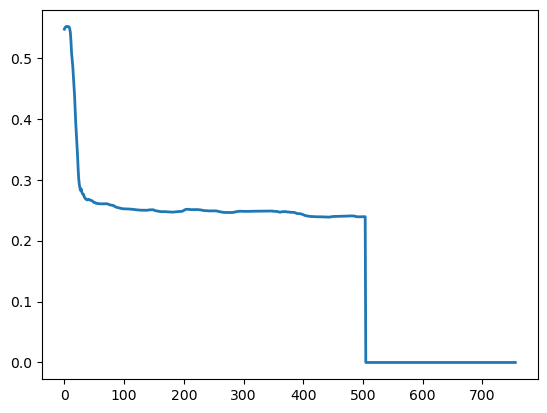

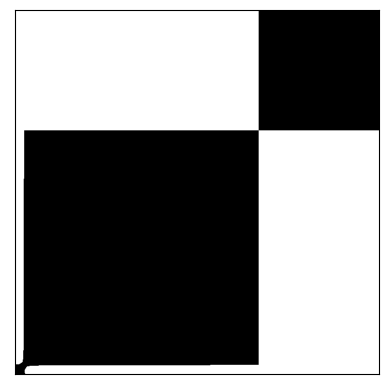

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.image import RecurrencePlot

y = np.linspace(0,max(lengths),max(lengths))

# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)

a = 25

x = vidcoordinates[a]

print(vidvalue[a])

X = np.array([x])

plt.plot(y, x, linewidth=2.0)

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Recurrence plot transformation
rp = RecurrencePlot(threshold=np.pi/18)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))


# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

In [10]:
#Denna cell är själva neurala nätverket, så lägg in en till cell under som tar samma input men med annan ML-algoritm

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import numpy as np

y = np.array(vidvalue)
X = np.array(vidcoordinates)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_train)
print(y_train)
#Gammalt

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train,
           batch_size=25,
           epochs=5,
           verbose=1,
           validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

[[0.54058433 0.53782576 0.53659844 ... 0.         0.         0.        ]
 [0.53952134 0.53479064 0.53283805 ... 0.         0.         0.        ]
 [0.56951898 0.563815   0.5616945  ... 0.         0.         0.        ]
 ...
 [0.52142203 0.52075595 0.51932657 ... 0.         0.         0.        ]
 [0.55068344 0.55088502 0.55133444 ... 0.         0.         0.        ]
 [0.51861829 0.5225268  0.52307838 ... 0.         0.         0.        ]]
[0 0 1 1 3 3 0 2 1 2 2 2 2 3 0 0 0 0 0 1 1 2 0 2 3 1 0 2 1 3 0 2 2 3 0 1 0
 2 2 1 1 2 0 2 1 0 2 2 0 0 3 3 0 0 3 3 2 0 0 2 3 2 2 2 0 1 2 2 3 0 3 3 1 3
 1 0 2 0 2 0 3 3 1 0 3 0 1 3 0 2 0 1 0 2 3 3 3 0 1 0 0 2 1 1 3 3 1 0 0 1 3
 2 0 1 3 2 3 3 1 1 1 0 3 3 1 0 1 0 1 3 3 2 0 3 3 0 0 2 2 2 1 1 2 1 1 2 3 0
 3 1 1 0 1 3 1]
Epoch 1/5
7/7 [==============================] - 1s 31ms/step - loss: 1.2653 - accuracy: 0.4774 - val_loss: 1.0103 - val_accuracy: 0.5385
Epoch 2/5
7/7 [==============================] - 0s 10ms/step - loss: 0.9593 - accuracy: 0.6065 - val_

[0.5877678990364075, 0.8653846383094788]